### Regression Baseline - Boston House Price

In [1]:
import utilities
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt
from sklearn.model_selection  import train_test_split
from scipy.linalg import lu
from scipy.linalg import solve


SEED = 3
import os
import random as rn

os.environ['PYTHONHASHSEED']=str(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)
rn.seed(SEED)

name_prefix = 'linear'

In [38]:
X, y = utilities.load_boston(return_X_y=True)

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [40]:
labels = utilities.load_boston()['feature_names']

In [5]:
base_model = tf.keras.Sequential([
    tf.keras.layers.Dense(input_dim=13, units=1)
])
base_model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 14        
Total params: 14
Trainable params: 14
Non-trainable params: 0
_________________________________________________________________


2022-01-24 11:18:53.428134: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [6]:
base_model.compile(loss='mse', optimizer='adam', metrics=['mae'])

history = base_model.fit(X_train, y_train, epochs=1000, batch_size=10, verbose=1, validation_data=(X_test, y_test))

# tf.keras.models.save_model(base_model, './linear/base_model_1000.h5')
print("Model saved!")

2022-01-24 11:18:53.607054: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/1000
41/41 [==============================] - 0s 4ms/step - loss: 13423.0215 - mae: 111.8327 - val_loss: 9772.0439 - val_mae: 94.4122
Epoch 2/1000
41/41 [==============================] - 0s 1ms/step - loss: 8090.6221 - mae: 84.6100 - val_loss: 5786.6436 - val_mae: 69.3039
Epoch 3/1000
41/41 [==============================] - 0s 1ms/step - loss: 5427.1753 - mae: 65.3657 - val_loss: 4008.6475 - val_mae: 54.7294
Epoch 4/1000
41/41 [==============================] - 0s 1ms/step - loss: 4219.7466 - mae: 54.5239 - val_loss: 3189.3633 - val_mae: 47.6670
Epoch 5/1000
41/41 [==============================] - 0s 1ms/step - loss: 3611.2832 - mae: 48.7388 - val_loss: 2733.8799 - val_mae: 43.6684
Epoch 6/1000
41/41 [==============================] - 0s 1ms/step - loss: 3220.7468 - mae: 45.1713 - val_loss: 2424.8665 - val_mae: 40.5800
Epoch 7/1000
41/41 [==============================] - 0s 1ms/step - loss: 2896.7822 - mae: 42.2472 - val_loss: 2166.1096 - val_mae: 38.0923
Epoch 8/1000
41/41

Epoch 60/1000
41/41 [==============================] - 0s 1ms/step - loss: 142.5560 - mae: 9.2632 - val_loss: 151.7662 - val_mae: 9.1234
Epoch 61/1000
41/41 [==============================] - 0s 1ms/step - loss: 138.4225 - mae: 9.0883 - val_loss: 148.0548 - val_mae: 9.1496
Epoch 62/1000
41/41 [==============================] - 0s 1ms/step - loss: 136.0594 - mae: 9.0130 - val_loss: 144.6682 - val_mae: 8.9292
Epoch 63/1000
41/41 [==============================] - 0s 1ms/step - loss: 133.5793 - mae: 8.8733 - val_loss: 142.0662 - val_mae: 8.8795
Epoch 64/1000
41/41 [==============================] - 0s 1ms/step - loss: 132.1311 - mae: 8.8363 - val_loss: 139.6616 - val_mae: 8.7020
Epoch 65/1000
41/41 [==============================] - 0s 1ms/step - loss: 129.1414 - mae: 8.6848 - val_loss: 136.7005 - val_mae: 8.6637
Epoch 66/1000
41/41 [==============================] - 0s 1ms/step - loss: 126.3793 - mae: 8.6048 - val_loss: 134.0770 - val_mae: 8.5358
Epoch 67/1000
41/41 [====================

41/41 [==============================] - 0s 1ms/step - loss: 62.9672 - mae: 5.8156 - val_loss: 66.4550 - val_mae: 6.1781
Epoch 121/1000
41/41 [==============================] - 0s 1ms/step - loss: 62.0650 - mae: 5.8107 - val_loss: 62.3249 - val_mae: 5.6267
Epoch 122/1000
41/41 [==============================] - 0s 1ms/step - loss: 62.0513 - mae: 5.8406 - val_loss: 61.7896 - val_mae: 5.5777
Epoch 123/1000
41/41 [==============================] - 0s 1ms/step - loss: 61.7066 - mae: 5.8125 - val_loss: 61.8771 - val_mae: 5.7999
Epoch 124/1000
41/41 [==============================] - 0s 1ms/step - loss: 61.8391 - mae: 5.8061 - val_loss: 61.3190 - val_mae: 5.5302
Epoch 125/1000
41/41 [==============================] - 0s 1ms/step - loss: 60.5854 - mae: 5.7824 - val_loss: 60.2792 - val_mae: 5.4881
Epoch 126/1000
41/41 [==============================] - 0s 1ms/step - loss: 59.8349 - mae: 5.6527 - val_loss: 59.9240 - val_mae: 5.7034
Epoch 127/1000
41/41 [==============================] - 0s 1ms/

41/41 [==============================] - 0s 1ms/step - loss: 43.1682 - mae: 4.8682 - val_loss: 40.9967 - val_mae: 4.9185
Epoch 181/1000
41/41 [==============================] - 0s 1ms/step - loss: 43.0519 - mae: 4.8584 - val_loss: 41.3715 - val_mae: 4.9641
Epoch 182/1000
41/41 [==============================] - 0s 975us/step - loss: 43.6118 - mae: 4.9497 - val_loss: 42.9961 - val_mae: 5.1508
Epoch 183/1000
41/41 [==============================] - 0s 949us/step - loss: 43.4155 - mae: 4.9357 - val_loss: 38.9430 - val_mae: 4.6123
Epoch 184/1000
41/41 [==============================] - 0s 945us/step - loss: 43.8921 - mae: 4.9801 - val_loss: 39.5445 - val_mae: 4.7919
Epoch 185/1000
41/41 [==============================] - 0s 2ms/step - loss: 42.1467 - mae: 4.8346 - val_loss: 38.5542 - val_mae: 4.6039
Epoch 186/1000
41/41 [==============================] - 0s 1ms/step - loss: 41.9301 - mae: 4.8014 - val_loss: 38.4284 - val_mae: 4.5663
Epoch 187/1000
41/41 [==============================] - 0

Epoch 240/1000
41/41 [==============================] - 0s 962us/step - loss: 36.9899 - mae: 4.4202 - val_loss: 31.8143 - val_mae: 4.1305
Epoch 241/1000
41/41 [==============================] - 0s 974us/step - loss: 37.3786 - mae: 4.5494 - val_loss: 31.9220 - val_mae: 4.1601
Epoch 242/1000
41/41 [==============================] - 0s 942us/step - loss: 36.5692 - mae: 4.4560 - val_loss: 31.7407 - val_mae: 4.1353
Epoch 243/1000
41/41 [==============================] - 0s 937us/step - loss: 36.1886 - mae: 4.4399 - val_loss: 31.8274 - val_mae: 4.1645
Epoch 244/1000
41/41 [==============================] - 0s 960us/step - loss: 36.9337 - mae: 4.4782 - val_loss: 31.7554 - val_mae: 4.1399
Epoch 245/1000
41/41 [==============================] - 0s 1ms/step - loss: 36.1852 - mae: 4.4007 - val_loss: 36.2969 - val_mae: 4.8158
Epoch 246/1000
41/41 [==============================] - 0s 953us/step - loss: 36.8757 - mae: 4.4539 - val_loss: 32.9045 - val_mae: 4.3730
Epoch 247/1000
41/41 [==============

Epoch 300/1000
41/41 [==============================] - 0s 1ms/step - loss: 33.2896 - mae: 4.2217 - val_loss: 30.0512 - val_mae: 4.1429
Epoch 301/1000
41/41 [==============================] - 0s 1ms/step - loss: 34.1410 - mae: 4.2678 - val_loss: 29.2730 - val_mae: 4.0136
Epoch 302/1000
41/41 [==============================] - 0s 1000us/step - loss: 33.8249 - mae: 4.2081 - val_loss: 28.8536 - val_mae: 3.9472
Epoch 303/1000
41/41 [==============================] - 0s 964us/step - loss: 33.8500 - mae: 4.2826 - val_loss: 28.5092 - val_mae: 3.8562
Epoch 304/1000
41/41 [==============================] - 0s 960us/step - loss: 34.2211 - mae: 4.2470 - val_loss: 28.3274 - val_mae: 3.8184
Epoch 305/1000
41/41 [==============================] - 0s 958us/step - loss: 33.1689 - mae: 4.1508 - val_loss: 32.5062 - val_mae: 4.5395
Epoch 306/1000
41/41 [==============================] - 0s 984us/step - loss: 33.7226 - mae: 4.2502 - val_loss: 28.1652 - val_mae: 3.7767
Epoch 307/1000
41/41 [===============

Epoch 360/1000
41/41 [==============================] - 0s 1ms/step - loss: 31.3555 - mae: 4.0635 - val_loss: 27.1807 - val_mae: 3.8380
Epoch 361/1000
41/41 [==============================] - 0s 989us/step - loss: 31.9505 - mae: 4.0248 - val_loss: 27.2856 - val_mae: 3.8706
Epoch 362/1000
41/41 [==============================] - 0s 1ms/step - loss: 32.0750 - mae: 4.0847 - val_loss: 28.2892 - val_mae: 4.0576
Epoch 363/1000
41/41 [==============================] - 0s 1ms/step - loss: 33.0498 - mae: 4.1929 - val_loss: 26.5622 - val_mae: 3.6765
Epoch 364/1000
41/41 [==============================] - 0s 1000us/step - loss: 31.3844 - mae: 4.0432 - val_loss: 26.7983 - val_mae: 3.7797
Epoch 365/1000
41/41 [==============================] - 0s 1ms/step - loss: 31.8559 - mae: 4.0530 - val_loss: 28.5567 - val_mae: 4.1114
Epoch 366/1000
41/41 [==============================] - 0s 1ms/step - loss: 30.7607 - mae: 3.9905 - val_loss: 26.6539 - val_mae: 3.5002
Epoch 367/1000
41/41 [=====================

Epoch 420/1000
41/41 [==============================] - 0s 973us/step - loss: 30.5470 - mae: 3.9998 - val_loss: 27.4129 - val_mae: 4.0355
Epoch 421/1000
41/41 [==============================] - 0s 1ms/step - loss: 29.8138 - mae: 3.9431 - val_loss: 25.5958 - val_mae: 3.6754
Epoch 422/1000
41/41 [==============================] - 0s 1ms/step - loss: 31.0118 - mae: 3.9659 - val_loss: 25.5462 - val_mae: 3.6613
Epoch 423/1000
41/41 [==============================] - 0s 1ms/step - loss: 30.4106 - mae: 4.0062 - val_loss: 27.4477 - val_mae: 4.0406
Epoch 424/1000
41/41 [==============================] - 0s 988us/step - loss: 32.0500 - mae: 4.0376 - val_loss: 25.6386 - val_mae: 3.3498
Epoch 425/1000
41/41 [==============================] - 0s 955us/step - loss: 29.8942 - mae: 3.9778 - val_loss: 25.3105 - val_mae: 3.6044
Epoch 426/1000
41/41 [==============================] - 0s 973us/step - loss: 29.7389 - mae: 3.9324 - val_loss: 25.1243 - val_mae: 3.4799
Epoch 427/1000
41/41 [==================

Epoch 480/1000
41/41 [==============================] - 0s 960us/step - loss: 29.0129 - mae: 3.8834 - val_loss: 25.1417 - val_mae: 3.7546
Epoch 481/1000
41/41 [==============================] - 0s 963us/step - loss: 28.8313 - mae: 3.8226 - val_loss: 24.2697 - val_mae: 3.5229
Epoch 482/1000
41/41 [==============================] - 0s 1ms/step - loss: 29.9176 - mae: 4.0213 - val_loss: 25.2646 - val_mae: 3.7690
Epoch 483/1000
41/41 [==============================] - 0s 1ms/step - loss: 29.2273 - mae: 3.8210 - val_loss: 26.5562 - val_mae: 4.0041
Epoch 484/1000
41/41 [==============================] - 0s 974us/step - loss: 30.1711 - mae: 3.9583 - val_loss: 24.9251 - val_mae: 3.7107
Epoch 485/1000
41/41 [==============================] - 0s 960us/step - loss: 28.9260 - mae: 3.8520 - val_loss: 24.6542 - val_mae: 3.6283
Epoch 486/1000
41/41 [==============================] - 0s 956us/step - loss: 29.4667 - mae: 3.8443 - val_loss: 25.8226 - val_mae: 3.8826
Epoch 487/1000
41/41 [================

41/41 [==============================] - 0s 964us/step - loss: 28.2377 - mae: 3.7008 - val_loss: 25.9985 - val_mae: 3.9701
Epoch 540/1000
41/41 [==============================] - 0s 961us/step - loss: 28.3581 - mae: 3.8083 - val_loss: 23.5010 - val_mae: 3.4284
Epoch 541/1000
41/41 [==============================] - 0s 959us/step - loss: 28.0249 - mae: 3.7997 - val_loss: 26.8196 - val_mae: 4.0911
Epoch 542/1000
41/41 [==============================] - 0s 963us/step - loss: 29.2765 - mae: 3.8918 - val_loss: 27.3781 - val_mae: 4.1754
Epoch 543/1000
41/41 [==============================] - 0s 969us/step - loss: 28.9400 - mae: 3.8449 - val_loss: 23.9827 - val_mae: 3.5732
Epoch 544/1000
41/41 [==============================] - 0s 951us/step - loss: 29.3248 - mae: 3.8667 - val_loss: 26.0489 - val_mae: 3.9897
Epoch 545/1000
41/41 [==============================] - 0s 974us/step - loss: 29.5945 - mae: 3.9539 - val_loss: 23.5037 - val_mae: 3.4732
Epoch 546/1000
41/41 [===========================

Epoch 599/1000
41/41 [==============================] - 0s 944us/step - loss: 27.8459 - mae: 3.7504 - val_loss: 24.9901 - val_mae: 3.8667
Epoch 600/1000
41/41 [==============================] - 0s 954us/step - loss: 27.8902 - mae: 3.7778 - val_loss: 22.9449 - val_mae: 3.4328
Epoch 601/1000
41/41 [==============================] - 0s 970us/step - loss: 28.9591 - mae: 3.8399 - val_loss: 23.0932 - val_mae: 3.1691
Epoch 602/1000
41/41 [==============================] - 0s 948us/step - loss: 28.9821 - mae: 3.8752 - val_loss: 22.5862 - val_mae: 3.2431
Epoch 603/1000
41/41 [==============================] - 0s 987us/step - loss: 28.4144 - mae: 3.7513 - val_loss: 24.3471 - val_mae: 3.7655
Epoch 604/1000
41/41 [==============================] - 0s 976us/step - loss: 28.0512 - mae: 3.8460 - val_loss: 22.6443 - val_mae: 3.2590
Epoch 605/1000
41/41 [==============================] - 0s 956us/step - loss: 28.0065 - mae: 3.7200 - val_loss: 22.7185 - val_mae: 3.3435
Epoch 606/1000
41/41 [============

Epoch 659/1000
41/41 [==============================] - 0s 1ms/step - loss: 27.3618 - mae: 3.6977 - val_loss: 25.5647 - val_mae: 3.9940
Epoch 660/1000
41/41 [==============================] - 0s 970us/step - loss: 27.5289 - mae: 3.7108 - val_loss: 22.8910 - val_mae: 3.4935
Epoch 661/1000
41/41 [==============================] - 0s 985us/step - loss: 27.2679 - mae: 3.6711 - val_loss: 22.6547 - val_mae: 3.4498
Epoch 662/1000
41/41 [==============================] - 0s 1ms/step - loss: 28.2183 - mae: 3.7442 - val_loss: 22.3223 - val_mae: 3.3183
Epoch 663/1000
41/41 [==============================] - 0s 1ms/step - loss: 27.3417 - mae: 3.6831 - val_loss: 22.4370 - val_mae: 3.3869
Epoch 664/1000
41/41 [==============================] - 0s 1ms/step - loss: 27.0153 - mae: 3.7059 - val_loss: 22.1894 - val_mae: 3.1885
Epoch 665/1000
41/41 [==============================] - 0s 1ms/step - loss: 28.8066 - mae: 3.7535 - val_loss: 23.2129 - val_mae: 3.5895
Epoch 666/1000
41/41 [======================

41/41 [==============================] - 0s 1ms/step - loss: 27.6209 - mae: 3.7130 - val_loss: 22.3185 - val_mae: 3.0800
Epoch 720/1000
41/41 [==============================] - 0s 1ms/step - loss: 27.3057 - mae: 3.6346 - val_loss: 23.7676 - val_mae: 3.7226
Epoch 721/1000
41/41 [==============================] - 0s 1ms/step - loss: 26.5961 - mae: 3.6280 - val_loss: 26.6792 - val_mae: 4.1755
Epoch 722/1000
41/41 [==============================] - 0s 1ms/step - loss: 28.7476 - mae: 3.7445 - val_loss: 23.3222 - val_mae: 3.6446
Epoch 723/1000
41/41 [==============================] - 0s 1ms/step - loss: 27.1515 - mae: 3.7164 - val_loss: 24.3005 - val_mae: 3.8180
Epoch 724/1000
41/41 [==============================] - 0s 1ms/step - loss: 27.3067 - mae: 3.6776 - val_loss: 22.8003 - val_mae: 3.5326
Epoch 725/1000
41/41 [==============================] - 0s 1ms/step - loss: 27.4109 - mae: 3.6803 - val_loss: 21.9520 - val_mae: 3.2322
Epoch 726/1000
41/41 [==============================] - 0s 953u

Epoch 779/1000
41/41 [==============================] - 0s 982us/step - loss: 27.0898 - mae: 3.6734 - val_loss: 21.4618 - val_mae: 3.0729
Epoch 780/1000
41/41 [==============================] - 0s 951us/step - loss: 26.9662 - mae: 3.6279 - val_loss: 21.7939 - val_mae: 3.0542
Epoch 781/1000
41/41 [==============================] - 0s 956us/step - loss: 26.7535 - mae: 3.6366 - val_loss: 21.3843 - val_mae: 3.0882
Epoch 782/1000
41/41 [==============================] - 0s 958us/step - loss: 27.2607 - mae: 3.6162 - val_loss: 21.7757 - val_mae: 3.3165
Epoch 783/1000
41/41 [==============================] - 0s 956us/step - loss: 26.9678 - mae: 3.5912 - val_loss: 21.5343 - val_mae: 3.2453
Epoch 784/1000
41/41 [==============================] - 0s 976us/step - loss: 27.0536 - mae: 3.5897 - val_loss: 22.1817 - val_mae: 3.4587
Epoch 785/1000
41/41 [==============================] - 0s 1ms/step - loss: 26.6821 - mae: 3.6639 - val_loss: 21.8078 - val_mae: 3.2997
Epoch 786/1000
41/41 [==============

Epoch 839/1000
41/41 [==============================] - 0s 1ms/step - loss: 26.7043 - mae: 3.5424 - val_loss: 22.0278 - val_mae: 3.4327
Epoch 840/1000
41/41 [==============================] - 0s 977us/step - loss: 26.5398 - mae: 3.5942 - val_loss: 22.4126 - val_mae: 3.5288
Epoch 841/1000
41/41 [==============================] - 0s 953us/step - loss: 26.3255 - mae: 3.6071 - val_loss: 23.5244 - val_mae: 3.7341
Epoch 842/1000
41/41 [==============================] - 0s 949us/step - loss: 26.4963 - mae: 3.6508 - val_loss: 24.2571 - val_mae: 3.1320
Epoch 843/1000
41/41 [==============================] - 0s 979us/step - loss: 27.2806 - mae: 3.6417 - val_loss: 21.7768 - val_mae: 3.0268
Epoch 844/1000
41/41 [==============================] - 0s 1ms/step - loss: 26.7317 - mae: 3.6217 - val_loss: 21.2336 - val_mae: 3.1952
Epoch 845/1000
41/41 [==============================] - 0s 1ms/step - loss: 27.1429 - mae: 3.7067 - val_loss: 21.4607 - val_mae: 3.2903
Epoch 846/1000
41/41 [==================

Epoch 899/1000
41/41 [==============================] - 0s 1ms/step - loss: 26.8489 - mae: 3.6425 - val_loss: 21.1203 - val_mae: 3.0678
Epoch 900/1000
41/41 [==============================] - 0s 1ms/step - loss: 26.9225 - mae: 3.5439 - val_loss: 23.6798 - val_mae: 3.7876
Epoch 901/1000
41/41 [==============================] - 0s 1ms/step - loss: 27.1352 - mae: 3.6616 - val_loss: 21.9789 - val_mae: 3.4554
Epoch 902/1000
41/41 [==============================] - 0s 1ms/step - loss: 27.4205 - mae: 3.6107 - val_loss: 21.7922 - val_mae: 3.4341
Epoch 903/1000
41/41 [==============================] - 0s 1ms/step - loss: 26.1191 - mae: 3.5545 - val_loss: 20.9568 - val_mae: 3.1280
Epoch 904/1000
41/41 [==============================] - 0s 1ms/step - loss: 26.5056 - mae: 3.5508 - val_loss: 21.5870 - val_mae: 3.3842
Epoch 905/1000
41/41 [==============================] - 0s 1ms/step - loss: 26.7468 - mae: 3.5746 - val_loss: 22.5638 - val_mae: 3.5891
Epoch 906/1000
41/41 [==========================

41/41 [==============================] - 0s 934us/step - loss: 26.3057 - mae: 3.5431 - val_loss: 21.4438 - val_mae: 3.3447
Epoch 960/1000
41/41 [==============================] - 0s 974us/step - loss: 26.7999 - mae: 3.6092 - val_loss: 20.8018 - val_mae: 3.0371
Epoch 961/1000
41/41 [==============================] - 0s 1ms/step - loss: 26.5520 - mae: 3.5868 - val_loss: 21.0352 - val_mae: 3.2453
Epoch 962/1000
41/41 [==============================] - 0s 1ms/step - loss: 26.6550 - mae: 3.5886 - val_loss: 20.7970 - val_mae: 3.0573
Epoch 963/1000
41/41 [==============================] - 0s 1ms/step - loss: 26.1869 - mae: 3.5070 - val_loss: 21.5333 - val_mae: 3.3827
Epoch 964/1000
41/41 [==============================] - 0s 1ms/step - loss: 26.6254 - mae: 3.5380 - val_loss: 26.4039 - val_mae: 4.1984
Epoch 965/1000
41/41 [==============================] - 0s 1ms/step - loss: 26.2192 - mae: 3.6075 - val_loss: 23.1636 - val_mae: 3.6932
Epoch 966/1000
41/41 [==============================] - 0s 

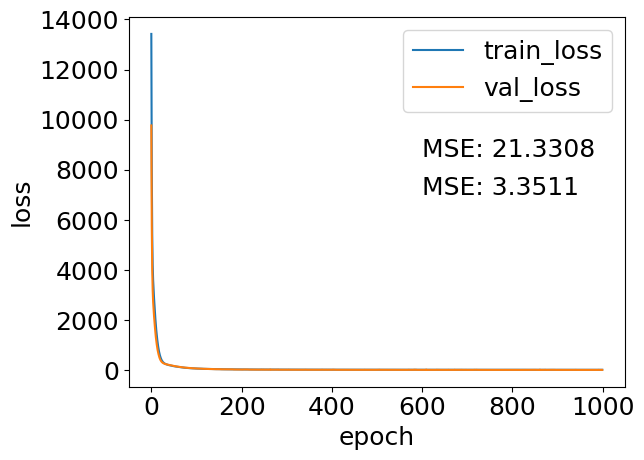

In [7]:
plt.style.use('default')
plt.plot(history.history['loss'])
# plt.plot(history.history['mae'])
plt.plot(history.history['val_loss'])
# plt.plot(history.history['val_mae'])
# plt.title('model loss')
plt.text(600, 8500, 'MSE: 21.3308', fontsize=18)
plt.text(600, 7000, 'MSE: 3.3511', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.ylabel('loss', fontsize=18)
plt.xlabel('epoch', fontsize=18)
plt.legend(['train_loss', 'val_loss'], loc='upper right', fontsize=18)
plt.savefig(f'./New_figures/linear_base_model_loss_learning_curve.png', dpi = 300, bbox_inches='tight')
plt.show()


In [41]:
base_model = tf.keras.models.load_model('./linear/base_model_1000.h5')

base_model.trainable = False

In [24]:
stop_call_back = utilities.EarlyStoppingByLossVal(monitor='val_loss', value=21.3308, verbose=0)

def training_iteration():
    
    feature_model = utilities.Feature_Importance_Layer.make_feature_model(base_model, shape=(13))
    earlycp= utilities.tf.keras.callbacks.EarlyStopping(
            monitor='loss', min_delta=0, patience=30, verbose=0,
            mode='auto', baseline=None, restore_best_weights=False
        )
    
    opt = utilities.tf.keras.optimizers.Adam()
    
    feature_model.compile(loss='mse', optimizer=opt, metrics=['mae'], run_eagerly=True)

    history = feature_model.fit(X_train, y_train, epochs=1000, batch_size=10, verbose=1, validation_data=(X_test, y_test), shuffle=True, callbacks=[stop_call_back])
    
    return history

In [25]:
history = training_iteration()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 13)]              0         
_________________________________________________________________
feature_extractor (Sequentia (None, 13)                13        
_________________________________________________________________
sequential (Sequential)      (None, 1)                 14        
Total params: 27
Trainable params: 13
Non-trainable params: 14
_________________________________________________________________
Epoch 1/1000
41/41 [==============================] - 0s 8ms/step - loss: 298.1096 - mae: 14.6141 - val_loss: 232.3359 - val_mae: 12.3376
Epoch 2/1000
41/41 [==============================] - 0s 9ms/step - loss: 180.4030 - mae: 10.4543 - val_loss: 148.2724 - val_mae: 9.0596
Epoch 3/1000
41/41 [==============================] - 0s 7ms/step - loss: 126.9633 - mae: 8.4315 - val_loss: 113.0882

41/41 [==============================] - 0s 8ms/step - loss: 33.3734 - mae: 4.1710 - val_loss: 31.2081 - val_mae: 3.9808
Epoch 57/1000
41/41 [==============================] - 0s 8ms/step - loss: 33.2015 - mae: 4.1338 - val_loss: 30.9807 - val_mae: 4.0036
Epoch 58/1000
41/41 [==============================] - 0s 7ms/step - loss: 32.9237 - mae: 4.0786 - val_loss: 30.6044 - val_mae: 3.9364
Epoch 59/1000
41/41 [==============================] - 0s 8ms/step - loss: 32.7345 - mae: 4.0914 - val_loss: 30.5809 - val_mae: 3.9977
Epoch 60/1000
41/41 [==============================] - 0s 8ms/step - loss: 32.6173 - mae: 4.0772 - val_loss: 30.1146 - val_mae: 3.8925
Epoch 61/1000
41/41 [==============================] - 0s 8ms/step - loss: 32.4167 - mae: 4.0810 - val_loss: 30.0907 - val_mae: 3.9781
Epoch 62/1000
41/41 [==============================] - 0s 8ms/step - loss: 32.2960 - mae: 4.0524 - val_loss: 29.6438 - val_mae: 3.8635
Epoch 63/1000
41/41 [==============================] - 0s 7ms/step - 

41/41 [==============================] - 0s 8ms/step - loss: 27.8302 - mae: 3.7428 - val_loss: 23.4150 - val_mae: 3.5181
Epoch 117/1000
41/41 [==============================] - 0s 7ms/step - loss: 27.7403 - mae: 3.7447 - val_loss: 23.4652 - val_mae: 3.5532
Epoch 118/1000
41/41 [==============================] - 0s 8ms/step - loss: 27.7527 - mae: 3.7118 - val_loss: 23.5438 - val_mae: 3.5872
Epoch 119/1000
41/41 [==============================] - 0s 9ms/step - loss: 27.7376 - mae: 3.7953 - val_loss: 23.3660 - val_mae: 3.5559
Epoch 120/1000
41/41 [==============================] - 0s 9ms/step - loss: 27.6991 - mae: 3.7051 - val_loss: 23.3768 - val_mae: 3.5607
Epoch 121/1000
41/41 [==============================] - 0s 8ms/step - loss: 27.7244 - mae: 3.7635 - val_loss: 23.1496 - val_mae: 3.5060
Epoch 122/1000
41/41 [==============================] - 0s 8ms/step - loss: 27.6152 - mae: 3.7658 - val_loss: 23.1258 - val_mae: 3.5146
Epoch 123/1000
41/41 [==============================] - 0s 8ms/

41/41 [==============================] - 0s 7ms/step - loss: 26.6364 - mae: 3.6701 - val_loss: 21.4037 - val_mae: 3.3541
Epoch 177/1000
41/41 [==============================] - 0s 7ms/step - loss: 26.5827 - mae: 3.6092 - val_loss: 21.6505 - val_mae: 3.4399
Epoch 178/1000
41/41 [==============================] - 0s 7ms/step - loss: 26.6180 - mae: 3.6713 - val_loss: 21.6650 - val_mae: 3.4388
Epoch 179/1000
41/41 [==============================] - 0s 7ms/step - loss: 26.5504 - mae: 3.6280 - val_loss: 21.5466 - val_mae: 3.4115
Epoch 180/1000
41/41 [==============================] - 0s 7ms/step - loss: 26.5969 - mae: 3.6578 - val_loss: 21.5266 - val_mae: 3.3978
Epoch 181/1000
41/41 [==============================] - 0s 7ms/step - loss: 26.5377 - mae: 3.6349 - val_loss: 21.2938 - val_mae: 3.3267


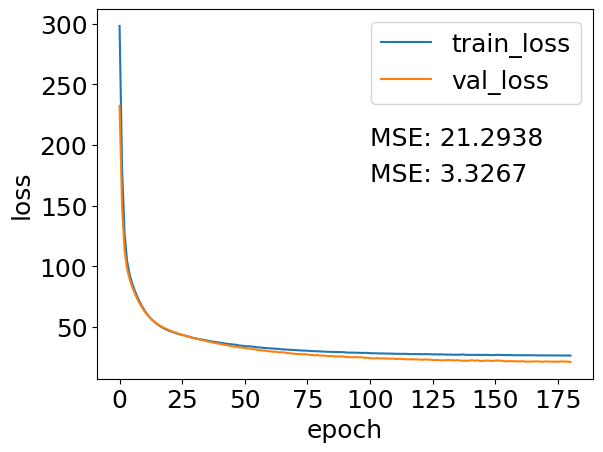

In [51]:
plt.plot(history.history['loss'])
# plt.plot(history.history['mae'])
plt.plot(history.history['val_loss'])
# plt.plot(history.history['val_mae'])
plt.text(100, 200, 'MSE: 21.2938', fontsize=18)
plt.text(100, 170, 'MSE: 3.3267', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.ylabel('loss', fontsize=18)
plt.xlabel('epoch', fontsize=18)
plt.legend(['train_loss', 'val_loss'], loc='upper right', fontsize=18)
plt.savefig(f'./New_figures/feature_model_loss_learning_curve.png', dpi = 300, bbox_inches='tight')
plt.show()

### Optimal number of iterations

In [12]:
ite = [5, 10, 20, 30, 50, 100]

while len(stop_call_back.weights) < 300:
    history = training_iteration()

arr = np.array(stop_call_back.weights)
arr = np.reshape(arr, (len(arr), np.shape(arr)[-1]))

np.save('boston_linear_weights_output', arr)

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 13)]              0         
_________________________________________________________________
feature_extractor (Sequentia (None, 13)                13        
_________________________________________________________________
sequential (Sequential)      (None, 1)                 14        
Total params: 27
Trainable params: 27
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
41/41 [==============================] - 0s 9ms/step - loss: 350.9419 - mae: 15.8154 - val_loss: 197.0560 - val_mae: 11.1743
Epoch 2/500
41/41 [==============================] - 0s 8ms/step - loss: 175.0087 - mae: 10.3727 - val_loss: 117.9666 - val_mae: 7.9890
Epoch 3/500
41/41 [==============================] - 0s 8ms/step - loss: 131.2751 - mae: 8.9228 - val_loss: 101.2862 - v

41/41 [==============================] - 0s 8ms/step - loss: 23.6991 - mae: 3.5085 - val_loss: 36.3289 - val_mae: 3.9883
Epoch 118/500
41/41 [==============================] - 0s 8ms/step - loss: 23.5530 - mae: 3.4455 - val_loss: 35.5354 - val_mae: 4.0550
Epoch 119/500
41/41 [==============================] - 0s 8ms/step - loss: 23.3102 - mae: 3.4965 - val_loss: 37.2822 - val_mae: 3.9230
Epoch 120/500
41/41 [==============================] - 0s 8ms/step - loss: 23.4863 - mae: 3.4317 - val_loss: 35.6185 - val_mae: 4.0774
Epoch 121/500
41/41 [==============================] - 0s 8ms/step - loss: 23.4167 - mae: 3.4661 - val_loss: 36.8705 - val_mae: 3.9640
Epoch 122/500
41/41 [==============================] - 0s 8ms/step - loss: 23.3371 - mae: 3.4666 - val_loss: 36.4978 - val_mae: 3.9468
Epoch 123/500
41/41 [==============================] - 0s 8ms/step - loss: 23.1966 - mae: 3.4446 - val_loss: 35.7578 - val_mae: 3.9911
Epoch 124/500
41/41 [==============================] - 0s 8ms/step - 

41/41 [==============================] - 0s 8ms/step - loss: 25.2896 - mae: 3.6397 - val_loss: 37.1350 - val_mae: 4.2329
Epoch 75/500
41/41 [==============================] - 0s 8ms/step - loss: 25.2617 - mae: 3.6343 - val_loss: 37.1164 - val_mae: 4.2314
Epoch 76/500
41/41 [==============================] - 0s 8ms/step - loss: 25.0473 - mae: 3.5987 - val_loss: 37.3655 - val_mae: 4.1471
Epoch 77/500
41/41 [==============================] - 0s 8ms/step - loss: 24.9119 - mae: 3.6214 - val_loss: 37.4283 - val_mae: 4.1823
Epoch 78/500
41/41 [==============================] - 0s 8ms/step - loss: 25.0060 - mae: 3.5775 - val_loss: 37.3317 - val_mae: 4.2186
Epoch 79/500
41/41 [==============================] - 0s 8ms/step - loss: 25.0661 - mae: 3.6282 - val_loss: 37.5144 - val_mae: 4.1471
Epoch 80/500
41/41 [==============================] - 0s 8ms/step - loss: 24.6937 - mae: 3.5996 - val_loss: 37.3500 - val_mae: 4.1184
Epoch 81/500
41/41 [==============================] - 0s 8ms/step - loss: 2

Epoch 135/500
41/41 [==============================] - 0s 8ms/step - loss: 22.6338 - mae: 3.3634 - val_loss: 35.1377 - val_mae: 3.9145
Epoch 136/500
41/41 [==============================] - 0s 8ms/step - loss: 22.5736 - mae: 3.3716 - val_loss: 36.2847 - val_mae: 3.8268
Epoch 137/500
41/41 [==============================] - 0s 8ms/step - loss: 22.5546 - mae: 3.3744 - val_loss: 36.8847 - val_mae: 3.8420
Epoch 138/500
41/41 [==============================] - 0s 8ms/step - loss: 22.7207 - mae: 3.3682 - val_loss: 36.0296 - val_mae: 3.8302
Epoch 139/500
41/41 [==============================] - 0s 8ms/step - loss: 22.4550 - mae: 3.3810 - val_loss: 36.4456 - val_mae: 3.8244
Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 13)]              0         
_________________________________________________________________
feature_extractor (Sequentia (None, 13)     

41/41 [==============================] - 0s 8ms/step - loss: 23.0920 - mae: 3.4482 - val_loss: 36.3026 - val_mae: 3.9124
Epoch 113/500
41/41 [==============================] - 0s 9ms/step - loss: 22.9423 - mae: 3.4203 - val_loss: 35.1866 - val_mae: 3.9761
Epoch 114/500
41/41 [==============================] - 0s 8ms/step - loss: 22.8290 - mae: 3.3653 - val_loss: 35.5036 - val_mae: 4.2438
Epoch 115/500
41/41 [==============================] - 0s 8ms/step - loss: 24.1715 - mae: 3.5652 - val_loss: 34.8859 - val_mae: 4.0547
Epoch 116/500
41/41 [==============================] - 0s 8ms/step - loss: 23.0237 - mae: 3.4136 - val_loss: 34.9890 - val_mae: 4.0143
Epoch 117/500
41/41 [==============================] - 0s 8ms/step - loss: 22.8484 - mae: 3.4360 - val_loss: 36.7427 - val_mae: 3.8485
Epoch 118/500
41/41 [==============================] - 0s 8ms/step - loss: 23.3486 - mae: 3.4040 - val_loss: 35.3247 - val_mae: 4.0128
Epoch 119/500
41/41 [==============================] - 0s 8ms/step - 

41/41 [==============================] - 0s 7ms/step - loss: 22.3550 - mae: 3.4014 - val_loss: 36.9923 - val_mae: 3.8637
Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 13)]              0         
_________________________________________________________________
feature_extractor (Sequentia (None, 13)                13        
_________________________________________________________________
sequential (Sequential)      (None, 1)                 14        
Total params: 27
Trainable params: 27
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
41/41 [==============================] - 0s 8ms/step - loss: 138.8693 - mae: 8.7577 - val_loss: 93.1281 - val_mae: 6.5729
Epoch 2/500
41/41 [==============================] - 0s 9ms/step - loss: 91.7840 - mae: 7.0383 - val_loss: 79.5186 - val_mae: 5.9449
Epoch

Epoch 56/500
41/41 [==============================] - 0s 10ms/step - loss: 24.6551 - mae: 3.5496 - val_loss: 36.4014 - val_mae: 4.1863
Epoch 57/500
41/41 [==============================] - 0s 9ms/step - loss: 24.6542 - mae: 3.5815 - val_loss: 36.6636 - val_mae: 4.1856
Epoch 58/500
41/41 [==============================] - 0s 10ms/step - loss: 24.3809 - mae: 3.5335 - val_loss: 36.2874 - val_mae: 4.1916
Epoch 59/500
41/41 [==============================] - 0s 9ms/step - loss: 24.2900 - mae: 3.5508 - val_loss: 36.6390 - val_mae: 4.1209
Epoch 60/500
41/41 [==============================] - 0s 9ms/step - loss: 24.4274 - mae: 3.5366 - val_loss: 39.5387 - val_mae: 4.0578
Epoch 61/500
41/41 [==============================] - 0s 10ms/step - loss: 25.1262 - mae: 3.5612 - val_loss: 36.2935 - val_mae: 4.1125
Epoch 62/500
41/41 [==============================] - 0s 8ms/step - loss: 24.2880 - mae: 3.5794 - val_loss: 36.3862 - val_mae: 4.1429
Epoch 63/500
41/41 [==============================] - 0s 8m

41/41 [==============================] - 0s 8ms/step - loss: 24.1483 - mae: 3.5413 - val_loss: 36.3902 - val_mae: 3.9942
Epoch 75/500
41/41 [==============================] - 0s 8ms/step - loss: 23.5587 - mae: 3.4767 - val_loss: 35.5936 - val_mae: 4.2044
Epoch 76/500
41/41 [==============================] - 0s 7ms/step - loss: 23.5575 - mae: 3.4543 - val_loss: 36.2010 - val_mae: 4.3823
Epoch 77/500
41/41 [==============================] - 0s 7ms/step - loss: 24.5291 - mae: 3.6080 - val_loss: 35.8501 - val_mae: 4.1064
Epoch 78/500
41/41 [==============================] - 0s 7ms/step - loss: 24.1420 - mae: 3.5326 - val_loss: 35.6938 - val_mae: 4.0514
Epoch 79/500
41/41 [==============================] - 0s 7ms/step - loss: 23.3640 - mae: 3.4758 - val_loss: 35.8862 - val_mae: 4.0308
Epoch 80/500
41/41 [==============================] - 0s 7ms/step - loss: 23.2310 - mae: 3.4884 - val_loss: 37.3946 - val_mae: 3.9316
Epoch 81/500
41/41 [==============================] - 0s 7ms/step - loss: 2

Epoch 29/500
41/41 [==============================] - 0s 8ms/step - loss: 31.3377 - mae: 4.0582 - val_loss: 42.7088 - val_mae: 4.6051
Epoch 30/500
41/41 [==============================] - 0s 8ms/step - loss: 30.8970 - mae: 4.0333 - val_loss: 42.8144 - val_mae: 4.4792
Epoch 31/500
41/41 [==============================] - 0s 8ms/step - loss: 30.5987 - mae: 3.9587 - val_loss: 42.0405 - val_mae: 4.6379
Epoch 32/500
41/41 [==============================] - 0s 8ms/step - loss: 30.5689 - mae: 3.9597 - val_loss: 41.6651 - val_mae: 4.6059
Epoch 33/500
41/41 [==============================] - 0s 9ms/step - loss: 30.4828 - mae: 4.0773 - val_loss: 41.3787 - val_mae: 4.5465
Epoch 34/500
41/41 [==============================] - 0s 9ms/step - loss: 29.9616 - mae: 3.9736 - val_loss: 41.0115 - val_mae: 4.5891
Epoch 35/500
41/41 [==============================] - 0s 9ms/step - loss: 29.5066 - mae: 3.9886 - val_loss: 41.8640 - val_mae: 4.4873
Epoch 36/500
41/41 [==============================] - 0s 9ms/s

41/41 [==============================] - 0s 8ms/step - loss: 31.0794 - mae: 4.0476 - val_loss: 43.6094 - val_mae: 4.4955
Epoch 30/500
41/41 [==============================] - 0s 8ms/step - loss: 30.5666 - mae: 4.0267 - val_loss: 42.2696 - val_mae: 4.5265
Epoch 31/500
41/41 [==============================] - 0s 9ms/step - loss: 30.2338 - mae: 3.9829 - val_loss: 41.6024 - val_mae: 4.4989
Epoch 32/500
41/41 [==============================] - 0s 8ms/step - loss: 29.8400 - mae: 3.9542 - val_loss: 41.1720 - val_mae: 4.5346
Epoch 33/500
41/41 [==============================] - 0s 8ms/step - loss: 29.6375 - mae: 3.9301 - val_loss: 40.5695 - val_mae: 4.5351
Epoch 34/500
41/41 [==============================] - 0s 8ms/step - loss: 29.1859 - mae: 3.9540 - val_loss: 41.8111 - val_mae: 4.3550
Epoch 35/500
41/41 [==============================] - 0s 8ms/step - loss: 28.8673 - mae: 3.9347 - val_loss: 40.8561 - val_mae: 4.3704
Epoch 36/500
41/41 [==============================] - 0s 8ms/step - loss: 2

Epoch 46/500
41/41 [==============================] - 0s 8ms/step - loss: 25.1021 - mae: 3.5792 - val_loss: 37.1800 - val_mae: 4.2498
Epoch 47/500
41/41 [==============================] - 0s 8ms/step - loss: 24.8159 - mae: 3.6211 - val_loss: 36.8774 - val_mae: 4.2023
Epoch 48/500
41/41 [==============================] - 0s 8ms/step - loss: 24.6675 - mae: 3.5632 - val_loss: 36.8457 - val_mae: 4.2609
Epoch 49/500
41/41 [==============================] - 0s 8ms/step - loss: 24.5360 - mae: 3.5473 - val_loss: 37.2185 - val_mae: 4.1565
Epoch 50/500
41/41 [==============================] - 0s 8ms/step - loss: 24.3365 - mae: 3.5881 - val_loss: 39.7414 - val_mae: 4.0841
Epoch 51/500
41/41 [==============================] - 0s 8ms/step - loss: 24.6159 - mae: 3.5446 - val_loss: 36.9306 - val_mae: 4.1334
Epoch 52/500
41/41 [==============================] - 0s 8ms/step - loss: 24.2185 - mae: 3.5290 - val_loss: 36.5760 - val_mae: 4.1057
Epoch 53/500
41/41 [==============================] - 0s 8ms/s

In [23]:
weights = np.load('boston_linear_weights_output.npy')

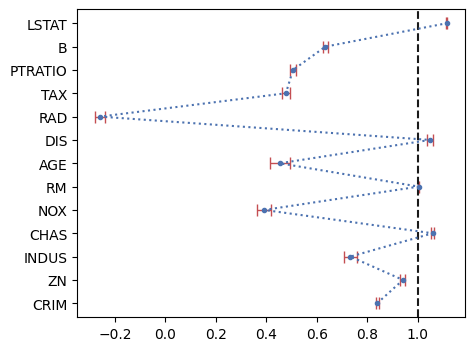

In [22]:
x = labels
y = weights_mean
fig, ax = plt.subplots(figsize=(5,4), nrows=1, sharex=True)
ax.errorbar(y, x, xerr=weights_std, fmt='.:', elinewidth=1, capsize=4, color='b', ecolor='r')
# ax.set_title('Weight plot')
ax.tick_params(axis='both', labelsize=10)
ax.axvline(1, color="k", linestyle="--")
# ax.set_xlabel('weight')
fig.savefig('./New_figures/{}_weight_plot.png'.format(name_prefix), dpi = 300, bbox_inches='tight')

In [14]:
a = []
for i in range(20):
    weights_mean = np.abs(np.subtract(weights[:i], 1)).mean(axis=0)
    a.append(utilities.rank_importance(labels, weights_mean))

/var/folders/92/lnpv663963531g350q66gj300000gn/T/ipykernel_89874/3950328475.py:3: RuntimeWarning: Mean of empty slice.
  weights_mean = np.abs(np.subtract(weights[:i], 1)).mean(axis=0)
/usr/local/lib/python3.9/site-packages/numpy/core/_methods.py:181: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


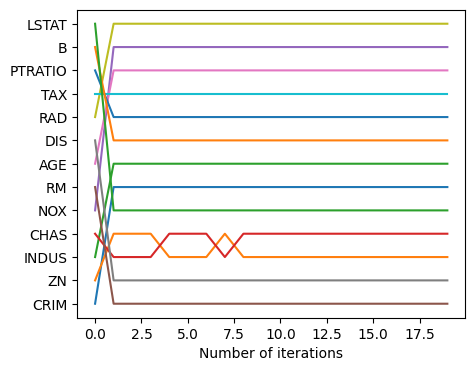

In [15]:
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(5,4))


a = np.array(a)
# print(a)
b = [i for i in range(20)]
for i in range(13):
    plt.plot(b, a[:,i])
plt.yticks([i for i in range(1,14)], labels, fontsize=10)
plt.xlabel("Number of iterations", fontsize=10)

plt.savefig('./New_figures/{}_training_interation_converge.png'.format(name_prefix), dpi = 300, bbox_inches='tight')

## Model interpretability 

### Variance tolerance

In [24]:
weights_std = np.std(weights, axis=0)
weights_std

array([0.00636311, 0.00995057, 0.02693405, 0.00636096, 0.02800499,
       0.00243783, 0.03926142, 0.01300038, 0.02030747, 0.01645885,
       0.01330954, 0.00827391, 0.00298681], dtype=float32)

In [25]:
weights_mean = weights.mean(axis=0)
weights_mean

array([ 0.83997065,  0.9423165 ,  0.73363477,  1.0600785 ,  0.39194232,
        1.0047228 ,  0.4536584 ,  1.0494947 , -0.25843376,  0.4778218 ,
        0.5061464 ,  0.6348857 ,  1.1153675 ], dtype=float32)

In [10]:
weights_tanh=(np.exp(weights_scaled)-np.exp(-weights_scaled))/(np.exp(weights_scaled)+np.exp(-weights_scaled))
weights_tanh

array([0.15867719, 0.05761911, 0.26023924, 0.06000635, 0.5427585 ,
       0.00480864, 0.49777317, 0.04945457, 0.8506317 , 0.47937933,
       0.45726967, 0.34971094, 0.11485823], dtype=float32)

In [ ]:
# exp(-(x-1)^2)
weights_gua=(np.exp(-np.power(weights_scaled, 2)))
weights_gua

In [26]:
weights_scaled = np.abs(np.subtract(weights, 1)).mean(axis=0)
weights_scaled

array([0.16002941, 0.05768305, 0.26636505, 0.06007854, 0.6080578 ,
       0.00480871, 0.5463415 , 0.04949496, 1.2584336 , 0.5221781 ,
       0.49385366, 0.36511442, 0.11536735], dtype=float32)

In [20]:
index = np.where(weights_scaled<1)
labels[index]

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX',
       'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [32]:
from copy import copy
import numpy as np
from numpy import arange

from scipy.spatial.distance import cdist,pdist
from scipy.stats import levene, pearsonr

from pandas import Series, DataFrame

from matplotlib import cm
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
from mpl_toolkits.mplot3d import Axes3D




def plot_feature_importance(ft_set, feature_importance, show_cols = 30):
    
    fig = plt.figure(figsize=(5,4))
    w_lr_sort, ft_sorted, _ = return_feature_importance(ft_set, feature_importance, show_cols = show_cols)
    x_val = list(range(len(w_lr_sort)))
    
    for i in range(len(ft_set)):
        plt.text(-0.3+i, 2, ft_sorted[i], rotation=90, fontsize=12)


    plt.bar(x_val, w_lr_sort)
    plt.ylabel('Ranking', fontsize=12)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.xticks(x_val)
    
    return fig

def plot_feature_importance_reverse(ft_set, feature_importance, show_cols = 30):
    
    fig = plt.figure(figsize=(5,4))
    w_lr_sort, ft_sorted, _ = return_feature_importance(ft_set, feature_importance, show_cols = show_cols)
    x_val = list(range(len(w_lr_sort)))
    
    for i in range(len(ft_set)):
        plt.text(-0.3+i, 2, ft_sorted[i], rotation=90, fontsize=12)

    plt.bar(x_val, w_lr_sort, color='r')
    plt.ylabel('Ranking', fontsize=12)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.xticks(x_val)
    
    return fig

def return_feature_importance(ft_set, feature_importance, show_cols = 30):

    w_lr = copy(np.abs(feature_importance))
    w_lr = 100 * (w_lr / w_lr.max())
    sorted_index_pos = [index for index, num in sorted(enumerate(w_lr), key=lambda x: x[-1], 
                   reverse=True)]

    ft_sorted = []
    w_lr_sort = []
    for i, idx in enumerate(sorted_index_pos):
        if i > show_cols:
            break
        ft_sorted.append(ft_set[idx])
        w_lr_sort.append(w_lr[idx])

    return w_lr_sort, ft_sorted, sorted_index_pos




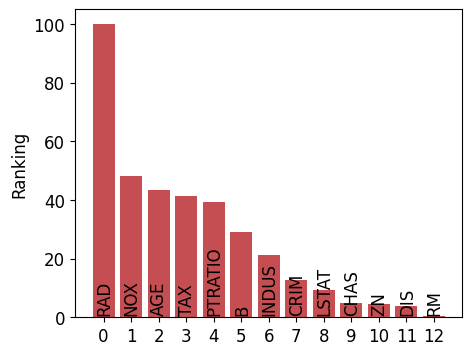

In [31]:
plt.style.use('default')
fig_FI_Weight_sacled = plot_feature_importance_reverse(labels, np.abs((weights_scaled)))
# fig_FI_Weight_sacled = utilities.plot_feature_importance_reverse(labels, np.abs((weights_scaled)))

In [33]:
fig_FI_Weight_sacled.savefig('./New_figures/{}_hist_TV_only.png'.format(name_prefix), dpi = 300, bbox_inches='tight')

In [16]:
r = np.abs(1-weights_scaled)

In [13]:
print(labels)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


array([132.00641 ,  94.699715,  27.238186, 166.65385 ,  13.995443,
       412.13773 ,  11.554813,  80.72798 , -12.726047,  29.031292,
        38.02884 ,  76.73348 , 373.431   ], dtype=float32)

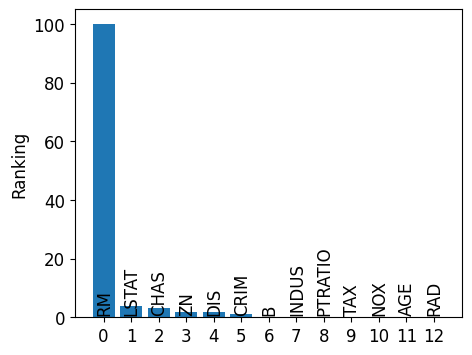

In [34]:
# fig_FI_VT = utilities.plot_feature_importance(labels, np.abs((weights_mean)/(weights_std*weights_scaled)))
fig_FI_VT = plot_feature_importance(labels, np.abs((weights_mean)/(weights_std*weights_scaled)), 15)

In [35]:
# fig_FI_VT.savefig('./linear/{}_hist_VT.png'.format(name_prefix), dpi = 300, bbox_inches='tight')
fig_FI_VT.savefig('./New_figures/{}_hist_VT.png'.format(name_prefix), dpi = 300, bbox_inches='tight')


<Figure size 360x360 with 0 Axes>

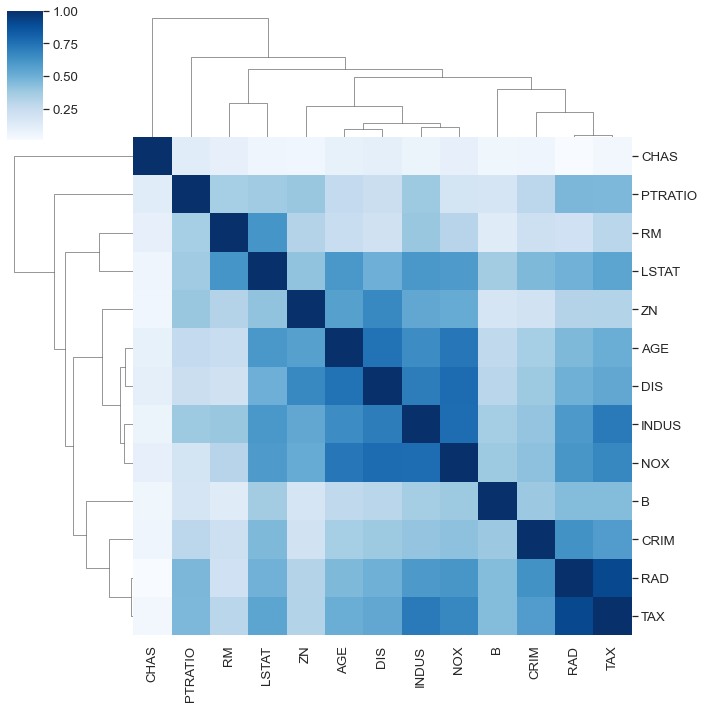

In [44]:
import seaborn as sns; sns.set()
sns.set(color_codes=True)
sns.set(font_scale=1.2)

correlated = np.corrcoef(X, rowvar=False)
plt.figure(figsize=(5,5))
cmap = sns.diverging_palette(h_neg=210, h_pos=350, s=90, l=50, as_cmap=True)
cg = sns.clustermap(data = np.abs(correlated), cmap='Blues', metric='correlation', yticklabels=labels, xticklabels=labels)
#cg = sns.clustermap(data = correlated, cmap='Blues', metric='correlation', annot =False, fmt='1g')
plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)

plt.savefig('./linear/{}_correlation_matrix.png'.format(name_prefix), dpi=300, bbox_inches='tight')
plt.show()

### Contribution calculation

#### Three Assumaptions: 1. independence 2. additivity 3. Linear relationship

In [42]:
# Benchmark
# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = base_model.evaluate(X, y, batch_size=10)
print("test loss, test acc:", results)

Evaluate on test data
51/51 [==============================] - 0s 613us/step - loss: 25.0520 - mae: 3.5349
test loss, test acc: [25.052040100097656, 3.534916877746582]


In [43]:
# Baseline
array_aux = np.zeros(np.shape(X))
results = base_model.evaluate(array_aux, y, batch_size=10)

51/51 [==============================] - 0s 686us/step - loss: 461.7009 - mae: 19.4237


In [1]:
# Joint contribution
# Other feature makes negative impacts on the prediction
array_aux = np.copy(X)
array_aux[:, 0] = 0
array_aux[:, 3] = 0
results = base_model.evaluate(array_aux, y, batch_size=10)

NameError: name 'np' is not defined

In [34]:
# Individula contribution
single_contribution_set = []
for i in range(len(X[-1])):
    aux_array = []
    array_aux = np.zeros(np.shape(X))
    array_aux[:, i] = X[:, i]
    results = base_model.evaluate(array_aux, y, batch_size=10)
    
    aux_array.append(results[0])
    aux_array.append(results[1])
    single_contribution_set.append(aux_array)

51/51 [==============================] - 0s 471us/step - loss: 697.7440 - mae: 25.4529


In [33]:
import csv

with open("linear/contribution_results.csv","w+") as my_csv:
    csvWriter = csv.writer(my_csv,delimiter=',')
    csvWriter.writerows(contribution_set)


In [44]:
# All contribution
# Set each feature to be 0 and calculate the drop of change as its contribution
# it is different from permutation method, providing permutation method results
contribution_set = []
for i in range(len(X[-1])):
    aux_array = []
    array_aux = np.ones(np.shape(X))
    array_aux[:,i] = 0
    X_new = array_aux * X
    results_new = base_model.evaluate(X_new, y, batch_size=10)
    aux_array.append(results_new[0])
    aux_array.append(results_new[1])
    contribution_set.append(aux_array)

51/51 [==============================] - 0s 548us/step - loss: 78.2047 - mae: 7.7008


In [45]:
# Individual contribution of each single feature
# Compare this with permutation method
# Can be used to calculate feature interaction
contribution_set = np.round(contribution_set, 4)
for i in range(len(contribution_set)):
    contribution_set[i] = abs(contribution_set[i][0]-24.7673)
contribution_set

array([[1.622100e+00, 1.622100e+00],
       [2.506100e+00, 2.506100e+00],
       [3.085600e+00, 3.085600e+00],
       [9.130000e-01, 9.130000e-01],
       [8.595000e-01, 8.595000e-01],
       [7.669015e+02, 7.669015e+02],
       [7.207000e-01, 7.207000e-01],
       [2.063540e+01, 2.063540e+01],
       [3.419200e+00, 3.419200e+00],
       [1.530070e+01, 1.530070e+01],
       [7.506700e+00, 7.506700e+00],
       [2.876440e+01, 2.876440e+01],
       [5.343740e+01, 5.343740e+01]])

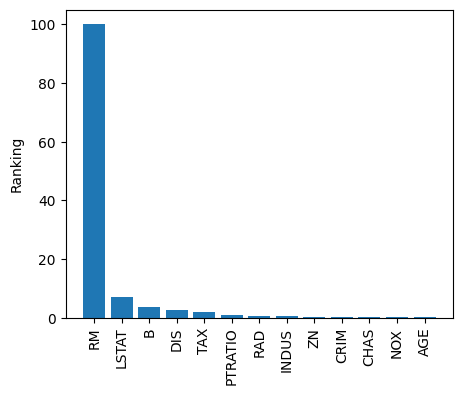

In [38]:
# fig_FI_contri_set = utilities.plot_feature_importance(labels, contribution_set[:,0])
fig_FI_contri_set = plot_feature_importance(labels, contribution_set[:,0])

In [46]:
# We find the contribution and coefficient relationship through previous method (benchmark)
weights_output = np.zeros(np.shape(weights))
X_data = []
y_data = []
contribution_set = np.round(contribution_set, 4)
for j in range(len(weights)):
    for i in range(len(X[-1])):
        array_aux = np.ones(np.shape(X))
        array_aux[:,i] = 1-weights[j][i]
#         banchmark
        con_feature = contribution_set[i][0]
        X_new = array_aux * X
        results_new = base_model.evaluate(X_new, y, batch_size=10)
        results_round = np.round(results_new[0],4)
#         the loss change to banchmark
        con = abs(24.7673-results_new[0])
#         weights_output[j][i] = con/con_feature
        
        weight = weights[j][i]
        print(con, weight)

        weights_output[j][i] = con/con_feature

#     break

51/51 [==============================] - 0s 635us/step - loss: 26.0130 - mae: 3.6498
1.2456737854003919 0.8332044
51/51 [==============================] - 0s 499us/step - loss: 26.9080 - mae: 3.6119
2.1407181121826184 0.924255
51/51 [==============================] - 0s 535us/step - loss: 26.5072 - mae: 3.8140
1.7399364807128919 0.67818546
51/51 [==============================] - 0s 528us/step - loss: 25.7967 - mae: 3.4896
1.0294128753662122 1.0631979
51/51 [==============================] - 0s 480us/step - loss: 24.9634 - mae: 3.4329
0.19606555480957155 0.42252508
51/51 [==============================] - 0s 556us/step - loss: 798.7301 - mae: 27.6175
773.9628025390625 1.0045556
51/51 [==============================] - 0s 545us/step - loss: 25.2057 - mae: 3.5850
0.43839229125976686 0.45855555
51/51 [==============================] - 0s 615us/step - loss: 46.3426 - mae: 5.7545
21.575339923095704 1.0245351
51/51 [==============================] - 0s 472us/step - loss: 25.7107 - mae: 3.671

51/51 [==============================] - 0s 562us/step - loss: 46.7493 - mae: 5.7842
21.98195994873047 1.0349818
51/51 [==============================] - 0s 646us/step - loss: 25.6092 - mae: 3.6547
0.8419224121093762 -0.2299431
51/51 [==============================] - 0s 518us/step - loss: 29.4087 - mae: 4.1957
4.6413685180664075 0.49781078
51/51 [==============================] - 0s 609us/step - loss: 27.2749 - mae: 3.9616
2.5076195098876966 0.49663374
51/51 [==============================] - 0s 510us/step - loss: 35.3186 - mae: 4.1625
10.551272998046876 0.625632
51/51 [==============================] - 0s 474us/step - loss: 90.1839 - mae: 8.3195
65.41662944335937 1.1125339
51/51 [==============================] - 0s 506us/step - loss: 26.0226 - mae: 3.6507
1.255345950317384 0.8378603
51/51 [==============================] - 0s 488us/step - loss: 26.9318 - mae: 3.6135
2.1645294525146497 0.92940354
51/51 [==============================] - 0s 554us/step - loss: 26.7383 - mae: 3.8478
1.9

51/51 [==============================] - 0s 491us/step - loss: 26.9960 - mae: 3.6177
2.228723178100587 0.94312423
51/51 [==============================] - 0s 511us/step - loss: 26.7481 - mae: 3.8493
1.9807831146240247 0.7439828
51/51 [==============================] - 0s 491us/step - loss: 25.7933 - mae: 3.4894
1.0259796478271497 1.0614018
51/51 [==============================] - 0s 516us/step - loss: 24.9534 - mae: 3.4388
0.18614924926757936 0.3917643
51/51 [==============================] - 0s 540us/step - loss: 795.7789 - mae: 27.5648
771.0116306640625 1.0026541
51/51 [==============================] - 0s 476us/step - loss: 25.2226 - mae: 3.5896
0.45534480590820436 0.49817166
51/51 [==============================] - 0s 521us/step - loss: 47.3544 - mae: 5.8281
22.58708919067383 1.05035
51/51 [==============================] - 0s 508us/step - loss: 25.6777 - mae: 3.6664
0.9103866912841809 -0.24923275
51/51 [==============================] - 0s 495us/step - loss: 29.1747 - mae: 4.1677


22.51794398803711 1.0486044
51/51 [==============================] - 0s 477us/step - loss: 25.6522 - mae: 3.6621
0.8849407531738294 -0.24217331
51/51 [==============================] - 0s 483us/step - loss: 29.1771 - mae: 4.1680
4.4098297454834 0.48213035
51/51 [==============================] - 0s 510us/step - loss: 27.3534 - mae: 3.9734
2.5861202575683606 0.50747025
51/51 [==============================] - 0s 511us/step - loss: 35.6485 - mae: 4.1915
10.881209979248048 0.6345805
51/51 [==============================] - 0s 501us/step - loss: 89.8261 - mae: 8.3018
65.05881083984374 1.1093304
51/51 [==============================] - 0s 483us/step - loss: 26.0120 - mae: 3.6497
1.2447086669921887 0.83273673
51/51 [==============================] - 0s 510us/step - loss: 26.9329 - mae: 3.6135
2.16555369873047 0.92962384
51/51 [==============================] - 0s 523us/step - loss: 26.5605 - mae: 3.8218
1.793248782348634 0.6931727
51/51 [==============================] - 0s 485us/step - loss

51/51 [==============================] - 0s 504us/step - loss: 27.0147 - mae: 3.6190
2.2474266387939466 0.9470805
51/51 [==============================] - 0s 536us/step - loss: 26.7552 - mae: 3.8503
1.9878727294921887 0.7458499
51/51 [==============================] - 0s 506us/step - loss: 25.8189 - mae: 3.4906
1.05160106201172 1.0747049
51/51 [==============================] - 0s 482us/step - loss: 24.9542 - mae: 3.4382
0.18685115356445436 0.39424968
51/51 [==============================] - 0s 492us/step - loss: 798.9462 - mae: 27.6214
774.1789280273438 1.0046946
51/51 [==============================] - 0s 487us/step - loss: 25.2104 - mae: 3.5863
0.44307483215332155 0.4696291
51/51 [==============================] - 0s 506us/step - loss: 47.3306 - mae: 5.8263
22.56325114746094 1.0497484
51/51 [==============================] - 0s 477us/step - loss: 25.8017 - mae: 3.6869
1.0344158508300794 -0.28200594
51/51 [==============================] - 0s 482us/step - loss: 29.0028 - mae: 4.1472


51/51 [==============================] - 0s 504us/step - loss: 25.8242 - mae: 3.6905
1.0569034912109387 -0.28768665
51/51 [==============================] - 0s 475us/step - loss: 28.8687 - mae: 4.1313
4.101443896484376 0.4605666
51/51 [==============================] - 0s 509us/step - loss: 27.3367 - mae: 3.9709
2.56942332763672 0.50518
51/51 [==============================] - 0s 498us/step - loss: 35.6981 - mae: 4.1959
10.930820117187501 0.6359142
51/51 [==============================] - 0s 525us/step - loss: 90.3905 - mae: 8.3297
65.62323344726562 1.1143799
51/51 [==============================] - 0s 551us/step - loss: 26.0367 - mae: 3.6520
1.2694393493652356 0.84460014
51/51 [==============================] - 0s 491us/step - loss: 26.9591 - mae: 3.6153
2.1917511322021497 0.9352493
51/51 [==============================] - 0s 486us/step - loss: 26.6766 - mae: 3.8387
1.9092556335449231 0.72493833
51/51 [==============================] - 0s 535us/step - loss: 25.7848 - mae: 3.4890
1.017

51/51 [==============================] - 0s 504us/step - loss: 26.6482 - mae: 3.8346
1.8808666564941419 0.7172677
51/51 [==============================] - 0s 539us/step - loss: 25.7912 - mae: 3.4893
1.0239464141845716 1.0603383
51/51 [==============================] - 0s 518us/step - loss: 24.9657 - mae: 3.4318
0.1984077789306653 0.4288137
51/51 [==============================] - 0s 496us/step - loss: 797.0859 - mae: 27.5882
772.3185764648438 1.0034965
51/51 [==============================] - 0s 473us/step - loss: 25.1938 - mae: 3.5817
0.42654002685547 0.42999542
51/51 [==============================] - 0s 505us/step - loss: 47.6546 - mae: 5.8496
22.88730205078125 1.0578973
51/51 [==============================] - 0s 471us/step - loss: 25.5700 - mae: 3.6478
0.8026539184570325 -0.21842778
51/51 [==============================] - 0s 511us/step - loss: 29.6729 - mae: 4.2267
4.905648837280275 0.5152224
51/51 [==============================] - 0s 525us/step - loss: 27.1762 - mae: 3.9466
2.4

51/51 [==============================] - 0s 477us/step - loss: 28.6133 - mae: 4.1011
3.8460270263671887 0.44205976
51/51 [==============================] - 0s 509us/step - loss: 27.4789 - mae: 3.9920
2.71163524169922 0.52444077
51/51 [==============================] - 0s 533us/step - loss: 35.8664 - mae: 4.2108
11.099094042968751 0.6404149
51/51 [==============================] - 0s 506us/step - loss: 90.9292 - mae: 8.3561
66.16186870117187 1.1191788
51/51 [==============================] - 0s 480us/step - loss: 26.0494 - mae: 3.6531
1.28213084716797 0.850631
51/51 [==============================] - 0s 488us/step - loss: 26.9658 - mae: 3.6157
2.19845164794922 0.9366821
51/51 [==============================] - 0s 475us/step - loss: 26.6402 - mae: 3.8334
1.8729034759521497 0.7151038
51/51 [==============================] - 0s 532us/step - loss: 25.7920 - mae: 3.4894
1.024724612426759 1.0607454
51/51 [==============================] - 0s 523us/step - loss: 24.9499 - mae: 3.4415
0.18261302

51/51 [==============================] - 0s 527us/step - loss: 25.7860 - mae: 3.4891
1.0186764099121106 1.0575709
51/51 [==============================] - 0s 478us/step - loss: 24.9462 - mae: 3.4450
0.17887843627929811 0.36142483
51/51 [==============================] - 0s 520us/step - loss: 799.6021 - mae: 27.6331
774.83475078125 1.0051166
51/51 [==============================] - 0s 496us/step - loss: 25.2164 - mae: 3.5879
0.44908488769531374 0.48370278
51/51 [==============================] - 0s 567us/step - loss: 46.2758 - mae: 5.7496
21.50848353881836 1.0228078
51/51 [==============================] - 0s 694us/step - loss: 25.7548 - mae: 3.6792
0.9874607421875012 -0.26989904
51/51 [==============================] - 0s 491us/step - loss: 28.8546 - mae: 4.1296
4.087283740234376 0.45955643
51/51 [==============================] - 0s 485us/step - loss: 27.4408 - mae: 3.9864
2.6734653808593762 0.5193247
51/51 [==============================] - 0s 527us/step - loss: 35.2910 - mae: 4.1601

51/51 [==============================] - 0s 512us/step - loss: 29.4668 - mae: 4.2026
4.6995350219726575 0.50168633
51/51 [==============================] - 0s 495us/step - loss: 27.1523 - mae: 3.9429
2.3849884368896497 0.47934026
51/51 [==============================] - 0s 483us/step - loss: 35.8247 - mae: 4.2071
11.057368884277345 0.63930243
51/51 [==============================] - 0s 526us/step - loss: 89.9780 - mae: 8.3093
65.21072734375 1.1106917
51/51 [==============================] - 0s 504us/step - loss: 26.0095 - mae: 3.6495
1.2422291137695325 0.83154255
51/51 [==============================] - 0s 491us/step - loss: 26.9536 - mae: 3.6149
2.186277041625978 0.93407726
51/51 [==============================] - 0s 480us/step - loss: 26.5296 - mae: 3.8173
1.762303958129884 0.68450373
51/51 [==============================] - 0s 487us/step - loss: 25.7750 - mae: 3.4886
1.0077034332275403 1.0517815
51/51 [==============================] - 0s 515us/step - loss: 24.9469 - mae: 3.4443
0.1

51/51 [==============================] - 0s 474us/step - loss: 26.8588 - mae: 3.8654
2.0915123321533216 0.77272314
51/51 [==============================] - 0s 505us/step - loss: 25.7969 - mae: 3.4896
1.0295807220458997 1.0632851
51/51 [==============================] - 0s 531us/step - loss: 24.9453 - mae: 3.4459
0.17802394409179811 0.35696858
51/51 [==============================] - 0s 471us/step - loss: 805.3832 - mae: 27.7361
780.6158787109375 1.0088285
51/51 [==============================] - 0s 487us/step - loss: 25.2093 - mae: 3.5860
0.4419704772949231 0.46703368
51/51 [==============================] - 0s 502us/step - loss: 47.1893 - mae: 5.8161
22.422004351806642 1.0461782
51/51 [==============================] - 0s 489us/step - loss: 25.7622 - mae: 3.6804
0.9949261047363294 -0.27184695
51/51 [==============================] - 0s 586us/step - loss: 28.8825 - mae: 4.1329
4.115165362548829 0.46154383
51/51 [==============================] - 0s 502us/step - loss: 27.4158 - mae: 3.9

0.9959617950439466 -0.2721145
51/51 [==============================] - 0s 520us/step - loss: 29.1730 - mae: 4.1675
4.4056602813720716 0.48184392
51/51 [==============================] - 0s 491us/step - loss: 27.1825 - mae: 3.9476
2.415238986206056 0.48364908
51/51 [==============================] - 0s 547us/step - loss: 35.1480 - mae: 4.1475
10.38070262451172 0.62094975
51/51 [==============================] - 0s 498us/step - loss: 89.7857 - mae: 8.2998
65.01841319580078 1.1089681
51/51 [==============================] - 0s 489us/step - loss: 26.0387 - mae: 3.6521
1.2713638641357434 0.8455151
51/51 [==============================] - 0s 522us/step - loss: 27.0522 - mae: 3.6215
2.284919390869142 0.9549547
51/51 [==============================] - 0s 502us/step - loss: 26.7400 - mae: 3.8481
1.97274364013672 0.74186164
51/51 [==============================] - 0s 532us/step - loss: 25.7975 - mae: 3.4896
1.0302025177001966 1.0636095
51/51 [==============================] - 0s 529us/step - los

51/51 [==============================] - 0s 490us/step - loss: 26.7532 - mae: 3.8500
1.9858509399414075 0.74531883
51/51 [==============================] - 0s 506us/step - loss: 25.7956 - mae: 3.4895
1.0282837249755872 1.0626069
51/51 [==============================] - 0s 505us/step - loss: 24.9619 - mae: 3.4337
0.1945625640869153 0.41833746
51/51 [==============================] - 0s 494us/step - loss: 802.5223 - mae: 27.6852
777.7549778320313 1.0069933
51/51 [==============================] - 0s 542us/step - loss: 25.2315 - mae: 3.5919
0.4642196990966809 0.5183859
51/51 [==============================] - 0s 483us/step - loss: 47.6104 - mae: 5.8465
22.84311259765625 1.0567896
51/51 [==============================] - 0s 487us/step - loss: 25.7240 - mae: 3.6741
0.9566685058593762 -0.26176578
51/51 [==============================] - 0s 482us/step - loss: 29.1663 - mae: 4.1667
4.399039874267579 0.4813894
51/51 [==============================] - 0s 502us/step - loss: 27.3159 - mae: 3.9678


51/51 [==============================] - 0s 578us/step - loss: 29.1594 - mae: 4.1658
4.392104754638673 0.48091236
51/51 [==============================] - 0s 502us/step - loss: 27.3909 - mae: 3.9790
2.6235672332763684 0.5125785
51/51 [==============================] - 0s 505us/step - loss: 35.5499 - mae: 4.1828
10.782577166748048 0.63192034
51/51 [==============================] - 0s 493us/step - loss: 90.8376 - mae: 8.3516
66.07027781982421 1.1183641
51/51 [==============================] - 0s 483us/step - loss: 26.0166 - mae: 3.6501
1.249303469848634 0.83495444
51/51 [==============================] - 0s 508us/step - loss: 26.9611 - mae: 3.6154
2.193791995239259 0.9356858
51/51 [==============================] - 0s 519us/step - loss: 26.6609 - mae: 3.8364
1.893550524902345 0.7207021
51/51 [==============================] - 0s 513us/step - loss: 25.7860 - mae: 3.4891
1.0186535217285169 1.0575595
51/51 [==============================] - 0s 508us/step - loss: 24.9553 - mae: 3.4375
0.188

51/51 [==============================] - 0s 470us/step - loss: 25.8089 - mae: 3.4902
1.0416237213134778 1.0695487
51/51 [==============================] - 0s 511us/step - loss: 24.9463 - mae: 3.4449
0.17903293151855593 0.3621929
51/51 [==============================] - 0s 498us/step - loss: 802.3813 - mae: 27.6827
777.6139866210938 1.0069028
51/51 [==============================] - 0s 516us/step - loss: 25.2149 - mae: 3.5875
0.4475857116699231 0.4802223
51/51 [==============================] - 0s 471us/step - loss: 47.2948 - mae: 5.8238
22.52746547241211 1.0488448
51/51 [==============================] - 0s 508us/step - loss: 25.7951 - mae: 3.6858
1.0277954437255872 -0.28032005
51/51 [==============================] - 0s 491us/step - loss: 28.7255 - mae: 4.1143
3.9582420684814466 0.45026678
51/51 [==============================] - 0s 490us/step - loss: 27.5419 - mae: 4.0012
2.77462352294922 0.5328013
51/51 [==============================] - 0s 496us/step - loss: 35.5251 - mae: 4.1807
1

51/51 [==============================] - 0s 512us/step - loss: 27.3032 - mae: 3.9659
2.535882601928712 0.5005555
51/51 [==============================] - 0s 521us/step - loss: 36.0146 - mae: 4.2239
11.24730647583008 0.6443504
51/51 [==============================] - 0s 507us/step - loss: 91.1957 - mae: 8.3692
66.42843974609374 1.1215463
51/51 [==============================] - 0s 490us/step - loss: 26.0393 - mae: 3.6522
1.2719723083496106 0.84580845
51/51 [==============================] - 0s 480us/step - loss: 26.9606 - mae: 3.6154
2.1933418609619153 0.93559027
51/51 [==============================] - 0s 493us/step - loss: 26.8978 - mae: 3.8710
2.130460391235353 0.78263015
51/51 [==============================] - 0s 485us/step - loss: 25.7893 - mae: 3.4893
1.0219799377441419 1.0593076
51/51 [==============================] - 0s 480us/step - loss: 24.9535 - mae: 3.4387
0.18620646972656374 0.39198065
51/51 [==============================] - 0s 496us/step - loss: 799.6827 - mae: 27.6346


51/51 [==============================] - 0s 543us/step - loss: 24.9578 - mae: 3.4359
0.19054187316894655 0.40638766
51/51 [==============================] - 0s 507us/step - loss: 799.0341 - mae: 27.6230
774.2668186523438 1.0047511
51/51 [==============================] - 0s 481us/step - loss: 25.1696 - mae: 3.5748
0.4022613861083997 0.36909243
51/51 [==============================] - 0s 550us/step - loss: 46.7608 - mae: 5.7851
21.99348796386719 1.0352765
51/51 [==============================] - 0s 553us/step - loss: 25.8043 - mae: 3.6873
1.037044177246095 -0.28267375
51/51 [==============================] - 0s 607us/step - loss: 28.7653 - mae: 4.1190
3.9980064727783216 0.45314616
51/51 [==============================] - 0s 580us/step - loss: 27.4951 - mae: 3.9944
2.7278477050781262 0.5266021
51/51 [==============================] - 0s 508us/step - loss: 35.8474 - mae: 4.2091
11.080146441650392 0.63991
51/51 [==============================] - 0s 495us/step - loss: 90.3329 - mae: 8.3268


51/51 [==============================] - 0s 507us/step - loss: 35.5025 - mae: 4.1787
10.73522151489258 0.6306383
51/51 [==============================] - 0s 489us/step - loss: 90.7971 - mae: 8.3496
66.02984965820312 1.1180043
51/51 [==============================] - 0s 502us/step - loss: 26.0267 - mae: 3.6511
1.2593914367675794 0.83979875
51/51 [==============================] - 0s 559us/step - loss: 26.9857 - mae: 3.6171
2.218442568969728 0.94094205
51/51 [==============================] - 0s 488us/step - loss: 26.5675 - mae: 3.8228
1.800157199096681 0.695097
51/51 [==============================] - 0s 502us/step - loss: 25.7902 - mae: 3.4893
1.022924075317384 1.0598017
51/51 [==============================] - 0s 458us/step - loss: 24.9477 - mae: 3.4435
0.18037761230468874 0.36859515
51/51 [==============================] - 0s 493us/step - loss: 799.3109 - mae: 27.6279
774.5435520507813 1.0049292
51/51 [==============================] - 0s 487us/step - loss: 25.2098 - mae: 3.5862
0.44

51/51 [==============================] - 0s 478us/step - loss: 791.1528 - mae: 27.4819
766.3854709960938 0.9996664
51/51 [==============================] - 0s 494us/step - loss: 25.2313 - mae: 3.5919
0.46399272460937624 0.5178799
51/51 [==============================] - 0s 527us/step - loss: 46.7750 - mae: 5.7861
22.00769008178711 1.0356398
51/51 [==============================] - 0s 522us/step - loss: 25.6074 - mae: 3.6544
0.8401161529541028 -0.22942196
51/51 [==============================] - 0s 505us/step - loss: 29.1117 - mae: 4.1602
4.344409594726564 0.47762313
51/51 [==============================] - 0s 499us/step - loss: 27.3129 - mae: 3.9674
2.545629153442384 0.5019023
51/51 [==============================] - 0s 477us/step - loss: 36.0465 - mae: 4.2267
11.279178271484376 0.6451936
51/51 [==============================] - 0s 524us/step - loss: 90.8838 - mae: 8.3539
66.11647380371093 1.118775
51/51 [==============================] - 0s 527us/step - loss: 26.0316 - mae: 3.6515
1.2

51/51 [==============================] - 0s 494us/step - loss: 90.0561 - mae: 8.3132
65.28883708496093 1.111391
51/51 [==============================] - 0s 513us/step - loss: 26.0186 - mae: 3.6503
1.2512756683349622 0.8359015
51/51 [==============================] - 0s 734us/step - loss: 26.9805 - mae: 3.6167
2.21316112060547 0.9398188
51/51 [==============================] - 0s 549us/step - loss: 26.7453 - mae: 3.8489
1.97799266357422 0.7432483
51/51 [==============================] - 0s 531us/step - loss: 25.7971 - mae: 3.4896
1.0298286773681653 1.0634134
51/51 [==============================] - 0s 526us/step - loss: 24.9482 - mae: 3.4431
0.18085444946289186 0.37076342
51/51 [==============================] - 0s 495us/step - loss: 802.0414 - mae: 27.6766
777.2740818359375 1.0066847
51/51 [==============================] - 0s 520us/step - loss: 25.1973 - mae: 3.5827
0.42995799560547 0.43831542
51/51 [==============================] - 0s 482us/step - loss: 47.4865 - mae: 5.8376
22.7191

51/51 [==============================] - 0s 500us/step - loss: 25.2292 - mae: 3.5913
0.4618698455810559 0.5130712
51/51 [==============================] - 0s 556us/step - loss: 47.3809 - mae: 5.8300
22.61360515136719 1.0510185
51/51 [==============================] - 0s 607us/step - loss: 25.7301 - mae: 3.6751
0.9627720214843762 -0.2633901
51/51 [==============================] - 0s 495us/step - loss: 29.1790 - mae: 4.1682
4.411700854492189 0.48225877
51/51 [==============================] - 0s 508us/step - loss: 27.2774 - mae: 3.9620
2.5100914337158216 0.49697816
51/51 [==============================] - 0s 491us/step - loss: 35.2454 - mae: 4.1561
10.47805369873047 0.6236269
51/51 [==============================] - 0s 483us/step - loss: 90.2118 - mae: 8.3208
65.44451488037109 1.1127836
51/51 [==============================] - 0s 529us/step - loss: 26.0073 - mae: 3.6493
1.2400299407958997 0.8304793
51/51 [==============================] - 0s 510us/step - loss: 27.0367 - mae: 3.6204
2.26

65.45241130371093 1.1128541
51/51 [==============================] - 0s 515us/step - loss: 26.0285 - mae: 3.6512
1.261186251831056 0.84065986
51/51 [==============================] - 0s 519us/step - loss: 26.9736 - mae: 3.6163
2.206344256591798 0.9383669
51/51 [==============================] - 0s 505us/step - loss: 26.7367 - mae: 3.8476
1.9694134094238294 0.740982
51/51 [==============================] - 0s 492us/step - loss: 25.7703 - mae: 3.4884
1.0030037261962903 1.0492905
51/51 [==============================] - 0s 486us/step - loss: 24.9447 - mae: 3.4467
0.17741359252929811 0.35360783
51/51 [==============================] - 0s 577us/step - loss: 801.1003 - mae: 27.6599
776.3329807617188 1.0060799
51/51 [==============================] - 0s 689us/step - loss: 25.2160 - mae: 3.5878
0.44873584289550905 0.48288682
51/51 [==============================] - 0s 618us/step - loss: 47.4615 - mae: 5.8358
22.694224963378907 1.0530491
51/51 [==============================] - 0s 530us/step - 

51/51 [==============================] - 0s 549us/step - loss: 25.1892 - mae: 3.5804
0.4219375946044934 0.4187333
51/51 [==============================] - 0s 537us/step - loss: 47.4812 - mae: 5.8372
22.713874468994142 1.0535436
51/51 [==============================] - 0s 498us/step - loss: 25.7749 - mae: 3.6825
1.0075661041259778 -0.27512422
51/51 [==============================] - 0s 491us/step - loss: 29.0626 - mae: 4.1544
4.29531444091797 0.4742171
51/51 [==============================] - 0s 501us/step - loss: 27.3232 - mae: 3.9689
2.5559498168945325 0.50332725
51/51 [==============================] - 0s 496us/step - loss: 35.2145 - mae: 4.1533
10.447219500732423 0.62278026
51/51 [==============================] - 0s 511us/step - loss: 89.9525 - mae: 8.3081
65.18524516601562 1.1104634
51/51 [==============================] - 0s 476us/step - loss: 26.0393 - mae: 3.6522
1.2720352508544934 0.8458364
51/51 [==============================] - 0s 506us/step - loss: 26.9205 - mae: 3.6127
2.

51/51 [==============================] - 0s 459us/step - loss: 26.0234 - mae: 3.6508
1.2561375000000012 0.83823866
51/51 [==============================] - 0s 497us/step - loss: 26.9382 - mae: 3.6139
2.1708561279296887 0.93076575
51/51 [==============================] - 0s 503us/step - loss: 26.8411 - mae: 3.8628
2.0738216735839856 0.76818925
51/51 [==============================] - 0s 516us/step - loss: 25.7890 - mae: 3.4892
1.021672854614259 1.0591452
51/51 [==============================] - 0s 506us/step - loss: 24.9474 - mae: 3.4438
0.18010676879882936 0.36734775
51/51 [==============================] - 0s 472us/step - loss: 797.1095 - mae: 27.5886
772.3421970703125 1.0035118
51/51 [==============================] - 0s 505us/step - loss: 25.1853 - mae: 3.5793
0.4180427886962903 0.409081
51/51 [==============================] - 0s 490us/step - loss: 47.1639 - mae: 5.8143
22.396575579833986 1.0455343
51/51 [==============================] - 0s 496us/step - loss: 25.8473 - mae: 3.6942

0.41936267395019655 0.41237548
51/51 [==============================] - 0s 506us/step - loss: 46.7196 - mae: 5.7821
21.95227015991211 1.0342222
51/51 [==============================] - 0s 489us/step - loss: 25.6929 - mae: 3.6689
0.9256073333740247 -0.25339797
51/51 [==============================] - 0s 548us/step - loss: 29.1287 - mae: 4.1622
4.361423144531251 0.47879845
51/51 [==============================] - 0s 537us/step - loss: 27.4978 - mae: 3.9948
2.730504641723634 0.5269558
51/51 [==============================] - 0s 521us/step - loss: 35.8364 - mae: 4.2081
11.069064746093751 0.6396145
51/51 [==============================] - 0s 533us/step - loss: 90.5176 - mae: 8.3359
65.75031627197265 1.1155139
51/51 [==============================] - 0s 498us/step - loss: 26.0266 - mae: 3.6510
1.2592903472900403 0.8397508
51/51 [==============================] - 0s 499us/step - loss: 26.9351 - mae: 3.6137
2.1677757598876966 0.93010265
51/51 [==============================] - 0s 513us/step - 

51/51 [==============================] - 0s 514us/step - loss: 26.0267 - mae: 3.6511
1.2594276763916028 0.83981615
51/51 [==============================] - 0s 474us/step - loss: 27.0120 - mae: 3.6188
2.244683871459962 0.94650185
51/51 [==============================] - 0s 512us/step - loss: 26.6003 - mae: 3.8276
1.8330379821777356 0.70419484
51/51 [==============================] - 0s 492us/step - loss: 25.7843 - mae: 3.4890
1.0169826843261731 1.0566802
51/51 [==============================] - 0s 524us/step - loss: 24.9768 - mae: 3.4275
0.20953525085449343 0.45544714
51/51 [==============================] - 0s 495us/step - loss: 793.6553 - mae: 27.5267
768.8879734375 1.0012836
51/51 [==============================] - 0s 548us/step - loss: 25.2129 - mae: 3.5870
0.4455982543945325 0.47556287
51/51 [==============================] - 0s 485us/step - loss: 47.0423 - mae: 5.8055
22.27498210449219 1.0424498
51/51 [==============================] - 0s 505us/step - loss: 25.6900 - mae: 3.6684
0

51/51 [==============================] - 0s 507us/step - loss: 25.1859 - mae: 3.5795
0.41863215942382936 0.41055354
51/51 [==============================] - 0s 578us/step - loss: 47.6323 - mae: 5.8480
22.864970812988282 1.0573378
51/51 [==============================] - 0s 493us/step - loss: 25.7227 - mae: 3.6739
0.9554268218994153 -0.26143372
51/51 [==============================] - 0s 501us/step - loss: 29.4565 - mae: 4.2014
4.689239154052736 0.501002
51/51 [==============================] - 0s 566us/step - loss: 27.2682 - mae: 3.9606
2.5009456970214856 0.49570492
51/51 [==============================] - 0s 493us/step - loss: 35.4009 - mae: 4.1698
10.633620867919923 0.62787855
51/51 [==============================] - 0s 488us/step - loss: 90.8362 - mae: 8.3516
66.06885112304687 1.1183513
51/51 [==============================] - 0s 515us/step - loss: 26.0351 - mae: 3.6518
1.26784862060547 0.843844
51/51 [==============================] - 0s 523us/step - loss: 26.9387 - mae: 3.6139
2.1

51/51 [==============================] - 0s 474us/step - loss: 26.0425 - mae: 3.6525
1.2751957275390637 0.84734255
51/51 [==============================] - 0s 488us/step - loss: 27.0375 - mae: 3.6205
2.2702041961669934 0.9518731
51/51 [==============================] - 0s 478us/step - loss: 26.9165 - mae: 3.8738
2.149236331176759 0.78737175
51/51 [==============================] - 0s 463us/step - loss: 25.7763 - mae: 3.4887
1.0090252258300794 1.0524825
51/51 [==============================] - 0s 537us/step - loss: 24.9567 - mae: 3.4366
0.18941081542968874 0.40280226
51/51 [==============================] - 0s 488us/step - loss: 793.9795 - mae: 27.5325
769.2121921875 1.001493
51/51 [==============================] - 0s 470us/step - loss: 25.1979 - mae: 3.5829
0.4305874206542981 0.43983826
51/51 [==============================] - 0s 515us/step - loss: 47.5468 - mae: 5.8419
22.77954066772461 1.055194
51/51 [==============================] - 0s 502us/step - loss: 25.7737 - mae: 3.6823
1.00

51/51 [==============================] - 0s 501us/step - loss: 47.4781 - mae: 5.8370
22.71080745239258 1.0534663
51/51 [==============================] - 0s 479us/step - loss: 25.6565 - mae: 3.6628
0.8892437316894544 -0.2433771
51/51 [==============================] - 0s 504us/step - loss: 29.1936 - mae: 4.1700
4.426334033203126 0.48326156
51/51 [==============================] - 0s 496us/step - loss: 27.2330 - mae: 3.9553
2.4656597473144544 0.49076828
51/51 [==============================] - 0s 474us/step - loss: 35.6472 - mae: 4.1914
10.879912982177736 0.6345457
51/51 [==============================] - 0s 497us/step - loss: 90.2781 - mae: 8.3241
65.51082957763671 1.1133761
51/51 [==============================] - 0s 511us/step - loss: 26.0185 - mae: 3.6503
1.251176486206056 0.8358548
51/51 [==============================] - 0s 513us/step - loss: 26.9709 - mae: 3.6161
2.203557620239259 0.9377722
51/51 [==============================] - 0s 500us/step - loss: 26.5398 - mae: 3.8188
1.772

51/51 [==============================] - 0s 488us/step - loss: 27.0128 - mae: 3.6189
2.245490679931642 0.94667125
51/51 [==============================] - 0s 484us/step - loss: 26.8254 - mae: 3.8606
2.0581375457763684 0.76415247
51/51 [==============================] - 0s 475us/step - loss: 25.7930 - mae: 3.4894
1.025743136596681 1.0612781
51/51 [==============================] - 0s 517us/step - loss: 24.9578 - mae: 3.4359
0.1905018188476575 0.4062559
51/51 [==============================] - 0s 506us/step - loss: 799.6193 - mae: 27.6334
774.8519626953125 1.0051277
51/51 [==============================] - 0s 499us/step - loss: 25.2127 - mae: 3.5869
0.445430407714845 0.47517022
51/51 [==============================] - 0s 510us/step - loss: 47.6053 - mae: 5.8461
22.837955126953126 1.0566604
51/51 [==============================] - 0s 490us/step - loss: 25.6683 - mae: 3.6648
0.9010483123779309 -0.24665585
51/51 [==============================] - 0s 497us/step - loss: 29.1283 - mae: 4.1622


51/51 [==============================] - 0s 536us/step - loss: 25.6351 - mae: 3.6592
0.8678280212402356 -0.23735586
51/51 [==============================] - 0s 508us/step - loss: 29.3709 - mae: 4.1913
4.603635440063478 0.49528354
51/51 [==============================] - 0s 516us/step - loss: 27.1516 - mae: 3.9428
2.3843284942626966 0.47924516
51/51 [==============================] - 0s 500us/step - loss: 36.0585 - mae: 4.2278
11.291209826660157 0.64551103
51/51 [==============================] - 0s 515us/step - loss: 90.8243 - mae: 8.3510
66.05695689697265 1.1182454
51/51 [==============================] - 0s 508us/step - loss: 26.0268 - mae: 3.6511
1.25948680419922 0.83984464
51/51 [==============================] - 0s 501us/step - loss: 26.9331 - mae: 3.6136
2.1657711364746106 0.9296706
51/51 [==============================] - 0s 490us/step - loss: 26.6357 - mae: 3.8327
1.8684460021972669 0.71389115
51/51 [==============================] - 0s 517us/step - loss: 25.7980 - mae: 3.4897


51/51 [==============================] - 0s 474us/step - loss: 26.7942 - mae: 3.8560
2.026900897216798 0.7560597
51/51 [==============================] - 0s 511us/step - loss: 25.7953 - mae: 3.4895
1.028001437377931 1.062461
51/51 [==============================] - 0s 543us/step - loss: 24.9534 - mae: 3.4388
0.18611491699218874 0.39165854
51/51 [==============================] - 0s 475us/step - loss: 805.7249 - mae: 27.7422
780.957553515625 1.0090476
51/51 [==============================] - 0s 488us/step - loss: 25.1732 - mae: 3.5759
0.4059273101806653 0.37852827
51/51 [==============================] - 0s 501us/step - loss: 47.6520 - mae: 5.8494
22.884700427246095 1.057832
51/51 [==============================] - 0s 502us/step - loss: 25.8453 - mae: 3.6939
1.078008303833009 -0.29295224
51/51 [==============================] - 0s 507us/step - loss: 28.8752 - mae: 4.1320
4.107885012817384 0.46102557
51/51 [==============================] - 0s 489us/step - loss: 27.3554 - mae: 3.9737
2.5

0.9504925109863294 -0.2601151
51/51 [==============================] - 0s 496us/step - loss: 29.4160 - mae: 4.1966
4.648709902954103 0.49830177
51/51 [==============================] - 0s 490us/step - loss: 27.2883 - mae: 3.9637
2.520951876831056 0.4984871
51/51 [==============================] - 0s 518us/step - loss: 34.9666 - mae: 4.1314
10.199348101806642 0.61592835
51/51 [==============================] - 0s 534us/step - loss: 90.5970 - mae: 8.3398
65.8297458984375 1.116222
51/51 [==============================] - 0s 511us/step - loss: 26.0111 - mae: 3.6496
1.2438446380615247 0.83232063
51/51 [==============================] - 0s 491us/step - loss: 26.9770 - mae: 3.6165
2.2096592285156262 0.9390731
51/51 [==============================] - 0s 509us/step - loss: 26.7845 - mae: 3.8546
2.0171734191894544 0.7535255
51/51 [==============================] - 0s 524us/step - loss: 25.7839 - mae: 3.4890
1.0166336395263684 1.0564969
51/51 [==============================] - 0s 522us/step - los

51/51 [==============================] - 0s 482us/step - loss: 26.8706 - mae: 3.8671
2.1032921173095716 0.77573067
51/51 [==============================] - 0s 478us/step - loss: 25.7766 - mae: 3.4887
1.0093208648681653 1.0526385
51/51 [==============================] - 0s 505us/step - loss: 24.9625 - mae: 3.4333
0.19523776550293093 0.4202322
51/51 [==============================] - 0s 506us/step - loss: 799.8835 - mae: 27.6381
775.116244921875 1.0052977
51/51 [==============================] - 0s 481us/step - loss: 25.2008 - mae: 3.5837
0.4335037567138684 0.44685978
51/51 [==============================] - 0s 584us/step - loss: 47.9951 - mae: 5.8739
23.2278171875 1.0663977
51/51 [==============================] - 0s 512us/step - loss: 25.7381 - mae: 3.6764
0.9708248474121106 -0.26552418
51/51 [==============================] - 0s 493us/step - loss: 29.2343 - mae: 4.1749
4.467015872192384 0.48604193
51/51 [==============================] - 0s 513us/step - loss: 27.2739 - mae: 3.9615
2.5

51/51 [==============================] - 0s 542us/step - loss: 29.3483 - mae: 4.1886
4.58095897216797 0.49375933
51/51 [==============================] - 0s 551us/step - loss: 27.1952 - mae: 3.9495
2.4279381134033216 0.48544896
51/51 [==============================] - 0s 582us/step - loss: 35.2818 - mae: 4.1593
10.514545092773439 0.6246272
51/51 [==============================] - 0s 493us/step - loss: 90.2504 - mae: 8.3228
65.48313487548828 1.1131284
51/51 [==============================] - 0s 513us/step - loss: 26.0423 - mae: 3.6525
1.2750469543457044 0.8472697
51/51 [==============================] - 0s 473us/step - loss: 27.0442 - mae: 3.6209
2.276902804565431 0.9532772
51/51 [==============================] - 0s 527us/step - loss: 26.7892 - mae: 3.8553
2.021939883422853 0.75476867
51/51 [==============================] - 0s 489us/step - loss: 25.7722 - mae: 3.4885
1.004949221801759 1.0503237
51/51 [==============================] - 0s 531us/step - loss: 24.9463 - mae: 3.4449
0.1789

51/51 [==============================] - 0s 554us/step - loss: 25.7934 - mae: 3.4894
1.0260902740478528 1.0614599
51/51 [==============================] - 0s 485us/step - loss: 24.9511 - mae: 3.4406
0.1837574340820325 0.38288346
51/51 [==============================] - 0s 490us/step - loss: 804.8467 - mae: 27.7266
780.0794407226563 1.0084847
51/51 [==============================] - 0s 514us/step - loss: 25.2103 - mae: 3.5863
0.4430347778320325 0.4695426
51/51 [==============================] - 0s 502us/step - loss: 47.9474 - mae: 5.8705
23.180099139404298 1.0652106
51/51 [==============================] - 0s 512us/step - loss: 25.5941 - mae: 3.6521
0.8268123962402356 -0.22555341
51/51 [==============================] - 0s 531us/step - loss: 29.5309 - mae: 4.2101
4.763595233154298 0.50592554
51/51 [==============================] - 0s 495us/step - loss: 27.2321 - mae: 3.9551
2.4648147918701184 0.49064955
51/51 [==============================] - 0s 495us/step - loss: 35.2932 - mae: 4.160

51/51 [==============================] - 0s 472us/step - loss: 27.3291 - mae: 3.9698
2.5617882110595716 0.50413024
51/51 [==============================] - 0s 488us/step - loss: 36.1765 - mae: 4.2383
11.40920604248047 0.6486196
51/51 [==============================] - 0s 466us/step - loss: 90.6735 - mae: 8.3436
65.90616954345703 1.1169031
51/51 [==============================] - 0s 484us/step - loss: 26.0076 - mae: 3.6493
1.2403389312744153 0.830627
51/51 [==============================] - 0s 549us/step - loss: 26.9905 - mae: 3.6174
2.2231537200927747 0.94194317
51/51 [==============================] - 0s 510us/step - loss: 26.7177 - mae: 3.8448
1.9504429199218762 0.7359529
51/51 [==============================] - 0s 519us/step - loss: 25.7826 - mae: 3.4889
1.0152603485107434 1.0557737
51/51 [==============================] - 0s 529us/step - loss: 24.9431 - mae: 3.4486
0.17584956665039186 0.34408543
51/51 [==============================] - 0s 535us/step - loss: 801.1527 - mae: 27.6608


51/51 [==============================] - 0s 494us/step - loss: 24.9471 - mae: 3.4441
0.17976916809082155 0.36577582
51/51 [==============================] - 0s 495us/step - loss: 798.1744 - mae: 27.6076
773.4071384765625 1.0041978
51/51 [==============================] - 0s 486us/step - loss: 25.1798 - mae: 3.5778
0.4125171997070325 0.39525175
51/51 [==============================] - 0s 505us/step - loss: 47.7760 - mae: 5.8583
23.00872005004883 1.0609357
51/51 [==============================] - 0s 527us/step - loss: 25.6653 - mae: 3.6643
0.8979526855468762 -0.24579942
51/51 [==============================] - 0s 531us/step - loss: 29.1256 - mae: 4.1618
4.358253131103517 0.47857955
51/51 [==============================] - 0s 467us/step - loss: 27.4154 - mae: 3.9827
2.6481148101806653 0.51590544
51/51 [==============================] - 0s 495us/step - loss: 35.4916 - mae: 4.1777
10.724258074951173 0.63034135
51/51 [==============================] - 0s 489us/step - loss: 90.9807 - mae: 8.3

51/51 [==============================] - 0s 507us/step - loss: 27.3663 - mae: 3.9754
2.5990196563720716 0.50923395
51/51 [==============================] - 0s 517us/step - loss: 36.1374 - mae: 4.2348
11.370090136718751 0.6475908
51/51 [==============================] - 0s 458us/step - loss: 90.5445 - mae: 8.3372
65.77722514648437 1.1157539
51/51 [==============================] - 0s 484us/step - loss: 26.0145 - mae: 3.6499
1.24715770263672 0.83391964
51/51 [==============================] - 0s 495us/step - loss: 27.0746 - mae: 3.6230
2.3072944976806653 0.95961946
51/51 [==============================] - 0s 485us/step - loss: 26.6909 - mae: 3.8409
1.9236122467041028 0.72879267
51/51 [==============================] - 0s 573us/step - loss: 25.7905 - mae: 3.4893
1.0231663085937512 1.0599282
51/51 [==============================] - 0s 476us/step - loss: 24.9596 - mae: 3.4349
0.19226420898437624 0.41163385
51/51 [==============================] - 0s 507us/step - loss: 801.5059 - mae: 27.667

51/51 [==============================] - 0s 477us/step - loss: 24.9617 - mae: 3.4338
0.19438136596679811 0.41780627
51/51 [==============================] - 0s 588us/step - loss: 797.0178 - mae: 27.5869
772.250522265625 1.0034528
51/51 [==============================] - 0s 513us/step - loss: 25.2183 - mae: 3.5884
0.45097697753906374 0.48809057
51/51 [==============================] - 0s 483us/step - loss: 47.3974 - mae: 5.8312
22.630050311279298 1.051433
51/51 [==============================] - 0s 476us/step - loss: 25.7433 - mae: 3.6773
0.9760013916015637 -0.26688904
51/51 [==============================] - 0s 527us/step - loss: 28.8634 - mae: 4.1306
4.0961090423584 0.4601864
51/51 [==============================] - 0s 500us/step - loss: 27.4028 - mae: 3.9808
2.635465274047853 0.5141928
51/51 [==============================] - 0s 491us/step - loss: 35.6864 - mae: 4.1948
10.919089923095704 0.63559943
51/51 [==============================] - 0s 551us/step - loss: 90.6117 - mae: 8.3405
6

51/51 [==============================] - 0s 507us/step - loss: 36.0087 - mae: 4.2233
11.241355548095704 0.64419323
51/51 [==============================] - 0s 530us/step - loss: 90.1148 - mae: 8.3161
65.34749949951171 1.1119158
51/51 [==============================] - 0s 503us/step - loss: 26.0230 - mae: 3.6507
1.2557388641357434 0.8380476
51/51 [==============================] - 0s 479us/step - loss: 27.0419 - mae: 3.6208
2.2746464111328137 0.9528044
51/51 [==============================] - 0s 533us/step - loss: 26.7116 - mae: 3.8439
1.9443031646728528 0.7343193
51/51 [==============================] - 0s 530us/step - loss: 25.7683 - mae: 3.4883
1.0010219909667981 1.0482372
51/51 [==============================] - 0s 481us/step - loss: 24.9532 - mae: 3.4389
0.18594325561523561 0.39103812
51/51 [==============================] - 0s 498us/step - loss: 805.1365 - mae: 27.7317
780.3692356445313 1.0086706
51/51 [==============================] - 0s 482us/step - loss: 25.1884 - mae: 3.5802


0.17962039489746218 0.36506838
51/51 [==============================] - 0s 485us/step - loss: 799.7637 - mae: 27.6360
774.9964329101563 1.0052205
51/51 [==============================] - 0s 500us/step - loss: 25.1843 - mae: 3.5790
0.4170395233154309 0.40658912
51/51 [==============================] - 0s 484us/step - loss: 46.9534 - mae: 5.7990
22.186133990478517 1.0401905
51/51 [==============================] - 0s 480us/step - loss: 25.8087 - mae: 3.6880
1.0413738586425794 -0.2837719
51/51 [==============================] - 0s 505us/step - loss: 28.6836 - mae: 4.1094
3.9162823059082044 0.44721285
51/51 [==============================] - 0s 496us/step - loss: 27.3958 - mae: 3.9797
2.6284881927490247 0.5132465
51/51 [==============================] - 0s 475us/step - loss: 35.6800 - mae: 4.1943
10.912700305175782 0.63542783
51/51 [==============================] - 0s 484us/step - loss: 90.8857 - mae: 8.3540
66.1183964111328 1.1187922
51/51 [==============================] - 0s 526us/step

51/51 [==============================] - 0s 495us/step - loss: 35.8362 - mae: 4.2081
11.06890834350586 0.6396102
51/51 [==============================] - 0s 506us/step - loss: 90.0131 - mae: 8.3110
65.24578441162109 1.1110057
51/51 [==============================] - 0s 509us/step - loss: 26.0365 - mae: 3.6519
1.2692371704101575 0.84450567
51/51 [==============================] - 0s 492us/step - loss: 26.8880 - mae: 3.6105
2.1206547119140637 0.9198921
51/51 [==============================] - 0s 494us/step - loss: 26.7194 - mae: 3.8450
1.952134738159181 0.73640215
51/51 [==============================] - 0s 499us/step - loss: 25.8094 - mae: 3.4902
1.0420948364257825 1.0697924
51/51 [==============================] - 0s 488us/step - loss: 24.9469 - mae: 3.4443
0.17960132141113405 0.36495367
51/51 [==============================] - 0s 484us/step - loss: 797.9993 - mae: 27.6045
773.2320286132813 1.004085
51/51 [==============================] - 0s 498us/step - loss: 25.1937 - mae: 3.5817
0.

0.18602717895507936 0.39133087
51/51 [==============================] - 0s 517us/step - loss: 796.4594 - mae: 27.5769
771.6921116210938 1.0030928
51/51 [==============================] - 0s 490us/step - loss: 25.2203 - mae: 3.5890
0.45299304504394655 0.4927513
51/51 [==============================] - 0s 492us/step - loss: 46.3290 - mae: 5.7535
21.56167186279297 1.0241818
51/51 [==============================] - 0s 549us/step - loss: 25.6539 - mae: 3.6624
0.8865791656494153 -0.24263339
51/51 [==============================] - 0s 537us/step - loss: 29.1597 - mae: 4.1659
4.392448077392579 0.48093587
51/51 [==============================] - 0s 514us/step - loss: 27.3736 - mae: 3.9764
2.606338153076173 0.5102324
51/51 [==============================] - 0s 489us/step - loss: 35.7190 - mae: 4.1977
10.951663623046876 0.63647383
51/51 [==============================] - 0s 498us/step - loss: 90.4389 - mae: 8.3320
65.67162669677734 1.1148119
51/51 [==============================] - 0s 491us/step 

51/51 [==============================] - 0s 527us/step - loss: 35.3037 - mae: 4.1612
10.536391864013673 0.62522507
51/51 [==============================] - 0s 504us/step - loss: 91.0784 - mae: 8.3634
66.31109965820312 1.1205046
51/51 [==============================] - 0s 498us/step - loss: 26.0491 - mae: 3.6531
1.2817665435791028 0.8504572
51/51 [==============================] - 0s 480us/step - loss: 27.0274 - mae: 3.6198
2.260127673339845 0.9497559
51/51 [==============================] - 0s 488us/step - loss: 26.7439 - mae: 3.8487
1.9765602447509778 0.74287087
51/51 [==============================] - 0s 502us/step - loss: 25.7616 - mae: 3.4880
0.9943004943847669 1.0446562
51/51 [==============================] - 0s 473us/step - loss: 24.9657 - mae: 3.4318
0.19838489074707155 0.42874885
51/51 [==============================] - 0s 475us/step - loss: 795.4465 - mae: 27.5588
770.6791721679688 1.0024396
51/51 [==============================] - 0s 541us/step - loss: 25.2014 - mae: 3.5838


0.19422114868164186 0.41736296
51/51 [==============================] - 0s 504us/step - loss: 801.1856 - mae: 27.6614
776.4183079101563 1.0061347
51/51 [==============================] - 0s 480us/step - loss: 25.1941 - mae: 3.5818
0.42682612915039186 0.43071213
51/51 [==============================] - 0s 488us/step - loss: 47.2631 - mae: 5.8215
22.49582255859375 1.0480454
51/51 [==============================] - 0s 494us/step - loss: 25.6570 - mae: 3.6629
0.8897281982421887 -0.24351215
51/51 [==============================] - 0s 499us/step - loss: 29.2281 - mae: 4.1741
4.460752139282228 0.48561454
51/51 [==============================] - 0s 479us/step - loss: 27.2566 - mae: 3.9589
2.489312777709962 0.494081
51/51 [==============================] - 0s 614us/step - loss: 35.1917 - mae: 4.1513
10.424350390625001 0.6221514
51/51 [==============================] - 0s 519us/step - loss: 90.6075 - mae: 8.3403
65.84022868652343 1.1163156
51/51 [==============================] - 0s 500us/step -

51/51 [==============================] - 0s 517us/step - loss: 35.9249 - mae: 4.2159
11.157596240234376 0.64197147
51/51 [==============================] - 0s 499us/step - loss: 90.5222 - mae: 8.3361
65.75490153808593 1.1155548
51/51 [==============================] - 0s 484us/step - loss: 26.0519 - mae: 3.6533
1.2845970489501966 0.8517972
51/51 [==============================] - 0s 491us/step - loss: 26.9745 - mae: 3.6163
2.2071529724121106 0.9385393
51/51 [==============================] - 0s 511us/step - loss: 26.6042 - mae: 3.8282
1.836888919067384 0.70525473
51/51 [==============================] - 0s 490us/step - loss: 25.7589 - mae: 3.4878
0.9916416503906262 1.0432353
51/51 [==============================] - 0s 470us/step - loss: 24.9698 - mae: 3.4301
0.20253146667480593 0.43923843
51/51 [==============================] - 0s 497us/step - loss: 788.7975 - mae: 27.4395
764.0301853515625 0.99814165
51/51 [==============================] - 0s 523us/step - loss: 25.2176 - mae: 3.5882

0.18183101196289186 0.37503886
51/51 [==============================] - 0s 500us/step - loss: 800.1112 - mae: 27.6422
775.3439060546875 1.005444
51/51 [==============================] - 0s 454us/step - loss: 25.2147 - mae: 3.5875
0.44736064453125124 0.479674
51/51 [==============================] - 0s 473us/step - loss: 47.1739 - mae: 5.8150
22.406627307128907 1.0457889
51/51 [==============================] - 0s 489us/step - loss: 25.7285 - mae: 3.6749
0.96120799560547 -0.26297525
51/51 [==============================] - 0s 537us/step - loss: 29.0520 - mae: 4.1531
4.284677157592775 0.4734766
51/51 [==============================] - 0s 501us/step - loss: 27.2702 - mae: 3.9609
2.5028988220214856 0.49597633
51/51 [==============================] - 0s 492us/step - loss: 35.0591 - mae: 4.1396
10.291804919433595 0.61849385
51/51 [==============================] - 0s 505us/step - loss: 90.4182 - mae: 8.3310
65.6508900024414 1.1146269
51/51 [==============================] - 0s 511us/step - l

51/51 [==============================] - 0s 518us/step - loss: 36.1929 - mae: 4.2397
11.425616870117189 0.6490505
51/51 [==============================] - 0s 469us/step - loss: 90.4908 - mae: 8.3346
65.7235218383789 1.1152749
51/51 [==============================] - 0s 490us/step - loss: 26.0344 - mae: 3.6518
1.2671009399414075 0.84348756
51/51 [==============================] - 0s 486us/step - loss: 26.9931 - mae: 3.6176
2.2258221008300794 0.9425098
51/51 [==============================] - 0s 502us/step - loss: 26.7447 - mae: 3.8488
1.9774471618652356 0.7431029
51/51 [==============================] - 0s 491us/step - loss: 25.7801 - mae: 3.4888
1.012834201049806 1.054495
51/51 [==============================] - 0s 506us/step - loss: 24.9639 - mae: 3.4327
0.19664729614257936 0.4241221
51/51 [==============================] - 0s 494us/step - loss: 803.3568 - mae: 27.7001
778.5895115234375 1.007529
51/51 [==============================] - 0s 510us/step - loss: 25.2012 - mae: 3.5838
0.433

51/51 [==============================] - 0s 495us/step - loss: 796.5517 - mae: 27.5786
771.7843967773438 1.0031524
51/51 [==============================] - 0s 470us/step - loss: 25.1987 - mae: 3.5831
0.43138469238281374 0.44177163
51/51 [==============================] - 0s 507us/step - loss: 46.8705 - mae: 5.7930
22.103225360107423 1.0380784
51/51 [==============================] - 0s 506us/step - loss: 25.6088 - mae: 3.6546
0.8414532043457044 -0.22980882
51/51 [==============================] - 0s 536us/step - loss: 29.1989 - mae: 4.1706
4.431588778686525 0.48362124
51/51 [==============================] - 0s 475us/step - loss: 27.3144 - mae: 3.9676
2.5471016265869153 0.5021066
51/51 [==============================] - 0s 501us/step - loss: 35.5630 - mae: 4.1840
10.79574168701172 0.63227576
51/51 [==============================] - 0s 506us/step - loss: 90.5576 - mae: 8.3379
65.79034007568359 1.1158708
51/51 [==============================] - 0s 499us/step - loss: 26.0224 - mae: 3.6507

11.007075915527345 0.6379581
51/51 [==============================] - 0s 529us/step - loss: 90.8332 - mae: 8.3514
66.06588328857421 1.118325
51/51 [==============================] - 0s 474us/step - loss: 26.0227 - mae: 3.6507
1.2554470397949231 0.8379092
51/51 [==============================] - 0s 465us/step - loss: 27.0212 - mae: 3.6194
2.2539173461914075 0.9484491
51/51 [==============================] - 0s 508us/step - loss: 26.7525 - mae: 3.8499
1.9851681091308606 0.745139
51/51 [==============================] - 0s 522us/step - loss: 25.7843 - mae: 3.4890
1.0170074798583997 1.0566938
51/51 [==============================] - 0s 476us/step - loss: 24.9405 - mae: 3.4533
0.17322124023437624 0.32245198
51/51 [==============================] - 0s 537us/step - loss: 809.4135 - mae: 27.8077
784.6461521484375 1.0114084
51/51 [==============================] - 0s 500us/step - loss: 25.1748 - mae: 3.5763
0.4074684478759778 0.38243955
51/51 [==============================] - 0s 498us/step - l

51/51 [==============================] - 0s 462us/step - loss: 803.0930 - mae: 27.6954
778.325717578125 1.0073597
51/51 [==============================] - 0s 496us/step - loss: 25.2129 - mae: 3.5870
0.44556392211914186 0.475468
51/51 [==============================] - 0s 514us/step - loss: 47.2852 - mae: 5.8231
22.51787532348633 1.0486028
51/51 [==============================] - 0s 520us/step - loss: 25.7171 - mae: 3.6730
0.9497982360839856 -0.25992945
51/51 [==============================] - 0s 498us/step - loss: 29.0264 - mae: 4.1501
4.25912059326172 0.47169292
51/51 [==============================] - 0s 536us/step - loss: 27.4258 - mae: 3.9842
2.658485064697267 0.5173064
51/51 [==============================] - 0s 603us/step - loss: 35.8326 - mae: 4.2078
11.065303454589845 0.639514
51/51 [==============================] - 0s 490us/step - loss: 90.8497 - mae: 8.3522
66.0824314453125 1.1184722
51/51 [==============================] - 0s 502us/step - loss: 26.0150 - mae: 3.6500
1.24773

51/51 [==============================] - 0s 504us/step - loss: 90.3366 - mae: 8.3270
65.56930888671874 1.1138985
51/51 [==============================] - 0s 644us/step - loss: 26.0230 - mae: 3.6507
1.255672106933595 0.83801377
51/51 [==============================] - 0s 479us/step - loss: 27.0051 - mae: 3.6183
2.2378059722900403 0.9450483
51/51 [==============================] - 0s 473us/step - loss: 26.5570 - mae: 3.8213
1.7897125579833997 0.6921861
51/51 [==============================] - 0s 493us/step - loss: 25.7880 - mae: 3.4892
1.0207306243896497 1.0586504
51/51 [==============================] - 0s 495us/step - loss: 24.9464 - mae: 3.4447
0.17914165039062624 0.36272475
51/51 [==============================] - 0s 507us/step - loss: 802.2670 - mae: 27.6807
777.4997288085938 1.0068295
51/51 [==============================] - 0s 496us/step - loss: 25.2174 - mae: 3.5882
0.4500709869384778 0.4859844
51/51 [==============================] - 0s 492us/step - loss: 47.7265 - mae: 5.8548
2

51/51 [==============================] - 0s 535us/step - loss: 25.2054 - mae: 3.5849
0.43806804199218874 0.4577842
51/51 [==============================] - 0s 505us/step - loss: 46.6491 - mae: 5.7769
21.881763110351564 1.0324168
51/51 [==============================] - 0s 550us/step - loss: 25.7828 - mae: 3.6838
1.0155273773193372 -0.2771759
51/51 [==============================] - 0s 513us/step - loss: 28.7279 - mae: 4.1146
3.9605594970703137 0.4504352
51/51 [==============================] - 0s 494us/step - loss: 27.5804 - mae: 4.0068
2.813117633056642 0.5378614
51/51 [==============================] - 0s 546us/step - loss: 36.0582 - mae: 4.2277
11.290851245117189 0.64550173
51/51 [==============================] - 0s 517us/step - loss: 89.9571 - mae: 8.3083
65.1898075439453 1.1105044
51/51 [==============================] - 0s 483us/step - loss: 26.0398 - mae: 3.6522
1.2724682189941419 0.8460453
51/51 [==============================] - 0s 504us/step - loss: 27.0512 - mae: 3.6214
2.2

51/51 [==============================] - 0s 488us/step - loss: 26.0365 - mae: 3.6519
1.2692447998046887 0.84450734
51/51 [==============================] - 0s 530us/step - loss: 26.9492 - mae: 3.6146
2.181943545532228 0.9331481
51/51 [==============================] - 0s 492us/step - loss: 26.7528 - mae: 3.8500
1.9855495788574231 0.74523854
51/51 [==============================] - 0s 513us/step - loss: 25.7869 - mae: 3.4891
1.019649157714845 1.0580833
51/51 [==============================] - 0s 547us/step - loss: 24.9609 - mae: 3.4342
0.19359744567871218 0.41555536
51/51 [==============================] - 0s 531us/step - loss: 799.7267 - mae: 27.6353
774.9593845703125 1.0051967
51/51 [==============================] - 0s 590us/step - loss: 25.2136 - mae: 3.5872
0.4463344909667981 0.47728494
51/51 [==============================] - 0s 465us/step - loss: 47.1556 - mae: 5.8137
22.388274798583986 1.045324
51/51 [==============================] - 0s 517us/step - loss: 25.7684 - mae: 3.6814


In [43]:
weights_output = np.insert(weights_output, 0, np.ones(13), 0)

In [17]:
weights_output[2]

array([0.44887721, 0.8884917 , 1.58653894, 1.11476885, 0.23283269,
       1.01219171, 0.39478413, 1.11583549, 0.00724541, 0.20313192,
       0.22011387, 0.41272168, 1.26413902])

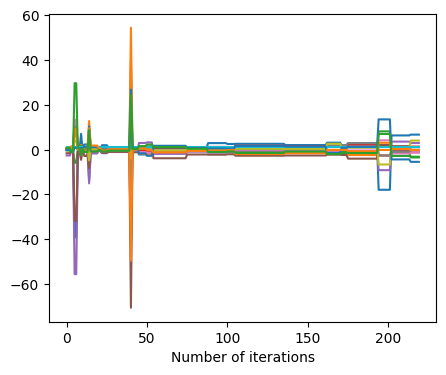

In [51]:
from scipy.linalg import lu
from scipy.linalg import solve

c = []
for i in range(30, 250):
    pl, weights_contribution = lu(weights_output[0:i], permute_l=True)
    out = solve(weights_contribution, np.ones(13))
    out = out/out[-4]
    c.append(out)
c = np.array(c)
c_T = c.T
ran = [i for i in range(len(c_T[0]))]
fig = plt.figure(figsize=(5,4))

for i in range(len(c_T)):
    plt.plot(ran, c_T[i])
plt.xlabel("Number of iterations")
# plt.savefig('./linear/{}_contribution_calculation_iteration.png'.format(name_prefix), dpi=300, bbox_inches='tight')
plt.savefig('./New_figures/{}_contribution_calculation_iteration.png'.format(name_prefix), dpi=300, bbox_inches='tight')


/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


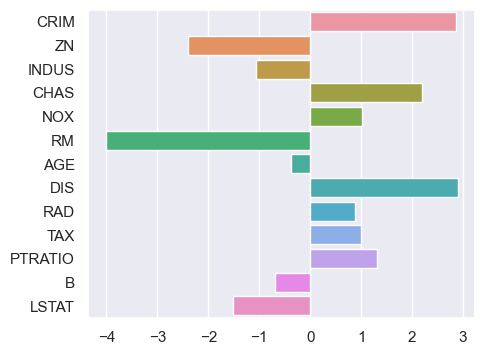

In [70]:
import seaborn as sns; sns.set()


fig = plt.figure(figsize=(5,4))
sns.set(color_codes=True)
sns.set(font_scale=1)

sns.barplot(c[-30], labels)
# plt.savefig('./linear/{}_contribution_calculation.png'.format(name_prefix), dpi=300, bbox_inches='tight')
plt.savefig('./New_figures/{}_contribution_calculation.png'.format(name_prefix), dpi=300, bbox_inches='tight')


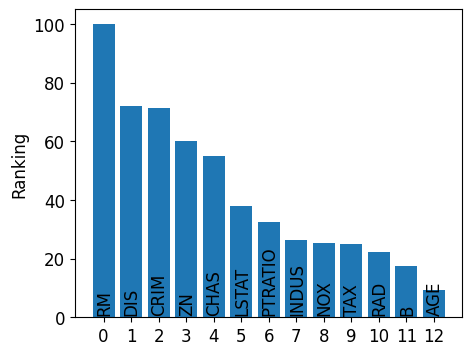

In [71]:
plt.style.use('default')

fig_FI_contribution_cal = plot_feature_importance(labels, c[-30])
fig_FI_contribution_cal.savefig('./New_figures/{}_hist_cc.png'.format(name_prefix), dpi = 300, bbox_inches='tight')

In [85]:
from scipy.linalg import lu
from scipy.linalg import solve
b = []
for i in range(13,280):
    pl, weights_contribution = lu(weights[:i], permute_l=True)
    out = solve(weights_contribution, np.ones(13))
    b.append(utilities.rank_importance(labels, np.abs(out)))
b

[array([ 8.,  4.,  5.,  1.,  3., 13.,  2., 10.,  9., 12.,  7.,  6., 11.]),
 array([ 8., 12.,  7.,  6.,  4., 11.,  1.,  3.,  9., 13.,  5.,  2., 10.]),
 array([ 6., 12.,  3.,  7.,  5., 13.,  1., 10.,  9., 11.,  8.,  2.,  4.]),
 array([ 8., 13.,  3.,  4.,  5.,  7.,  1.,  9.,  6., 11.,  2., 10., 12.]),
 array([ 9., 11.,  1., 13.,  6.,  4.,  3., 10.,  2.,  7.,  5.,  8., 12.]),
 array([ 8., 11.,  3., 13.,  6.,  7.,  5.,  9.,  2.,  4.,  1., 10., 12.]),
 array([ 5., 10.,  2., 12.,  7.,  9.,  3.,  8.,  4.,  6.,  1., 11., 13.]),
 array([ 5., 10.,  2., 12.,  7.,  9.,  3.,  8.,  4.,  6.,  1., 11., 13.]),
 array([ 5., 10.,  2., 12.,  7.,  9.,  3.,  8.,  4.,  6.,  1., 11., 13.]),
 array([ 5., 10.,  2., 12.,  7.,  9.,  3.,  8.,  4.,  6.,  1., 11., 13.]),
 array([ 7.,  6.,  3.,  1.,  9., 13.,  2.,  5.,  8., 11.,  4., 10., 12.]),
 array([ 7.,  6.,  3.,  1.,  9., 13.,  2.,  5.,  8., 11.,  4., 10., 12.]),
 array([ 7.,  6.,  3.,  1.,  9., 13.,  2.,  5.,  8., 11.,  4., 10., 12.]),
 array([ 7.,  6.,  4.,  1

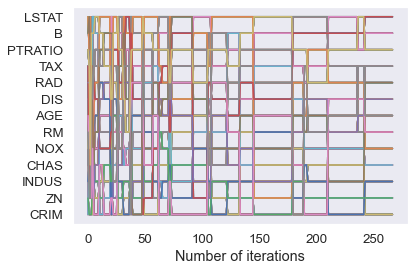

In [86]:
weights_contribution_ranking = np.array(b)
ra = [i for i in range(len(weights_contribution_ranking))]
for i in range(13):
    plt.plot(ra, weights_contribution_ranking)
plt.yticks([i for i in range(1,14)], labels)
plt.xlabel("Number of iterations")
plt.grid(b=None)

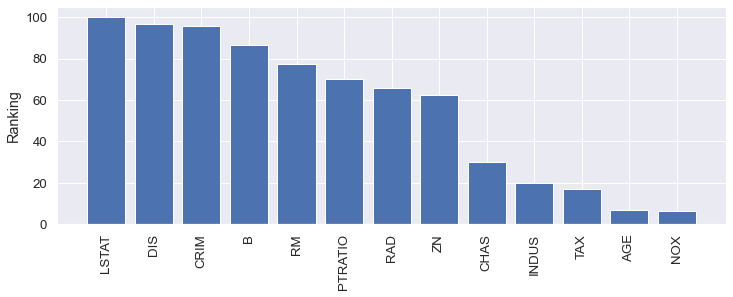

In [92]:
fig_FI_contri = utilities.plot_feature_importance(labels, out/out[-1])

### Permutation method

In [72]:
FI_perm = utilities.Feature_Importance_Layer.permutation_matrix(base_model, X, y)

Permutation Importance:  [ 1.89027137  4.2913316   1.24719694  1.83966877 -0.07382892 20.59103835
  0.09467588  9.1073783   3.4938846   4.47455538  0.67653895  3.10115086
 25.34817355]


[ 1.89027137  4.2913316   1.24719694  1.83966877 -0.07382892 20.59103835
  0.09467588  9.1073783   3.4938846   4.47455538  0.67653895  3.10115086
 25.34817355]


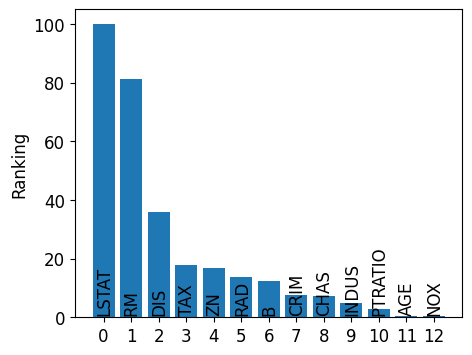

In [73]:
print(FI_perm)
# fig_FI_perm = utilities.plot_feature_importance(labels, FI_perm)

fig_FI_perm = plot_feature_importance(labels, FI_perm)

In [74]:
# fig_FI_perm.savefig('./linear/{}_FI_perm.png'.format(name_prefix), dpi=300, bbox_inches='tight')
fig_FI_perm.savefig('./New_figures/{}_FI_perm.png'.format(name_prefix), dpi=300, bbox_inches='tight')


### Connection weights

In [75]:
outputs = [layer.weights for layer in base_model.layers]
weights = outputs[0][0].numpy()

In [46]:
weights

array([[-1.22464724e-01],
       [ 7.10934624e-02],
       [-5.27463928e-02],
       [ 3.52685809e+00],
       [ 1.33012938e+00],
       [ 4.58542919e+00],
       [ 1.88106392e-03],
       [-9.48022246e-01],
       [ 2.08370328e-01],
       [-1.29104117e-02],
       [-1.58835933e-01],
       [ 1.58954058e-02],
       [-5.02721846e-01]], dtype=float32)

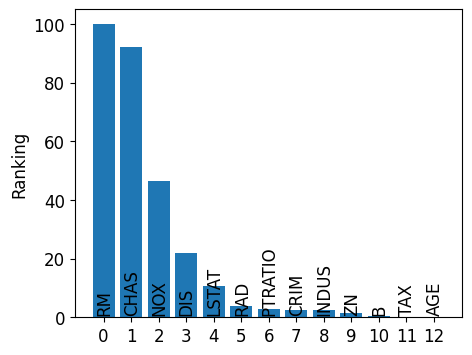

In [76]:
# fig_FI_connection_weights = utilities.plot_feature_importance(labels, weights[:,0])
fig_FI_connection_weights = plot_feature_importance(labels, weights[:,0])

In [77]:
# fig_FI_connection_weights.savefig('./linear/{}_FI_connection_weights.png'.format(name_prefix), dpi=300, bbox_inches='tight')
fig_FI_connection_weights.savefig('./New_figures/{}_FI_connection_weights.png'.format(name_prefix), dpi=300, bbox_inches='tight')

## T-Statistic

In [26]:
outputs = [layer.weights for layer in base_model.layers]
weights = outputs[0][0].numpy()
weights = np.abs(weights)
weights = np.reshape(weights, (13))
weights

array([1.1139005e-01, 6.3809268e-02, 6.2590405e-02, 3.0829704e+00,
       2.2201145e+00, 4.7113562e+00, 1.4537873e-05, 8.6604965e-01,
       9.6350878e-02, 8.3521698e-03, 2.7546546e-01, 1.4790044e-02,
       4.6917811e-01], dtype=float32)

In [13]:
# std of features
std = np.std(X, axis=0)
std

array([8.59304135e+00, 2.32993957e+01, 6.85357058e+00, 2.53742935e-01,
       1.15763115e-01, 7.01922514e-01, 2.81210326e+01, 2.10362836e+00,
       8.69865112e+00, 1.68370495e+02, 2.16280519e+00, 9.12046075e+01,
       7.13400164e+00])

In [17]:
# The t-statistic is the estimated weight scaled with its standard error.
FI_t_stat = weights/std
FI_t_stat

array([1.29628198e-02, 2.73866623e-03, 9.13252510e-03, 1.21499753e+01,
       1.91780816e+01, 6.71207443e+00, 5.16975065e-07, 4.11693275e-01,
       1.10765310e-02, 4.96058990e-05, 1.27364896e-01, 1.62163344e-04,
       6.57664708e-02])

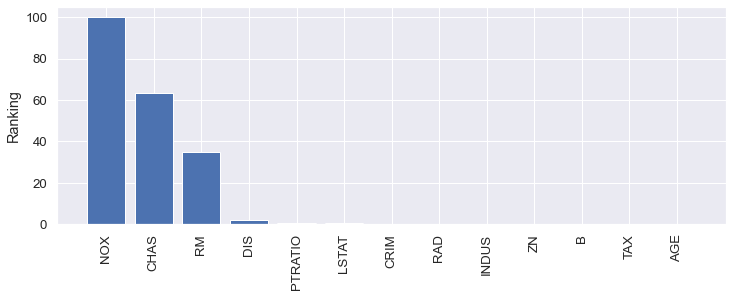

In [27]:
fig_FI_t_stat = utilities.plot_feature_importance(labels, FI_t_stat)

## Prediction explaination

### Random forest

In [78]:
RF_model, FI_RF = utilities.Feature_Importance_Layer.RF_matrix(X_train, y_train)

RF :  [0.04394516 0.00095191 0.00529938 0.00195642 0.02342082 0.32070454
 0.01151716 0.0448273  0.00379049 0.01747817 0.01539154 0.00914164
 0.50157546]


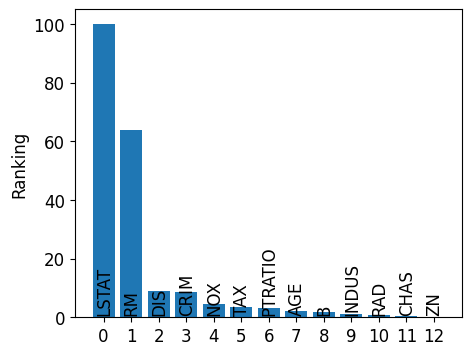

In [79]:
fig_FI_RF = plot_feature_importance(labels, FI_RF)

In [80]:
fig_FI_RF.savefig('./New_figures/{}_FI_RF.png'.format(name_prefix), dpi=300, bbox_inches='tight')


### Shap

In [81]:
import shap

explainer = shap.KernelExplainer(base_model.predict, X_train)

shap_values = explainer.shap_values(X_test, nsamples=100)
# ...or pass tensors directly
print(shap_values)
# plot the feature attributions

Using 404 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/102 [00:00<?, ?it/s]

[array([[ 0.        , -0.72856893, -1.84062575, ...,  0.        ,
        -0.27985287, -5.24845891],
       [-0.93205519, -0.72496902, -0.79957934, ...,  0.        ,
        -5.16166249, -1.4063452 ],
       [ 0.38778192, -0.73040357,  0.46059163, ...,  0.        ,
         0.60072222,  1.75815596],
       ...,
       [ 0.37647932, -0.70957935,  0.65017484, ..., -0.19500494,
         0.57126109,  1.10543166],
       [ 0.33104468, -0.69731201,  0.34994664, ..., -0.29621059,
         0.47277735,  0.        ],
       [ 0.        , -0.70640479, -0.74321949, ..., -0.24919701,
         0.60949437, -2.72138403]])]


In [83]:
FI_shap = np.mean((shap_values[0]), axis=0)

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


<AxesSubplot:>

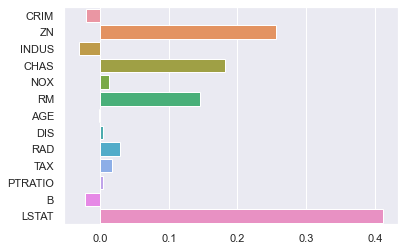

In [70]:
# shap.summary_plot(shap_values, labels)

sns.barplot(FI_shap, labels)


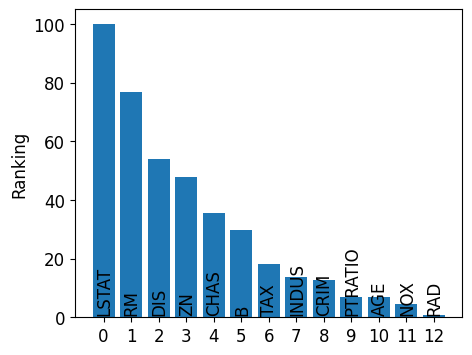

In [84]:
fig_FI_shap = plot_feature_importance(labels, FI_shap)

In [85]:
fig_FI_shap.savefig('./New_figures/{}_FI_shap.png'.format(name_prefix), dpi=300, bbox_inches='tight')


### Recursive Feature Elimination

In [110]:
def feature_selection(X, y, feature_importance):
    index = np.where(feature_importance<1)
    X = X[:, index[0]]
    base_model = tf.keras.Sequential([tf.keras.layers.Dense(input_dim=12, units=1)])
    opt = utilities.tf.keras.optimizers.Adam()

    base_model.compile(loss='mse', optimizer=opt, metrics=['mae'])
    base_model.summary()
    print(np.shape(X))
    history = base_model.fit(X, y, epochs=2000, batch_size=10, verbose=1)
    return history
    
history_important_features = feature_selection(X, y, weights_scaled)

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 1)                 13        
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________
(506, 12)
Epoch 1/2000
51/51 [==============================] - 0s 761us/step - loss: 33128.9258 - mae: 135.9044
Epoch 2/2000
51/51 [==============================] - 0s 918us/step - loss: 22629.9180 - mae: 104.8101
Epoch 3/2000
51/51 [==============================] - 0s 933us/step - loss: 16400.7520 - mae: 88.8818
Epoch 4/2000
51/51 [==============================] - 0s 863us/step - loss: 12785.5244 - mae: 82.9352
Epoch 5/2000
51/51 [==============================] - 0s 801us/step - loss: 10759.1426 - mae: 80.1028
Epoch 6/2000
51/51 [==============================] - 0s 677us/step - loss: 9424.5566 - mae: 77.7538
Epoch 7/2000
51/51 [========

51/51 [==============================] - 0s 609us/step - loss: 42.1216 - mae: 4.9866
Epoch 160/2000
51/51 [==============================] - 0s 606us/step - loss: 41.5731 - mae: 4.8791
Epoch 161/2000
51/51 [==============================] - 0s 595us/step - loss: 42.7454 - mae: 4.9680
Epoch 162/2000
51/51 [==============================] - 0s 544us/step - loss: 42.7584 - mae: 4.9953
Epoch 163/2000
51/51 [==============================] - 0s 543us/step - loss: 42.2640 - mae: 4.9374
Epoch 164/2000
51/51 [==============================] - 0s 639us/step - loss: 41.6371 - mae: 4.9391
Epoch 165/2000
51/51 [==============================] - 0s 602us/step - loss: 41.5218 - mae: 4.8867
Epoch 166/2000
51/51 [==============================] - 0s 587us/step - loss: 41.7221 - mae: 4.8887
Epoch 167/2000
51/51 [==============================] - 0s 580us/step - loss: 42.5410 - mae: 4.9571
Epoch 168/2000
51/51 [==============================] - 0s 589us/step - loss: 41.1941 - mae: 4.8558
Epoch 169/2000


51/51 [==============================] - 0s 567us/step - loss: 34.9435 - mae: 4.3670
Epoch 242/2000
51/51 [==============================] - 0s 592us/step - loss: 34.4787 - mae: 4.3315
Epoch 243/2000
51/51 [==============================] - 0s 543us/step - loss: 34.9842 - mae: 4.4254
Epoch 244/2000
51/51 [==============================] - 0s 569us/step - loss: 34.6877 - mae: 4.2932
Epoch 245/2000
51/51 [==============================] - 0s 559us/step - loss: 34.7279 - mae: 4.3399
Epoch 246/2000
51/51 [==============================] - 0s 573us/step - loss: 34.4241 - mae: 4.3388
Epoch 247/2000
51/51 [==============================] - 0s 567us/step - loss: 34.2246 - mae: 4.3210
Epoch 248/2000
51/51 [==============================] - 0s 540us/step - loss: 34.0996 - mae: 4.3049
Epoch 249/2000
51/51 [==============================] - 0s 555us/step - loss: 34.0871 - mae: 4.3201
Epoch 250/2000
51/51 [==============================] - 0s 546us/step - loss: 34.0568 - mae: 4.3182
Epoch 251/2000


51/51 [==============================] - 0s 604us/step - loss: 30.5199 - mae: 4.0646
Epoch 324/2000
51/51 [==============================] - 0s 622us/step - loss: 30.5170 - mae: 3.9505
Epoch 325/2000
51/51 [==============================] - 0s 577us/step - loss: 31.3557 - mae: 4.0936
Epoch 326/2000
51/51 [==============================] - 0s 562us/step - loss: 31.1431 - mae: 4.0568
Epoch 327/2000
51/51 [==============================] - 0s 597us/step - loss: 31.3262 - mae: 4.0120
Epoch 328/2000
51/51 [==============================] - 0s 622us/step - loss: 30.6348 - mae: 3.9893
Epoch 329/2000
51/51 [==============================] - 0s 612us/step - loss: 30.4152 - mae: 3.9898
Epoch 330/2000
51/51 [==============================] - 0s 589us/step - loss: 31.0269 - mae: 3.9884
Epoch 331/2000
51/51 [==============================] - 0s 589us/step - loss: 30.2291 - mae: 3.9712
Epoch 332/2000
51/51 [==============================] - 0s 578us/step - loss: 30.9767 - mae: 4.0496
Epoch 333/2000


51/51 [==============================] - 0s 631us/step - loss: 28.7593 - mae: 3.8776
Epoch 406/2000
51/51 [==============================] - 0s 555us/step - loss: 28.1917 - mae: 3.8048
Epoch 407/2000
51/51 [==============================] - 0s 601us/step - loss: 28.5208 - mae: 3.8026
Epoch 408/2000
51/51 [==============================] - 0s 610us/step - loss: 28.7070 - mae: 3.8572
Epoch 409/2000
51/51 [==============================] - 0s 616us/step - loss: 28.9937 - mae: 3.8465
Epoch 410/2000
51/51 [==============================] - 0s 648us/step - loss: 28.5187 - mae: 3.8444
Epoch 411/2000
51/51 [==============================] - 0s 611us/step - loss: 28.9259 - mae: 3.8894
Epoch 412/2000
51/51 [==============================] - 0s 599us/step - loss: 28.9345 - mae: 3.8786
Epoch 413/2000
51/51 [==============================] - 0s 625us/step - loss: 28.9003 - mae: 3.8372
Epoch 414/2000
51/51 [==============================] - 0s 581us/step - loss: 28.6711 - mae: 3.8241
Epoch 415/2000


51/51 [==============================] - 0s 610us/step - loss: 26.8368 - mae: 3.6638
Epoch 488/2000
51/51 [==============================] - 0s 635us/step - loss: 28.4098 - mae: 3.7539
Epoch 489/2000
51/51 [==============================] - 0s 608us/step - loss: 26.8403 - mae: 3.6686
Epoch 490/2000
51/51 [==============================] - 0s 571us/step - loss: 26.7406 - mae: 3.6787
Epoch 491/2000
51/51 [==============================] - 0s 553us/step - loss: 26.9727 - mae: 3.6683
Epoch 492/2000
51/51 [==============================] - 0s 558us/step - loss: 26.8201 - mae: 3.7585
Epoch 493/2000
51/51 [==============================] - 0s 564us/step - loss: 26.8901 - mae: 3.6943
Epoch 494/2000
51/51 [==============================] - 0s 555us/step - loss: 27.4249 - mae: 3.7188
Epoch 495/2000
51/51 [==============================] - 0s 596us/step - loss: 27.4183 - mae: 3.7294
Epoch 496/2000
51/51 [==============================] - 0s 618us/step - loss: 27.9196 - mae: 3.7555
Epoch 497/2000


51/51 [==============================] - 0s 622us/step - loss: 26.8938 - mae: 3.7071
Epoch 570/2000
51/51 [==============================] - 0s 595us/step - loss: 26.4182 - mae: 3.5828
Epoch 571/2000
51/51 [==============================] - 0s 528us/step - loss: 25.9384 - mae: 3.5571
Epoch 572/2000
51/51 [==============================] - 0s 551us/step - loss: 26.5861 - mae: 3.6701
Epoch 573/2000
51/51 [==============================] - 0s 559us/step - loss: 26.0874 - mae: 3.6050
Epoch 574/2000
51/51 [==============================] - 0s 548us/step - loss: 26.5963 - mae: 3.6365
Epoch 575/2000
51/51 [==============================] - 0s 553us/step - loss: 26.1600 - mae: 3.5616
Epoch 576/2000
51/51 [==============================] - 0s 574us/step - loss: 26.3651 - mae: 3.6686
Epoch 577/2000
51/51 [==============================] - 0s 552us/step - loss: 27.9583 - mae: 3.7070
Epoch 578/2000
51/51 [==============================] - 0s 568us/step - loss: 26.7733 - mae: 3.6984
Epoch 579/2000


51/51 [==============================] - 0s 594us/step - loss: 25.5540 - mae: 3.5189
Epoch 652/2000
51/51 [==============================] - 0s 640us/step - loss: 25.8968 - mae: 3.5494
Epoch 653/2000
51/51 [==============================] - 0s 539us/step - loss: 25.9155 - mae: 3.5639
Epoch 654/2000
51/51 [==============================] - 0s 563us/step - loss: 25.8946 - mae: 3.5653
Epoch 655/2000
51/51 [==============================] - 0s 556us/step - loss: 25.9794 - mae: 3.5487
Epoch 656/2000
51/51 [==============================] - 0s 557us/step - loss: 25.6507 - mae: 3.5768
Epoch 657/2000
51/51 [==============================] - 0s 582us/step - loss: 25.7054 - mae: 3.6118
Epoch 658/2000
51/51 [==============================] - 0s 557us/step - loss: 25.4414 - mae: 3.4940
Epoch 659/2000
51/51 [==============================] - 0s 596us/step - loss: 26.2692 - mae: 3.6530
Epoch 660/2000
51/51 [==============================] - 0s 601us/step - loss: 25.8877 - mae: 3.5505
Epoch 661/2000


51/51 [==============================] - 0s 665us/step - loss: 25.3928 - mae: 3.4889
Epoch 734/2000
51/51 [==============================] - 0s 602us/step - loss: 26.1003 - mae: 3.6171
Epoch 735/2000
51/51 [==============================] - 0s 625us/step - loss: 25.9077 - mae: 3.5947
Epoch 736/2000
51/51 [==============================] - 0s 595us/step - loss: 25.1498 - mae: 3.4841
Epoch 737/2000
51/51 [==============================] - 0s 611us/step - loss: 25.4354 - mae: 3.4507
Epoch 738/2000
51/51 [==============================] - 0s 587us/step - loss: 26.4022 - mae: 3.5500
Epoch 739/2000
51/51 [==============================] - 0s 578us/step - loss: 25.8080 - mae: 3.5508
Epoch 740/2000
51/51 [==============================] - 0s 546us/step - loss: 25.0155 - mae: 3.5156
Epoch 741/2000
51/51 [==============================] - 0s 545us/step - loss: 25.7142 - mae: 3.5309
Epoch 742/2000
51/51 [==============================] - 0s 559us/step - loss: 25.6929 - mae: 3.5359
Epoch 743/2000


51/51 [==============================] - 0s 551us/step - loss: 25.1461 - mae: 3.4449
Epoch 816/2000
51/51 [==============================] - 0s 611us/step - loss: 25.2774 - mae: 3.4551
Epoch 817/2000
51/51 [==============================] - 0s 566us/step - loss: 25.0482 - mae: 3.4760
Epoch 818/2000
51/51 [==============================] - 0s 692us/step - loss: 25.9421 - mae: 3.5408
Epoch 819/2000
51/51 [==============================] - 0s 668us/step - loss: 25.4985 - mae: 3.4721
Epoch 820/2000
51/51 [==============================] - 0s 679us/step - loss: 25.7423 - mae: 3.5020
Epoch 821/2000
51/51 [==============================] - 0s 580us/step - loss: 25.4653 - mae: 3.5110
Epoch 822/2000
51/51 [==============================] - 0s 581us/step - loss: 25.4602 - mae: 3.4795
Epoch 823/2000
51/51 [==============================] - 0s 588us/step - loss: 25.5411 - mae: 3.4878
Epoch 824/2000
51/51 [==============================] - 0s 584us/step - loss: 25.9396 - mae: 3.5256
Epoch 825/2000


51/51 [==============================] - 0s 592us/step - loss: 25.7907 - mae: 3.4458
Epoch 898/2000
51/51 [==============================] - 0s 595us/step - loss: 25.1668 - mae: 3.4276
Epoch 899/2000
51/51 [==============================] - 0s 583us/step - loss: 24.9079 - mae: 3.4527
Epoch 900/2000
51/51 [==============================] - 0s 553us/step - loss: 25.5774 - mae: 3.4648
Epoch 901/2000
51/51 [==============================] - 0s 561us/step - loss: 25.5157 - mae: 3.4450
Epoch 902/2000
51/51 [==============================] - 0s 582us/step - loss: 25.5297 - mae: 3.5120
Epoch 903/2000
51/51 [==============================] - 0s 592us/step - loss: 25.1497 - mae: 3.5146
Epoch 904/2000
51/51 [==============================] - 0s 604us/step - loss: 27.6262 - mae: 3.6711
Epoch 905/2000
51/51 [==============================] - 0s 606us/step - loss: 25.4058 - mae: 3.4919
Epoch 906/2000
51/51 [==============================] - 0s 590us/step - loss: 25.4398 - mae: 3.4462
Epoch 907/2000


51/51 [==============================] - 0s 647us/step - loss: 25.1172 - mae: 3.4668
Epoch 980/2000
51/51 [==============================] - 0s 676us/step - loss: 25.6045 - mae: 3.4535
Epoch 981/2000
51/51 [==============================] - 0s 600us/step - loss: 25.2379 - mae: 3.4529
Epoch 982/2000
51/51 [==============================] - 0s 583us/step - loss: 25.1152 - mae: 3.4519
Epoch 983/2000
51/51 [==============================] - 0s 579us/step - loss: 25.2676 - mae: 3.4652
Epoch 984/2000
51/51 [==============================] - 0s 582us/step - loss: 25.0958 - mae: 3.4204
Epoch 985/2000
51/51 [==============================] - 0s 557us/step - loss: 25.4270 - mae: 3.4223
Epoch 986/2000
51/51 [==============================] - 0s 584us/step - loss: 26.1038 - mae: 3.5609
Epoch 987/2000
51/51 [==============================] - 0s 590us/step - loss: 25.9173 - mae: 3.4847
Epoch 988/2000
51/51 [==============================] - 0s 651us/step - loss: 26.1353 - mae: 3.5483
Epoch 989/2000


51/51 [==============================] - 0s 660us/step - loss: 24.8635 - mae: 3.4404
Epoch 1142/2000
51/51 [==============================] - 0s 614us/step - loss: 24.9642 - mae: 3.4059
Epoch 1143/2000
51/51 [==============================] - 0s 570us/step - loss: 25.1951 - mae: 3.5719
Epoch 1144/2000
51/51 [==============================] - 0s 621us/step - loss: 24.8473 - mae: 3.3769
Epoch 1145/2000
51/51 [==============================] - 0s 623us/step - loss: 24.9161 - mae: 3.4816
Epoch 1146/2000
51/51 [==============================] - 0s 625us/step - loss: 25.0414 - mae: 3.4125
Epoch 1147/2000
51/51 [==============================] - 0s 603us/step - loss: 24.7101 - mae: 3.4240
Epoch 1148/2000
51/51 [==============================] - 0s 644us/step - loss: 25.2972 - mae: 3.4419
Epoch 1149/2000
51/51 [==============================] - 0s 585us/step - loss: 24.7579 - mae: 3.4041
Epoch 1150/2000
51/51 [==============================] - 0s 639us/step - loss: 25.5437 - mae: 3.5518
Epoch 

51/51 [==============================] - 0s 608us/step - loss: 25.1259 - mae: 3.4865
Epoch 1304/2000
51/51 [==============================] - 0s 583us/step - loss: 25.9586 - mae: 3.5102
Epoch 1305/2000
51/51 [==============================] - 0s 602us/step - loss: 24.9709 - mae: 3.3812
Epoch 1306/2000
51/51 [==============================] - 0s 575us/step - loss: 26.0220 - mae: 3.5259
Epoch 1307/2000
51/51 [==============================] - 0s 573us/step - loss: 24.7922 - mae: 3.3853
Epoch 1308/2000
51/51 [==============================] - 0s 581us/step - loss: 24.8430 - mae: 3.3817
Epoch 1309/2000
51/51 [==============================] - 0s 575us/step - loss: 25.0321 - mae: 3.3738
Epoch 1310/2000
51/51 [==============================] - 0s 573us/step - loss: 25.1749 - mae: 3.4527
Epoch 1311/2000
51/51 [==============================] - 0s 561us/step - loss: 25.2901 - mae: 3.4636
Epoch 1312/2000
51/51 [==============================] - 0s 544us/step - loss: 25.0390 - mae: 3.4198
Epoch 

51/51 [==============================] - 0s 630us/step - loss: 25.4004 - mae: 3.4050
Epoch 1465/2000
51/51 [==============================] - 0s 564us/step - loss: 24.6330 - mae: 3.3420
Epoch 1466/2000
51/51 [==============================] - 0s 565us/step - loss: 24.9083 - mae: 3.4658
Epoch 1467/2000
51/51 [==============================] - 0s 571us/step - loss: 25.0683 - mae: 3.3582
Epoch 1468/2000
51/51 [==============================] - 0s 583us/step - loss: 25.0240 - mae: 3.3800
Epoch 1469/2000
51/51 [==============================] - 0s 603us/step - loss: 24.8787 - mae: 3.4150
Epoch 1470/2000
51/51 [==============================] - 0s 629us/step - loss: 24.5553 - mae: 3.3801
Epoch 1471/2000
51/51 [==============================] - 0s 613us/step - loss: 25.4173 - mae: 3.4111
Epoch 1472/2000
51/51 [==============================] - 0s 587us/step - loss: 24.8605 - mae: 3.3360
Epoch 1473/2000
51/51 [==============================] - 0s 605us/step - loss: 24.9587 - mae: 3.4475
Epoch 

51/51 [==============================] - 0s 569us/step - loss: 25.0098 - mae: 3.3981
Epoch 1627/2000
51/51 [==============================] - 0s 579us/step - loss: 24.9159 - mae: 3.3798
Epoch 1628/2000
51/51 [==============================] - 0s 551us/step - loss: 25.2798 - mae: 3.4368
Epoch 1629/2000
51/51 [==============================] - 0s 541us/step - loss: 24.9681 - mae: 3.4073
Epoch 1630/2000
51/51 [==============================] - 0s 569us/step - loss: 24.6743 - mae: 3.3927
Epoch 1631/2000
51/51 [==============================] - 0s 549us/step - loss: 24.8000 - mae: 3.3551
Epoch 1632/2000
51/51 [==============================] - 0s 550us/step - loss: 24.5611 - mae: 3.3612
Epoch 1633/2000
51/51 [==============================] - 0s 545us/step - loss: 24.5358 - mae: 3.3653
Epoch 1634/2000
51/51 [==============================] - 0s 587us/step - loss: 24.8251 - mae: 3.3725
Epoch 1635/2000
51/51 [==============================] - 0s 577us/step - loss: 24.9338 - mae: 3.3782
Epoch 

51/51 [==============================] - 0s 588us/step - loss: 24.6259 - mae: 3.3193
Epoch 1789/2000
51/51 [==============================] - 0s 546us/step - loss: 24.9724 - mae: 3.4067
Epoch 1790/2000
51/51 [==============================] - 0s 556us/step - loss: 24.9698 - mae: 3.4489
Epoch 1791/2000
51/51 [==============================] - 0s 552us/step - loss: 25.3026 - mae: 3.3933
Epoch 1792/2000
51/51 [==============================] - 0s 530us/step - loss: 24.9784 - mae: 3.3930
Epoch 1793/2000
51/51 [==============================] - 0s 560us/step - loss: 24.3184 - mae: 3.3202
Epoch 1794/2000
51/51 [==============================] - 0s 566us/step - loss: 25.4718 - mae: 3.4455
Epoch 1795/2000
51/51 [==============================] - 0s 563us/step - loss: 24.8042 - mae: 3.3471
Epoch 1796/2000
51/51 [==============================] - 0s 567us/step - loss: 25.0297 - mae: 3.4480
Epoch 1797/2000
51/51 [==============================] - 0s 555us/step - loss: 24.9468 - mae: 3.3776
Epoch 

51/51 [==============================] - 0s 581us/step - loss: 25.7182 - mae: 3.3843
Epoch 1951/2000
51/51 [==============================] - 0s 579us/step - loss: 24.9767 - mae: 3.4197
Epoch 1952/2000
51/51 [==============================] - 0s 541us/step - loss: 24.4144 - mae: 3.3360
Epoch 1953/2000
51/51 [==============================] - 0s 564us/step - loss: 24.9285 - mae: 3.4395
Epoch 1954/2000
51/51 [==============================] - 0s 562us/step - loss: 25.2584 - mae: 3.4431
Epoch 1955/2000
51/51 [==============================] - 0s 560us/step - loss: 24.9296 - mae: 3.3861
Epoch 1956/2000
51/51 [==============================] - 0s 546us/step - loss: 25.3831 - mae: 3.3944
Epoch 1957/2000
51/51 [==============================] - 0s 536us/step - loss: 24.7384 - mae: 3.3772
Epoch 1958/2000
51/51 [==============================] - 0s 569us/step - loss: 24.9716 - mae: 3.3707
Epoch 1959/2000
51/51 [==============================] - 0s 563us/step - loss: 24.7433 - mae: 3.3575
Epoch 

In [144]:
def feature_selection_recursive(X, y, feature_importance):
    j = -1
    scores = []
    for i in range(12):
        X_copy = np.copy(X)
        index = [i for i in range(13)]
        index_del = weights_scaled.argsort()[j:][::-1]
        index = np.delete(index, index_del)
        j = j - 1
        X_copy = X_copy[:, index]
        base_model = tf.keras.Sequential([tf.keras.layers.Dense(input_dim=len(X_copy[-1]), units=1)])
        opt = utilities.tf.keras.optimizers.Adam()
        base_model.compile(loss='mse', optimizer=opt, metrics=['mae'])
        base_model.summary()
        history = base_model.fit(X_copy, y, epochs=1000, batch_size=10, verbose=1)
        scores.append(history.history['mae'][-1])
        
    return scores
    
history_important_features_recrusive = feature_selection_recursive(X, y, weights_scaled)

Model: "sequential_38"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_38 (Dense)             (None, 1)                 13        
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
51/51 [==============================] - 0s 801us/step - loss: 19507.3750 - mae: 124.9472
Epoch 2/1000
51/51 [==============================] - 0s 747us/step - loss: 10413.6260 - mae: 85.8624
Epoch 3/1000
51/51 [==============================] - 0s 892us/step - loss: 5502.0215 - mae: 57.6040
Epoch 4/1000
51/51 [==============================] - 0s 848us/step - loss: 3164.5332 - mae: 42.2774
Epoch 5/1000
51/51 [==============================] - 0s 822us/step - loss: 2190.8086 - mae: 36.9359
Epoch 6/1000
51/51 [==============================] - 0s 734us/step - loss: 1791.6597 - mae: 35.1104
Epoch 7/1000
51/51 [======================

51/51 [==============================] - 0s 589us/step - loss: 39.1991 - mae: 4.7518
Epoch 160/1000
51/51 [==============================] - 0s 534us/step - loss: 39.9445 - mae: 4.7466
Epoch 161/1000
51/51 [==============================] - 0s 573us/step - loss: 39.5496 - mae: 4.7148
Epoch 162/1000
51/51 [==============================] - 0s 579us/step - loss: 39.0958 - mae: 4.6825
Epoch 163/1000
51/51 [==============================] - 0s 547us/step - loss: 39.3564 - mae: 4.6825
Epoch 164/1000
51/51 [==============================] - 0s 546us/step - loss: 39.1531 - mae: 4.6869
Epoch 165/1000
51/51 [==============================] - 0s 568us/step - loss: 38.9629 - mae: 4.6862
Epoch 166/1000
51/51 [==============================] - 0s 578us/step - loss: 38.8282 - mae: 4.7031
Epoch 167/1000
51/51 [==============================] - 0s 651us/step - loss: 39.5288 - mae: 4.6689
Epoch 168/1000
51/51 [==============================] - 0s 572us/step - loss: 39.3227 - mae: 4.6918
Epoch 169/1000


51/51 [==============================] - 0s 597us/step - loss: 34.4780 - mae: 4.3153
Epoch 242/1000
51/51 [==============================] - 0s 603us/step - loss: 34.1163 - mae: 4.3140
Epoch 243/1000
51/51 [==============================] - 0s 542us/step - loss: 34.0530 - mae: 4.2844
Epoch 244/1000
51/51 [==============================] - 0s 569us/step - loss: 34.3276 - mae: 4.3420
Epoch 245/1000
51/51 [==============================] - 0s 543us/step - loss: 33.9324 - mae: 4.2539
Epoch 246/1000
51/51 [==============================] - 0s 582us/step - loss: 33.8498 - mae: 4.3036
Epoch 247/1000
51/51 [==============================] - 0s 572us/step - loss: 33.7717 - mae: 4.2282
Epoch 248/1000
51/51 [==============================] - 0s 583us/step - loss: 34.2496 - mae: 4.3273
Epoch 249/1000
51/51 [==============================] - 0s 561us/step - loss: 33.8030 - mae: 4.3225
Epoch 250/1000
51/51 [==============================] - 0s 548us/step - loss: 33.8066 - mae: 4.2967
Epoch 251/1000


51/51 [==============================] - 0s 583us/step - loss: 31.1810 - mae: 4.0859
Epoch 324/1000
51/51 [==============================] - 0s 548us/step - loss: 31.4519 - mae: 4.0314
Epoch 325/1000
51/51 [==============================] - 0s 565us/step - loss: 30.7377 - mae: 4.0259
Epoch 326/1000
51/51 [==============================] - 0s 598us/step - loss: 30.9460 - mae: 4.0656
Epoch 327/1000
51/51 [==============================] - 0s 568us/step - loss: 31.0322 - mae: 4.1066
Epoch 328/1000
51/51 [==============================] - 0s 554us/step - loss: 30.6338 - mae: 4.0113
Epoch 329/1000
51/51 [==============================] - 0s 542us/step - loss: 30.8036 - mae: 4.0616
Epoch 330/1000
51/51 [==============================] - 0s 562us/step - loss: 30.6075 - mae: 4.0207
Epoch 331/1000
51/51 [==============================] - 0s 574us/step - loss: 31.3864 - mae: 4.1727
Epoch 332/1000
51/51 [==============================] - 0s 556us/step - loss: 31.8750 - mae: 4.0742
Epoch 333/1000


51/51 [==============================] - 0s 600us/step - loss: 28.7006 - mae: 3.8730
Epoch 406/1000
51/51 [==============================] - 0s 610us/step - loss: 29.6422 - mae: 3.9703
Epoch 407/1000
51/51 [==============================] - 0s 550us/step - loss: 30.1013 - mae: 3.9927
Epoch 408/1000
51/51 [==============================] - 0s 573us/step - loss: 28.5486 - mae: 3.8688
Epoch 409/1000
51/51 [==============================] - 0s 568us/step - loss: 28.5997 - mae: 3.8819
Epoch 410/1000
51/51 [==============================] - 0s 551us/step - loss: 28.6425 - mae: 3.8339
Epoch 411/1000
51/51 [==============================] - 0s 565us/step - loss: 28.9548 - mae: 3.9008
Epoch 412/1000
51/51 [==============================] - 0s 560us/step - loss: 29.6801 - mae: 3.9044
Epoch 413/1000
51/51 [==============================] - 0s 578us/step - loss: 29.6640 - mae: 3.9102
Epoch 414/1000
51/51 [==============================] - 0s 550us/step - loss: 28.6769 - mae: 3.8484
Epoch 415/1000


51/51 [==============================] - 0s 555us/step - loss: 27.8333 - mae: 3.8156
Epoch 488/1000
51/51 [==============================] - 0s 632us/step - loss: 27.6138 - mae: 3.7513
Epoch 489/1000
51/51 [==============================] - 0s 551us/step - loss: 27.5243 - mae: 3.7659
Epoch 490/1000
51/51 [==============================] - 0s 571us/step - loss: 28.2418 - mae: 3.8344
Epoch 491/1000
51/51 [==============================] - 0s 563us/step - loss: 27.2380 - mae: 3.7056
Epoch 492/1000
51/51 [==============================] - 0s 561us/step - loss: 27.8066 - mae: 3.7631
Epoch 493/1000
51/51 [==============================] - 0s 541us/step - loss: 28.0993 - mae: 3.8615
Epoch 494/1000
51/51 [==============================] - 0s 557us/step - loss: 27.6055 - mae: 3.7297
Epoch 495/1000
51/51 [==============================] - 0s 573us/step - loss: 27.7482 - mae: 3.7961
Epoch 496/1000
51/51 [==============================] - 0s 552us/step - loss: 28.3811 - mae: 3.7879
Epoch 497/1000


51/51 [==============================] - 0s 551us/step - loss: 26.7323 - mae: 3.7024
Epoch 570/1000
51/51 [==============================] - 0s 605us/step - loss: 28.2998 - mae: 3.8006
Epoch 571/1000
51/51 [==============================] - 0s 546us/step - loss: 26.6358 - mae: 3.6206
Epoch 572/1000
51/51 [==============================] - 0s 572us/step - loss: 26.4605 - mae: 3.7024
Epoch 573/1000
51/51 [==============================] - 0s 575us/step - loss: 27.1117 - mae: 3.6781
Epoch 574/1000
51/51 [==============================] - 0s 580us/step - loss: 28.0753 - mae: 3.7448
Epoch 575/1000
51/51 [==============================] - 0s 638us/step - loss: 26.7349 - mae: 3.7207
Epoch 576/1000
51/51 [==============================] - 0s 563us/step - loss: 27.2323 - mae: 3.7027
Epoch 577/1000
51/51 [==============================] - 0s 571us/step - loss: 27.0999 - mae: 3.7218
Epoch 578/1000
51/51 [==============================] - 0s 554us/step - loss: 26.7540 - mae: 3.6676
Epoch 579/1000


51/51 [==============================] - 0s 581us/step - loss: 26.1419 - mae: 3.5768
Epoch 652/1000
51/51 [==============================] - 0s 544us/step - loss: 26.5220 - mae: 3.5585
Epoch 653/1000
51/51 [==============================] - 0s 560us/step - loss: 26.7025 - mae: 3.7273
Epoch 654/1000
51/51 [==============================] - 0s 562us/step - loss: 25.7654 - mae: 3.6529
Epoch 655/1000
51/51 [==============================] - 0s 550us/step - loss: 26.1155 - mae: 3.5359
Epoch 656/1000
51/51 [==============================] - 0s 563us/step - loss: 26.6119 - mae: 3.6301
Epoch 657/1000
51/51 [==============================] - 0s 574us/step - loss: 26.3575 - mae: 3.5757
Epoch 658/1000
51/51 [==============================] - 0s 562us/step - loss: 26.0041 - mae: 3.6568
Epoch 659/1000
51/51 [==============================] - 0s 546us/step - loss: 26.6033 - mae: 3.6227
Epoch 660/1000
51/51 [==============================] - 0s 546us/step - loss: 25.8538 - mae: 3.5845
Epoch 661/1000


51/51 [==============================] - 0s 595us/step - loss: 25.9961 - mae: 3.5701
Epoch 734/1000
51/51 [==============================] - 0s 579us/step - loss: 25.6889 - mae: 3.4583
Epoch 735/1000
51/51 [==============================] - 0s 1ms/step - loss: 26.1929 - mae: 3.6419
Epoch 736/1000
51/51 [==============================] - 0s 536us/step - loss: 26.2275 - mae: 3.5251
Epoch 737/1000
51/51 [==============================] - 0s 573us/step - loss: 25.8371 - mae: 3.5810
Epoch 738/1000
51/51 [==============================] - 0s 571us/step - loss: 25.5123 - mae: 3.5374
Epoch 739/1000
51/51 [==============================] - 0s 568us/step - loss: 25.5111 - mae: 3.4961
Epoch 740/1000
51/51 [==============================] - 0s 566us/step - loss: 25.2686 - mae: 3.5716
Epoch 741/1000
51/51 [==============================] - 0s 533us/step - loss: 25.8735 - mae: 3.5557
Epoch 742/1000
51/51 [==============================] - 0s 568us/step - loss: 26.0499 - mae: 3.5593
Epoch 743/1000
51

51/51 [==============================] - 0s 734us/step - loss: 25.3405 - mae: 3.5095
Epoch 816/1000
51/51 [==============================] - 0s 708us/step - loss: 25.8329 - mae: 3.5760
Epoch 817/1000
51/51 [==============================] - 0s 671us/step - loss: 25.5408 - mae: 3.5101
Epoch 818/1000
51/51 [==============================] - 0s 698us/step - loss: 25.5321 - mae: 3.5098
Epoch 819/1000
51/51 [==============================] - 0s 684us/step - loss: 25.1739 - mae: 3.5035
Epoch 820/1000
51/51 [==============================] - 0s 590us/step - loss: 25.9157 - mae: 3.4955
Epoch 821/1000
51/51 [==============================] - 0s 643us/step - loss: 25.8480 - mae: 3.5804
Epoch 822/1000
51/51 [==============================] - 0s 590us/step - loss: 25.6434 - mae: 3.4636
Epoch 823/1000
51/51 [==============================] - 0s 552us/step - loss: 26.0258 - mae: 3.6069
Epoch 824/1000
51/51 [==============================] - 0s 573us/step - loss: 26.3562 - mae: 3.5492
Epoch 825/1000


51/51 [==============================] - 0s 587us/step - loss: 25.5210 - mae: 3.4980
Epoch 898/1000
51/51 [==============================] - 0s 546us/step - loss: 24.8569 - mae: 3.4455
Epoch 899/1000
51/51 [==============================] - 0s 571us/step - loss: 25.5390 - mae: 3.4705
Epoch 900/1000
51/51 [==============================] - 0s 563us/step - loss: 25.7488 - mae: 3.5142
Epoch 901/1000
51/51 [==============================] - 0s 553us/step - loss: 25.2805 - mae: 3.4722
Epoch 902/1000
51/51 [==============================] - 0s 557us/step - loss: 25.5419 - mae: 3.5193
Epoch 903/1000
51/51 [==============================] - 0s 566us/step - loss: 25.0156 - mae: 3.4490
Epoch 904/1000
51/51 [==============================] - 0s 571us/step - loss: 25.9706 - mae: 3.5764
Epoch 905/1000
51/51 [==============================] - 0s 564us/step - loss: 25.1237 - mae: 3.4595
Epoch 906/1000
51/51 [==============================] - 0s 558us/step - loss: 25.1232 - mae: 3.5308
Epoch 907/1000


51/51 [==============================] - 0s 561us/step - loss: 25.4010 - mae: 3.4961
Epoch 980/1000
51/51 [==============================] - 0s 567us/step - loss: 24.8461 - mae: 3.4471
Epoch 981/1000
51/51 [==============================] - 0s 567us/step - loss: 25.0905 - mae: 3.4107
Epoch 982/1000
51/51 [==============================] - 0s 577us/step - loss: 25.0657 - mae: 3.4540
Epoch 983/1000
51/51 [==============================] - 0s 568us/step - loss: 24.7648 - mae: 3.3738
Epoch 984/1000
51/51 [==============================] - 0s 555us/step - loss: 24.9677 - mae: 3.4277
Epoch 985/1000
51/51 [==============================] - 0s 539us/step - loss: 25.3444 - mae: 3.4859
Epoch 986/1000
51/51 [==============================] - 0s 563us/step - loss: 25.6227 - mae: 3.5578
Epoch 987/1000
51/51 [==============================] - 0s 586us/step - loss: 26.3245 - mae: 3.5512
Epoch 988/1000
51/51 [==============================] - 0s 556us/step - loss: 25.3028 - mae: 3.4414
Epoch 989/1000


Epoch 56/1000
51/51 [==============================] - 0s 587us/step - loss: 97.2474 - mae: 7.3292
Epoch 57/1000
51/51 [==============================] - 0s 558us/step - loss: 96.5313 - mae: 7.3101
Epoch 58/1000
51/51 [==============================] - 0s 586us/step - loss: 95.8670 - mae: 7.2746
Epoch 59/1000
51/51 [==============================] - 0s 547us/step - loss: 94.8897 - mae: 7.2357
Epoch 60/1000
51/51 [==============================] - 0s 575us/step - loss: 94.2642 - mae: 7.2292
Epoch 61/1000
51/51 [==============================] - 0s 587us/step - loss: 93.6189 - mae: 7.1936
Epoch 62/1000
51/51 [==============================] - 0s 561us/step - loss: 92.6501 - mae: 7.1547
Epoch 63/1000
51/51 [==============================] - 0s 600us/step - loss: 91.7052 - mae: 7.1536
Epoch 64/1000
51/51 [==============================] - 0s 565us/step - loss: 91.0282 - mae: 7.0688
Epoch 65/1000
51/51 [==============================] - 0s 548us/step - loss: 90.4446 - mae: 7.0865
Epoch 66/1

51/51 [==============================] - 0s 590us/step - loss: 35.8433 - mae: 4.4829
Epoch 221/1000
51/51 [==============================] - 0s 541us/step - loss: 35.7857 - mae: 4.4795
Epoch 222/1000
51/51 [==============================] - 0s 587us/step - loss: 35.7351 - mae: 4.4323
Epoch 223/1000
51/51 [==============================] - 0s 555us/step - loss: 35.5797 - mae: 4.4257
Epoch 224/1000
51/51 [==============================] - 0s 559us/step - loss: 35.9834 - mae: 4.4845
Epoch 225/1000
51/51 [==============================] - 0s 546us/step - loss: 35.5695 - mae: 4.4439
Epoch 226/1000
51/51 [==============================] - 0s 564us/step - loss: 36.1516 - mae: 4.4197
Epoch 227/1000
51/51 [==============================] - 0s 565us/step - loss: 36.2279 - mae: 4.4649
Epoch 228/1000
51/51 [==============================] - 0s 559us/step - loss: 35.5911 - mae: 4.4094
Epoch 229/1000
51/51 [==============================] - 0s 560us/step - loss: 35.1727 - mae: 4.4240
Epoch 230/1000


51/51 [==============================] - 0s 589us/step - loss: 32.1956 - mae: 4.1793
Epoch 303/1000
51/51 [==============================] - 0s 618us/step - loss: 31.4283 - mae: 4.0197
Epoch 304/1000
51/51 [==============================] - 0s 554us/step - loss: 31.7195 - mae: 4.0852
Epoch 305/1000
51/51 [==============================] - 0s 563us/step - loss: 31.7600 - mae: 4.1283
Epoch 306/1000
51/51 [==============================] - 0s 572us/step - loss: 31.5228 - mae: 4.0951
Epoch 307/1000
51/51 [==============================] - 0s 556us/step - loss: 31.1823 - mae: 4.0753
Epoch 308/1000
51/51 [==============================] - 0s 553us/step - loss: 31.8063 - mae: 4.0891
Epoch 309/1000
51/51 [==============================] - 0s 571us/step - loss: 31.7784 - mae: 4.1357
Epoch 310/1000
51/51 [==============================] - 0s 567us/step - loss: 31.4270 - mae: 4.0728
Epoch 311/1000
51/51 [==============================] - 0s 570us/step - loss: 30.9996 - mae: 4.0496
Epoch 312/1000


51/51 [==============================] - 0s 582us/step - loss: 28.7840 - mae: 3.8270
Epoch 385/1000
51/51 [==============================] - 0s 593us/step - loss: 28.7882 - mae: 3.8080
Epoch 386/1000
51/51 [==============================] - 0s 563us/step - loss: 29.8595 - mae: 3.9718
Epoch 387/1000
51/51 [==============================] - 0s 554us/step - loss: 29.0522 - mae: 3.8624
Epoch 388/1000
51/51 [==============================] - 0s 570us/step - loss: 29.0656 - mae: 3.8823
Epoch 389/1000
51/51 [==============================] - 0s 576us/step - loss: 28.9049 - mae: 3.8701
Epoch 390/1000
51/51 [==============================] - 0s 608us/step - loss: 28.3885 - mae: 3.8053
Epoch 391/1000
51/51 [==============================] - 0s 572us/step - loss: 28.7541 - mae: 3.8229
Epoch 392/1000
51/51 [==============================] - 0s 560us/step - loss: 29.1218 - mae: 3.9302
Epoch 393/1000
51/51 [==============================] - 0s 562us/step - loss: 28.6246 - mae: 3.8492
Epoch 394/1000


51/51 [==============================] - 0s 566us/step - loss: 27.7609 - mae: 3.7176
Epoch 467/1000
51/51 [==============================] - 0s 659us/step - loss: 27.5863 - mae: 3.7733
Epoch 468/1000
51/51 [==============================] - 0s 549us/step - loss: 27.5869 - mae: 3.7808
Epoch 469/1000
51/51 [==============================] - 0s 571us/step - loss: 27.1339 - mae: 3.6827
Epoch 470/1000
51/51 [==============================] - 0s 668us/step - loss: 27.7758 - mae: 3.7421
Epoch 471/1000
51/51 [==============================] - 0s 569us/step - loss: 28.7744 - mae: 3.8347
Epoch 472/1000
51/51 [==============================] - 0s 587us/step - loss: 27.3858 - mae: 3.6667
Epoch 473/1000
51/51 [==============================] - 0s 563us/step - loss: 28.8379 - mae: 3.8917
Epoch 474/1000
51/51 [==============================] - 0s 560us/step - loss: 27.6018 - mae: 3.7847
Epoch 475/1000
51/51 [==============================] - 0s 547us/step - loss: 27.2147 - mae: 3.7180
Epoch 476/1000


51/51 [==============================] - 0s 618us/step - loss: 27.0435 - mae: 3.7500
Epoch 549/1000
51/51 [==============================] - 0s 675us/step - loss: 26.5575 - mae: 3.6235
Epoch 550/1000
51/51 [==============================] - 0s 609us/step - loss: 26.3568 - mae: 3.6450
Epoch 551/1000
51/51 [==============================] - 0s 705us/step - loss: 26.6697 - mae: 3.6492
Epoch 552/1000
51/51 [==============================] - 0s 665us/step - loss: 27.0708 - mae: 3.7077
Epoch 553/1000
51/51 [==============================] - 0s 799us/step - loss: 26.3500 - mae: 3.5946
Epoch 554/1000
51/51 [==============================] - 0s 803us/step - loss: 26.7983 - mae: 3.6683
Epoch 555/1000
51/51 [==============================] - 0s 723us/step - loss: 26.5271 - mae: 3.6201
Epoch 556/1000
51/51 [==============================] - 0s 601us/step - loss: 27.1166 - mae: 3.7054
Epoch 557/1000
51/51 [==============================] - 0s 592us/step - loss: 26.1409 - mae: 3.5968
Epoch 558/1000


51/51 [==============================] - 0s 589us/step - loss: 26.4140 - mae: 3.6596
Epoch 631/1000
51/51 [==============================] - 0s 602us/step - loss: 26.2574 - mae: 3.5656
Epoch 632/1000
51/51 [==============================] - 0s 584us/step - loss: 25.9383 - mae: 3.5395
Epoch 633/1000
51/51 [==============================] - 0s 601us/step - loss: 27.2559 - mae: 3.6639
Epoch 634/1000
51/51 [==============================] - 0s 601us/step - loss: 26.0257 - mae: 3.5790
Epoch 635/1000
51/51 [==============================] - 0s 661us/step - loss: 26.3264 - mae: 3.6152
Epoch 636/1000
51/51 [==============================] - 0s 714us/step - loss: 25.7537 - mae: 3.5243
Epoch 637/1000
51/51 [==============================] - 0s 650us/step - loss: 25.8608 - mae: 3.5863
Epoch 638/1000
51/51 [==============================] - 0s 652us/step - loss: 26.1986 - mae: 3.5723
Epoch 639/1000
51/51 [==============================] - 0s 589us/step - loss: 25.9508 - mae: 3.5612
Epoch 640/1000


51/51 [==============================] - 0s 663us/step - loss: 25.5046 - mae: 3.5143
Epoch 713/1000
51/51 [==============================] - 0s 708us/step - loss: 26.1650 - mae: 3.5796
Epoch 714/1000
51/51 [==============================] - 0s 628us/step - loss: 25.9893 - mae: 3.5342
Epoch 715/1000
51/51 [==============================] - 0s 601us/step - loss: 25.2906 - mae: 3.4841
Epoch 716/1000
51/51 [==============================] - 0s 573us/step - loss: 26.1350 - mae: 3.5273
Epoch 717/1000
51/51 [==============================] - 0s 583us/step - loss: 25.6614 - mae: 3.6046
Epoch 718/1000
51/51 [==============================] - 0s 556us/step - loss: 25.7114 - mae: 3.4979
Epoch 719/1000
51/51 [==============================] - 0s 591us/step - loss: 25.7223 - mae: 3.4913
Epoch 720/1000
51/51 [==============================] - 0s 817us/step - loss: 25.9046 - mae: 3.5607
Epoch 721/1000
51/51 [==============================] - 0s 631us/step - loss: 25.7224 - mae: 3.5512
Epoch 722/1000


51/51 [==============================] - 0s 621us/step - loss: 25.2530 - mae: 3.4597
Epoch 795/1000
51/51 [==============================] - 0s 561us/step - loss: 25.1326 - mae: 3.4594
Epoch 796/1000
51/51 [==============================] - 0s 574us/step - loss: 25.3613 - mae: 3.5264
Epoch 797/1000
51/51 [==============================] - 0s 655us/step - loss: 26.1165 - mae: 3.4849
Epoch 798/1000
51/51 [==============================] - 0s 742us/step - loss: 27.5073 - mae: 3.7644
Epoch 799/1000
51/51 [==============================] - 0s 644us/step - loss: 25.3536 - mae: 3.5703
Epoch 800/1000
51/51 [==============================] - 0s 636us/step - loss: 25.3836 - mae: 3.4135
Epoch 801/1000
51/51 [==============================] - 0s 672us/step - loss: 25.0853 - mae: 3.4623
Epoch 802/1000
51/51 [==============================] - 0s 617us/step - loss: 25.5779 - mae: 3.5261
Epoch 803/1000
51/51 [==============================] - 0s 592us/step - loss: 25.1786 - mae: 3.4420
Epoch 804/1000


51/51 [==============================] - 0s 592us/step - loss: 25.8379 - mae: 3.5694
Epoch 877/1000
51/51 [==============================] - 0s 610us/step - loss: 25.2241 - mae: 3.4234
Epoch 878/1000
51/51 [==============================] - 0s 624us/step - loss: 25.0756 - mae: 3.4785
Epoch 879/1000
51/51 [==============================] - 0s 618us/step - loss: 25.0581 - mae: 3.4263
Epoch 880/1000
51/51 [==============================] - 0s 607us/step - loss: 24.8650 - mae: 3.4280
Epoch 881/1000
51/51 [==============================] - 0s 651us/step - loss: 25.2922 - mae: 3.4665
Epoch 882/1000
51/51 [==============================] - 0s 610us/step - loss: 24.8991 - mae: 3.4643
Epoch 883/1000
51/51 [==============================] - 0s 603us/step - loss: 25.1037 - mae: 3.4459
Epoch 884/1000
51/51 [==============================] - 0s 618us/step - loss: 25.6364 - mae: 3.4942
Epoch 885/1000
51/51 [==============================] - 0s 729us/step - loss: 24.9366 - mae: 3.4769
Epoch 886/1000


51/51 [==============================] - 0s 659us/step - loss: 25.1885 - mae: 3.4572
Epoch 959/1000
51/51 [==============================] - 0s 664us/step - loss: 25.5719 - mae: 3.5053
Epoch 960/1000
51/51 [==============================] - 0s 587us/step - loss: 24.7186 - mae: 3.3778
Epoch 961/1000
51/51 [==============================] - 0s 576us/step - loss: 24.8737 - mae: 3.3965
Epoch 962/1000
51/51 [==============================] - 0s 560us/step - loss: 24.9366 - mae: 3.4268
Epoch 963/1000
51/51 [==============================] - 0s 558us/step - loss: 24.9558 - mae: 3.4084
Epoch 964/1000
51/51 [==============================] - 0s 600us/step - loss: 25.5044 - mae: 3.4453
Epoch 965/1000
51/51 [==============================] - 0s 587us/step - loss: 26.1832 - mae: 3.5766
Epoch 966/1000
51/51 [==============================] - 0s 617us/step - loss: 24.7813 - mae: 3.4655
Epoch 967/1000
51/51 [==============================] - 0s 634us/step - loss: 24.8790 - mae: 3.4066
Epoch 968/1000


51/51 [==============================] - 0s 586us/step - loss: 39.5207 - mae: 4.6114
Epoch 118/1000
51/51 [==============================] - 0s 549us/step - loss: 39.4089 - mae: 4.5828
Epoch 119/1000
51/51 [==============================] - 0s 564us/step - loss: 39.1271 - mae: 4.5248
Epoch 120/1000
51/51 [==============================] - 0s 561us/step - loss: 38.5973 - mae: 4.5258
Epoch 121/1000
51/51 [==============================] - 0s 544us/step - loss: 39.2060 - mae: 4.6003
Epoch 122/1000
51/51 [==============================] - 0s 560us/step - loss: 39.0497 - mae: 4.6046
Epoch 123/1000
51/51 [==============================] - 0s 572us/step - loss: 38.1517 - mae: 4.5399
Epoch 124/1000
51/51 [==============================] - 0s 554us/step - loss: 38.6044 - mae: 4.4901
Epoch 125/1000
51/51 [==============================] - 0s 557us/step - loss: 38.0181 - mae: 4.4961
Epoch 126/1000
51/51 [==============================] - 0s 546us/step - loss: 37.9773 - mae: 4.5303
Epoch 127/1000


51/51 [==============================] - 0s 560us/step - loss: 32.1391 - mae: 4.0904
Epoch 200/1000
51/51 [==============================] - 0s 558us/step - loss: 32.4484 - mae: 4.0971
Epoch 201/1000
51/51 [==============================] - 0s 578us/step - loss: 33.1150 - mae: 4.1000
Epoch 202/1000
51/51 [==============================] - 0s 616us/step - loss: 32.3776 - mae: 4.0955
Epoch 203/1000
51/51 [==============================] - 0s 589us/step - loss: 33.3461 - mae: 4.2005
Epoch 204/1000
51/51 [==============================] - 0s 560us/step - loss: 32.0949 - mae: 4.0145
Epoch 205/1000
51/51 [==============================] - 0s 551us/step - loss: 31.6395 - mae: 4.0503
Epoch 206/1000
51/51 [==============================] - 0s 566us/step - loss: 31.3895 - mae: 4.0638
Epoch 207/1000
51/51 [==============================] - 0s 557us/step - loss: 32.2482 - mae: 4.1007
Epoch 208/1000
51/51 [==============================] - 0s 575us/step - loss: 32.5408 - mae: 4.1340
Epoch 209/1000


51/51 [==============================] - 0s 547us/step - loss: 29.8222 - mae: 3.9533
Epoch 282/1000
51/51 [==============================] - 0s 579us/step - loss: 29.9642 - mae: 3.9111
Epoch 283/1000
51/51 [==============================] - 0s 567us/step - loss: 29.1988 - mae: 3.8556
Epoch 284/1000
51/51 [==============================] - 0s 545us/step - loss: 29.0274 - mae: 3.8749
Epoch 285/1000
51/51 [==============================] - 0s 574us/step - loss: 29.1584 - mae: 3.8474
Epoch 286/1000
51/51 [==============================] - 0s 603us/step - loss: 29.1176 - mae: 3.8667
Epoch 287/1000
51/51 [==============================] - 0s 539us/step - loss: 28.9165 - mae: 3.8114
Epoch 288/1000
51/51 [==============================] - 0s 559us/step - loss: 28.9530 - mae: 3.8462
Epoch 289/1000
51/51 [==============================] - 0s 551us/step - loss: 28.6322 - mae: 3.8087
Epoch 290/1000
51/51 [==============================] - 0s 568us/step - loss: 28.6557 - mae: 3.8200
Epoch 291/1000


51/51 [==============================] - 0s 571us/step - loss: 27.3713 - mae: 3.7478
Epoch 364/1000
51/51 [==============================] - 0s 611us/step - loss: 27.1943 - mae: 3.6962
Epoch 365/1000
51/51 [==============================] - 0s 545us/step - loss: 27.6971 - mae: 3.7498
Epoch 366/1000
51/51 [==============================] - 0s 556us/step - loss: 27.6526 - mae: 3.7790
Epoch 367/1000
51/51 [==============================] - 0s 566us/step - loss: 27.7694 - mae: 3.7453
Epoch 368/1000
51/51 [==============================] - 0s 581us/step - loss: 27.0815 - mae: 3.6743
Epoch 369/1000
51/51 [==============================] - 0s 592us/step - loss: 27.4657 - mae: 3.7917
Epoch 370/1000
51/51 [==============================] - 0s 616us/step - loss: 28.3911 - mae: 3.7163
Epoch 371/1000
51/51 [==============================] - 0s 646us/step - loss: 27.5092 - mae: 3.7714
Epoch 372/1000
51/51 [==============================] - 0s 570us/step - loss: 27.3787 - mae: 3.7195
Epoch 373/1000


51/51 [==============================] - 0s 572us/step - loss: 26.3164 - mae: 3.6032
Epoch 446/1000
51/51 [==============================] - 0s 580us/step - loss: 26.4397 - mae: 3.6754
Epoch 447/1000
51/51 [==============================] - 0s 566us/step - loss: 26.6695 - mae: 3.6370
Epoch 448/1000
51/51 [==============================] - 0s 584us/step - loss: 26.5909 - mae: 3.6181
Epoch 449/1000
51/51 [==============================] - 0s 581us/step - loss: 26.4689 - mae: 3.6896
Epoch 450/1000
51/51 [==============================] - 0s 553us/step - loss: 26.6152 - mae: 3.6561
Epoch 451/1000
51/51 [==============================] - 0s 571us/step - loss: 26.3753 - mae: 3.6724
Epoch 452/1000
51/51 [==============================] - 0s 556us/step - loss: 26.4793 - mae: 3.5804
Epoch 453/1000
51/51 [==============================] - 0s 562us/step - loss: 26.5905 - mae: 3.6996
Epoch 454/1000
51/51 [==============================] - 0s 545us/step - loss: 27.6912 - mae: 3.7381
Epoch 455/1000


51/51 [==============================] - 0s 574us/step - loss: 26.3220 - mae: 3.5888
Epoch 528/1000
51/51 [==============================] - 0s 582us/step - loss: 26.0975 - mae: 3.5414
Epoch 529/1000
51/51 [==============================] - 0s 564us/step - loss: 25.8906 - mae: 3.5560
Epoch 530/1000
51/51 [==============================] - 0s 547us/step - loss: 26.4131 - mae: 3.6351
Epoch 531/1000
51/51 [==============================] - 0s 561us/step - loss: 25.6452 - mae: 3.5738
Epoch 532/1000
51/51 [==============================] - 0s 563us/step - loss: 25.8121 - mae: 3.5529
Epoch 533/1000
51/51 [==============================] - 0s 560us/step - loss: 25.5388 - mae: 3.5637
Epoch 534/1000
51/51 [==============================] - 0s 557us/step - loss: 25.8778 - mae: 3.5234
Epoch 535/1000
51/51 [==============================] - 0s 569us/step - loss: 25.8011 - mae: 3.5729
Epoch 536/1000
51/51 [==============================] - 0s 567us/step - loss: 25.4838 - mae: 3.5213
Epoch 537/1000


51/51 [==============================] - 0s 581us/step - loss: 25.6536 - mae: 3.5092
Epoch 610/1000
51/51 [==============================] - 0s 584us/step - loss: 25.2796 - mae: 3.4992
Epoch 611/1000
51/51 [==============================] - 0s 579us/step - loss: 25.7432 - mae: 3.5752
Epoch 612/1000
51/51 [==============================] - 0s 606us/step - loss: 26.0007 - mae: 3.5348
Epoch 613/1000
51/51 [==============================] - 0s 720us/step - loss: 26.0540 - mae: 3.6231
Epoch 614/1000
51/51 [==============================] - 0s 544us/step - loss: 26.1954 - mae: 3.6244
Epoch 615/1000
51/51 [==============================] - 0s 545us/step - loss: 25.0443 - mae: 3.4574
Epoch 616/1000
51/51 [==============================] - 0s 573us/step - loss: 26.0535 - mae: 3.5876
Epoch 617/1000
51/51 [==============================] - 0s 574us/step - loss: 26.0394 - mae: 3.5482
Epoch 618/1000
51/51 [==============================] - 0s 571us/step - loss: 26.1055 - mae: 3.5261
Epoch 619/1000


51/51 [==============================] - 0s 593us/step - loss: 25.0952 - mae: 3.4437
Epoch 692/1000
51/51 [==============================] - 0s 619us/step - loss: 25.2710 - mae: 3.5092
Epoch 693/1000
51/51 [==============================] - 0s 553us/step - loss: 24.9551 - mae: 3.4359
Epoch 694/1000
51/51 [==============================] - 0s 600us/step - loss: 25.1743 - mae: 3.4801
Epoch 695/1000
51/51 [==============================] - 0s 540us/step - loss: 25.0919 - mae: 3.5228
Epoch 696/1000
51/51 [==============================] - 0s 539us/step - loss: 25.0151 - mae: 3.4497
Epoch 697/1000
51/51 [==============================] - 0s 564us/step - loss: 25.4173 - mae: 3.4524
Epoch 698/1000
51/51 [==============================] - 0s 535us/step - loss: 24.9156 - mae: 3.4506
Epoch 699/1000
51/51 [==============================] - 0s 570us/step - loss: 25.4514 - mae: 3.5097
Epoch 700/1000
51/51 [==============================] - 0s 569us/step - loss: 25.4622 - mae: 3.4604
Epoch 701/1000


51/51 [==============================] - 0s 548us/step - loss: 24.8215 - mae: 3.4234
Epoch 774/1000
51/51 [==============================] - 0s 583us/step - loss: 25.4677 - mae: 3.5297
Epoch 775/1000
51/51 [==============================] - 0s 526us/step - loss: 25.3487 - mae: 3.5064
Epoch 776/1000
51/51 [==============================] - 0s 547us/step - loss: 25.2360 - mae: 3.4280
Epoch 777/1000
51/51 [==============================] - 0s 543us/step - loss: 25.1500 - mae: 3.4783
Epoch 778/1000
51/51 [==============================] - 0s 577us/step - loss: 24.9269 - mae: 3.4560
Epoch 779/1000
51/51 [==============================] - 0s 562us/step - loss: 25.0208 - mae: 3.4113
Epoch 780/1000
51/51 [==============================] - 0s 569us/step - loss: 25.4154 - mae: 3.4868
Epoch 781/1000
51/51 [==============================] - 0s 574us/step - loss: 25.5245 - mae: 3.5137
Epoch 782/1000
51/51 [==============================] - 0s 531us/step - loss: 25.0244 - mae: 3.4406
Epoch 783/1000


51/51 [==============================] - 0s 550us/step - loss: 25.7267 - mae: 3.4654
Epoch 856/1000
51/51 [==============================] - 0s 581us/step - loss: 25.0597 - mae: 3.4319
Epoch 857/1000
51/51 [==============================] - 0s 537us/step - loss: 25.2842 - mae: 3.4399
Epoch 858/1000
51/51 [==============================] - 0s 559us/step - loss: 25.2848 - mae: 3.4470
Epoch 859/1000
51/51 [==============================] - 0s 582us/step - loss: 25.7672 - mae: 3.4869
Epoch 860/1000
51/51 [==============================] - 0s 541us/step - loss: 25.3984 - mae: 3.4353
Epoch 861/1000
51/51 [==============================] - 0s 562us/step - loss: 25.2258 - mae: 3.4603
Epoch 862/1000
51/51 [==============================] - 0s 550us/step - loss: 25.9143 - mae: 3.5413
Epoch 863/1000
51/51 [==============================] - 0s 533us/step - loss: 25.1965 - mae: 3.5468
Epoch 864/1000
51/51 [==============================] - 0s 595us/step - loss: 24.8242 - mae: 3.4691
Epoch 865/1000


51/51 [==============================] - 0s 531us/step - loss: 24.9365 - mae: 3.4284
Epoch 938/1000
51/51 [==============================] - 0s 607us/step - loss: 24.8933 - mae: 3.4766
Epoch 939/1000
51/51 [==============================] - 0s 553us/step - loss: 25.2799 - mae: 3.4747
Epoch 940/1000
51/51 [==============================] - 0s 542us/step - loss: 24.8376 - mae: 3.4079
Epoch 941/1000
51/51 [==============================] - 0s 568us/step - loss: 25.1825 - mae: 3.4483
Epoch 942/1000
51/51 [==============================] - 0s 572us/step - loss: 25.5767 - mae: 3.4935
Epoch 943/1000
51/51 [==============================] - 0s 569us/step - loss: 24.9543 - mae: 3.4275
Epoch 944/1000
51/51 [==============================] - 0s 567us/step - loss: 26.2757 - mae: 3.5087
Epoch 945/1000
51/51 [==============================] - 0s 539us/step - loss: 26.2232 - mae: 3.5716
Epoch 946/1000
51/51 [==============================] - 0s 559us/step - loss: 25.6274 - mae: 3.4622
Epoch 947/1000


51/51 [==============================] - 0s 586us/step - loss: 223.8879 - mae: 11.6086
Epoch 15/1000
51/51 [==============================] - 0s 623us/step - loss: 211.1546 - mae: 11.4306
Epoch 16/1000
51/51 [==============================] - 0s 581us/step - loss: 198.4896 - mae: 11.0356
Epoch 17/1000
51/51 [==============================] - 0s 565us/step - loss: 186.6949 - mae: 10.7582
Epoch 18/1000
51/51 [==============================] - 0s 566us/step - loss: 175.5850 - mae: 10.3964
Epoch 19/1000
51/51 [==============================] - 0s 548us/step - loss: 165.1938 - mae: 10.1112
Epoch 20/1000
51/51 [==============================] - 0s 567us/step - loss: 155.3056 - mae: 9.7914
Epoch 21/1000
51/51 [==============================] - 0s 560us/step - loss: 146.2321 - mae: 9.4544
Epoch 22/1000
51/51 [==============================] - 0s 560us/step - loss: 137.9450 - mae: 9.1546
Epoch 23/1000
51/51 [==============================] - 0s 568us/step - loss: 129.8862 - mae: 8.8673
Epoch 24

51/51 [==============================] - 0s 545us/step - loss: 38.8836 - mae: 4.5837
Epoch 179/1000
51/51 [==============================] - 0s 607us/step - loss: 38.6145 - mae: 4.5250
Epoch 180/1000
51/51 [==============================] - 0s 539us/step - loss: 38.3966 - mae: 4.5266
Epoch 181/1000
51/51 [==============================] - 0s 566us/step - loss: 38.1597 - mae: 4.5151
Epoch 182/1000
51/51 [==============================] - 0s 565us/step - loss: 37.9618 - mae: 4.4930
Epoch 183/1000
51/51 [==============================] - 0s 549us/step - loss: 38.0444 - mae: 4.5066
Epoch 184/1000
51/51 [==============================] - 0s 558us/step - loss: 37.9455 - mae: 4.4998
Epoch 185/1000
51/51 [==============================] - 0s 570us/step - loss: 38.4876 - mae: 4.5097
Epoch 186/1000
51/51 [==============================] - 0s 544us/step - loss: 37.6223 - mae: 4.4796
Epoch 187/1000
51/51 [==============================] - 0s 569us/step - loss: 37.6794 - mae: 4.4991
Epoch 188/1000


51/51 [==============================] - 0s 553us/step - loss: 32.9739 - mae: 4.1445
Epoch 261/1000
51/51 [==============================] - 0s 589us/step - loss: 31.7130 - mae: 4.0435
Epoch 262/1000
51/51 [==============================] - 0s 579us/step - loss: 32.9656 - mae: 4.1650
Epoch 263/1000
51/51 [==============================] - 0s 587us/step - loss: 32.1753 - mae: 4.1762
Epoch 264/1000
51/51 [==============================] - 0s 588us/step - loss: 33.3048 - mae: 4.1658
Epoch 265/1000
51/51 [==============================] - 0s 564us/step - loss: 32.1206 - mae: 4.1086
Epoch 266/1000
51/51 [==============================] - 0s 594us/step - loss: 32.2093 - mae: 4.1375
Epoch 267/1000
51/51 [==============================] - 0s 606us/step - loss: 32.6126 - mae: 4.1604
Epoch 268/1000
51/51 [==============================] - 0s 558us/step - loss: 31.9788 - mae: 4.0509
Epoch 269/1000
51/51 [==============================] - 0s 597us/step - loss: 32.0358 - mae: 4.1035
Epoch 270/1000


51/51 [==============================] - 0s 574us/step - loss: 29.2809 - mae: 3.8841
Epoch 343/1000
51/51 [==============================] - 0s 540us/step - loss: 29.5950 - mae: 3.9185
Epoch 344/1000
51/51 [==============================] - 0s 579us/step - loss: 29.7743 - mae: 3.9652
Epoch 345/1000
51/51 [==============================] - 0s 554us/step - loss: 29.0586 - mae: 3.8781
Epoch 346/1000
51/51 [==============================] - 0s 548us/step - loss: 29.2153 - mae: 3.8472
Epoch 347/1000
51/51 [==============================] - 0s 567us/step - loss: 30.1958 - mae: 4.0216
Epoch 348/1000
51/51 [==============================] - 0s 549us/step - loss: 29.4212 - mae: 3.8776
Epoch 349/1000
51/51 [==============================] - 0s 566us/step - loss: 29.3985 - mae: 3.9141
Epoch 350/1000
51/51 [==============================] - 0s 560us/step - loss: 28.9248 - mae: 3.8620
Epoch 351/1000
51/51 [==============================] - 0s 543us/step - loss: 28.9827 - mae: 3.8590
Epoch 352/1000


51/51 [==============================] - 0s 577us/step - loss: 27.5768 - mae: 3.7274
Epoch 425/1000
51/51 [==============================] - 0s 604us/step - loss: 27.6756 - mae: 3.8018
Epoch 426/1000
51/51 [==============================] - 0s 531us/step - loss: 27.5602 - mae: 3.7587
Epoch 427/1000
51/51 [==============================] - 0s 586us/step - loss: 27.2576 - mae: 3.7577
Epoch 428/1000
51/51 [==============================] - 0s 704us/step - loss: 27.5322 - mae: 3.7063
Epoch 429/1000
51/51 [==============================] - 0s 571us/step - loss: 27.4913 - mae: 3.7892
Epoch 430/1000
51/51 [==============================] - 0s 606us/step - loss: 27.6499 - mae: 3.7756
Epoch 431/1000
51/51 [==============================] - 0s 552us/step - loss: 27.6364 - mae: 3.7371
Epoch 432/1000
51/51 [==============================] - 0s 548us/step - loss: 27.2270 - mae: 3.7120
Epoch 433/1000
51/51 [==============================] - 0s 566us/step - loss: 27.4837 - mae: 3.7673
Epoch 434/1000


51/51 [==============================] - 0s 561us/step - loss: 26.5752 - mae: 3.6629
Epoch 507/1000
51/51 [==============================] - 0s 613us/step - loss: 26.6600 - mae: 3.6553
Epoch 508/1000
51/51 [==============================] - 0s 583us/step - loss: 26.1395 - mae: 3.6381
Epoch 509/1000
51/51 [==============================] - 0s 544us/step - loss: 26.4042 - mae: 3.6281
Epoch 510/1000
51/51 [==============================] - 0s 564us/step - loss: 26.1778 - mae: 3.6367
Epoch 511/1000
51/51 [==============================] - 0s 565us/step - loss: 26.7651 - mae: 3.6608
Epoch 512/1000
51/51 [==============================] - 0s 564us/step - loss: 26.6142 - mae: 3.6638
Epoch 513/1000
51/51 [==============================] - 0s 557us/step - loss: 26.4876 - mae: 3.6266
Epoch 514/1000
51/51 [==============================] - 0s 550us/step - loss: 26.2848 - mae: 3.5925
Epoch 515/1000
51/51 [==============================] - 0s 573us/step - loss: 26.6521 - mae: 3.7057
Epoch 516/1000


51/51 [==============================] - 0s 560us/step - loss: 25.6344 - mae: 3.5443
Epoch 589/1000
51/51 [==============================] - 0s 587us/step - loss: 25.9272 - mae: 3.5933
Epoch 590/1000
51/51 [==============================] - 0s 572us/step - loss: 25.8431 - mae: 3.5715
Epoch 591/1000
51/51 [==============================] - 0s 606us/step - loss: 25.7593 - mae: 3.5579
Epoch 592/1000
51/51 [==============================] - 0s 573us/step - loss: 25.7548 - mae: 3.5882
Epoch 593/1000
51/51 [==============================] - 0s 572us/step - loss: 25.6407 - mae: 3.5430
Epoch 594/1000
51/51 [==============================] - 0s 574us/step - loss: 25.7937 - mae: 3.5628
Epoch 595/1000
51/51 [==============================] - 0s 553us/step - loss: 25.8946 - mae: 3.6264
Epoch 596/1000
51/51 [==============================] - 0s 553us/step - loss: 25.6989 - mae: 3.5289
Epoch 597/1000
51/51 [==============================] - 0s 565us/step - loss: 25.8566 - mae: 3.5678
Epoch 598/1000


51/51 [==============================] - 0s 574us/step - loss: 25.2560 - mae: 3.5231
Epoch 671/1000
51/51 [==============================] - 0s 682us/step - loss: 25.4875 - mae: 3.4954
Epoch 672/1000
51/51 [==============================] - 0s 558us/step - loss: 25.7364 - mae: 3.5856
Epoch 673/1000
51/51 [==============================] - 0s 541us/step - loss: 25.4781 - mae: 3.5519
Epoch 674/1000
51/51 [==============================] - 0s 555us/step - loss: 25.9220 - mae: 3.5473
Epoch 675/1000
51/51 [==============================] - 0s 581us/step - loss: 25.7512 - mae: 3.5799
Epoch 676/1000
51/51 [==============================] - 0s 580us/step - loss: 25.2720 - mae: 3.5217
Epoch 677/1000
51/51 [==============================] - 0s 571us/step - loss: 25.2686 - mae: 3.5002
Epoch 678/1000
51/51 [==============================] - 0s 551us/step - loss: 25.3616 - mae: 3.4896
Epoch 679/1000
51/51 [==============================] - 0s 550us/step - loss: 25.5773 - mae: 3.5448
Epoch 680/1000


51/51 [==============================] - 0s 568us/step - loss: 25.0856 - mae: 3.5026
Epoch 753/1000
51/51 [==============================] - 0s 665us/step - loss: 25.0775 - mae: 3.4531
Epoch 754/1000
51/51 [==============================] - 0s 572us/step - loss: 25.0537 - mae: 3.4870
Epoch 755/1000
51/51 [==============================] - 0s 547us/step - loss: 25.1297 - mae: 3.4875
Epoch 756/1000
51/51 [==============================] - 0s 563us/step - loss: 24.8433 - mae: 3.4235
Epoch 757/1000
51/51 [==============================] - 0s 580us/step - loss: 25.2278 - mae: 3.5121
Epoch 758/1000
51/51 [==============================] - 0s 572us/step - loss: 25.1129 - mae: 3.4708
Epoch 759/1000
51/51 [==============================] - 0s 568us/step - loss: 25.0055 - mae: 3.4952
Epoch 760/1000
51/51 [==============================] - 0s 544us/step - loss: 24.9697 - mae: 3.4323
Epoch 761/1000
51/51 [==============================] - 0s 567us/step - loss: 24.9899 - mae: 3.4895
Epoch 762/1000


51/51 [==============================] - 0s 541us/step - loss: 24.8055 - mae: 3.4333
Epoch 835/1000
51/51 [==============================] - 0s 565us/step - loss: 25.2347 - mae: 3.4689
Epoch 836/1000
51/51 [==============================] - 0s 563us/step - loss: 24.8119 - mae: 3.4408
Epoch 837/1000
51/51 [==============================] - 0s 579us/step - loss: 25.0204 - mae: 3.4357
Epoch 838/1000
51/51 [==============================] - 0s 563us/step - loss: 24.7927 - mae: 3.4494
Epoch 839/1000
51/51 [==============================] - 0s 564us/step - loss: 24.8707 - mae: 3.4201
Epoch 840/1000
51/51 [==============================] - 0s 540us/step - loss: 24.6706 - mae: 3.3860
Epoch 841/1000
51/51 [==============================] - 0s 551us/step - loss: 25.4010 - mae: 3.5225
Epoch 842/1000
51/51 [==============================] - 0s 573us/step - loss: 24.7471 - mae: 3.4623
Epoch 843/1000
51/51 [==============================] - 0s 573us/step - loss: 24.8281 - mae: 3.4165
Epoch 844/1000


51/51 [==============================] - 0s 561us/step - loss: 25.1888 - mae: 3.4978
Epoch 917/1000
51/51 [==============================] - 0s 616us/step - loss: 24.7670 - mae: 3.4413
Epoch 918/1000
51/51 [==============================] - 0s 557us/step - loss: 24.9771 - mae: 3.3988
Epoch 919/1000
51/51 [==============================] - 0s 570us/step - loss: 25.2292 - mae: 3.4839
Epoch 920/1000
51/51 [==============================] - 0s 534us/step - loss: 24.7927 - mae: 3.4241
Epoch 921/1000
51/51 [==============================] - 0s 569us/step - loss: 24.6612 - mae: 3.4251
Epoch 922/1000
51/51 [==============================] - 0s 570us/step - loss: 24.8099 - mae: 3.4069
Epoch 923/1000
51/51 [==============================] - 0s 564us/step - loss: 25.1494 - mae: 3.5001
Epoch 924/1000
51/51 [==============================] - 0s 545us/step - loss: 24.6998 - mae: 3.4266
Epoch 925/1000
51/51 [==============================] - 0s 568us/step - loss: 24.4786 - mae: 3.4085
Epoch 926/1000


51/51 [==============================] - 0s 567us/step - loss: 24.9693 - mae: 3.4540
Epoch 999/1000
51/51 [==============================] - 0s 615us/step - loss: 24.6498 - mae: 3.4142
Epoch 1000/1000
51/51 [==============================] - 0s 537us/step - loss: 24.5866 - mae: 3.3928
Model: "sequential_42"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_42 (Dense)             (None, 1)                 9         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
51/51 [==============================] - 0s 676us/step - loss: 10209.3662 - mae: 95.9310
Epoch 2/1000
51/51 [==============================] - 0s 560us/step - loss: 6733.0425 - mae: 77.5785
Epoch 3/1000
51/51 [==============================] - 0s 563us/step - loss: 4286.4321 - mae: 61.5334
Epoch 4/1000
51/51 [==============================] - 0s 565us/

51/51 [==============================] - 0s 570us/step - loss: 51.8703 - mae: 5.2515
Epoch 158/1000
51/51 [==============================] - 0s 568us/step - loss: 51.9410 - mae: 5.2587
Epoch 159/1000
51/51 [==============================] - 0s 567us/step - loss: 51.5026 - mae: 5.2925
Epoch 160/1000
51/51 [==============================] - 0s 583us/step - loss: 51.2036 - mae: 5.2563
Epoch 161/1000
51/51 [==============================] - 0s 574us/step - loss: 50.8761 - mae: 5.2693
Epoch 162/1000
51/51 [==============================] - 0s 573us/step - loss: 51.0310 - mae: 5.2466
Epoch 163/1000
51/51 [==============================] - 0s 578us/step - loss: 50.4080 - mae: 5.1623
Epoch 164/1000
51/51 [==============================] - 0s 549us/step - loss: 50.0926 - mae: 5.1743
Epoch 165/1000
51/51 [==============================] - 0s 563us/step - loss: 49.9187 - mae: 5.2054
Epoch 166/1000
51/51 [==============================] - 0s 545us/step - loss: 49.8856 - mae: 5.1387
Epoch 167/1000


51/51 [==============================] - 0s 592us/step - loss: 37.1965 - mae: 4.3478
Epoch 240/1000
51/51 [==============================] - 0s 562us/step - loss: 37.2500 - mae: 4.4559
Epoch 241/1000
51/51 [==============================] - 0s 536us/step - loss: 36.5966 - mae: 4.3282
Epoch 242/1000
51/51 [==============================] - 0s 560us/step - loss: 37.1251 - mae: 4.4931
Epoch 243/1000
51/51 [==============================] - 0s 551us/step - loss: 36.7358 - mae: 4.3818
Epoch 244/1000
51/51 [==============================] - 0s 557us/step - loss: 36.5922 - mae: 4.3834
Epoch 245/1000
51/51 [==============================] - 0s 700us/step - loss: 36.5237 - mae: 4.4076
Epoch 246/1000
51/51 [==============================] - 0s 599us/step - loss: 36.3724 - mae: 4.3353
Epoch 247/1000
51/51 [==============================] - 0s 547us/step - loss: 36.5467 - mae: 4.3473
Epoch 248/1000
51/51 [==============================] - 0s 581us/step - loss: 36.1250 - mae: 4.3011
Epoch 249/1000


51/51 [==============================] - 0s 696us/step - loss: 30.1527 - mae: 3.8585
Epoch 322/1000
51/51 [==============================] - 0s 715us/step - loss: 30.5432 - mae: 3.9571
Epoch 323/1000
51/51 [==============================] - 0s 677us/step - loss: 30.4962 - mae: 3.9116
Epoch 324/1000
51/51 [==============================] - 0s 711us/step - loss: 30.2092 - mae: 3.9553
Epoch 325/1000
51/51 [==============================] - 0s 711us/step - loss: 30.2952 - mae: 3.8245
Epoch 326/1000
51/51 [==============================] - 0s 591us/step - loss: 30.0482 - mae: 3.8858
Epoch 327/1000
51/51 [==============================] - 0s 581us/step - loss: 29.9346 - mae: 3.8722
Epoch 328/1000
51/51 [==============================] - 0s 606us/step - loss: 29.9501 - mae: 3.8588
Epoch 329/1000
51/51 [==============================] - 0s 569us/step - loss: 29.8077 - mae: 3.8593
Epoch 330/1000
51/51 [==============================] - 0s 557us/step - loss: 29.8749 - mae: 3.8873
Epoch 331/1000


51/51 [==============================] - 0s 571us/step - loss: 27.4451 - mae: 3.6712
Epoch 404/1000
51/51 [==============================] - 0s 608us/step - loss: 27.3044 - mae: 3.6785
Epoch 405/1000
51/51 [==============================] - 0s 566us/step - loss: 27.4443 - mae: 3.6995
Epoch 406/1000
51/51 [==============================] - 0s 546us/step - loss: 27.5025 - mae: 3.7100
Epoch 407/1000
51/51 [==============================] - 0s 570us/step - loss: 27.2896 - mae: 3.6731
Epoch 408/1000
51/51 [==============================] - 0s 576us/step - loss: 27.1612 - mae: 3.6842
Epoch 409/1000
51/51 [==============================] - 0s 565us/step - loss: 27.3745 - mae: 3.6747
Epoch 410/1000
51/51 [==============================] - 0s 561us/step - loss: 27.4017 - mae: 3.6515
Epoch 411/1000
51/51 [==============================] - 0s 598us/step - loss: 27.0999 - mae: 3.7037
Epoch 412/1000
51/51 [==============================] - 0s 561us/step - loss: 27.3394 - mae: 3.6636
Epoch 413/1000


51/51 [==============================] - 0s 585us/step - loss: 26.1729 - mae: 3.6025
Epoch 486/1000
51/51 [==============================] - 0s 637us/step - loss: 25.7087 - mae: 3.6101
Epoch 487/1000
51/51 [==============================] - 0s 554us/step - loss: 26.9458 - mae: 3.6677
Epoch 488/1000
51/51 [==============================] - 0s 566us/step - loss: 26.1569 - mae: 3.5850
Epoch 489/1000
51/51 [==============================] - 0s 561us/step - loss: 26.1023 - mae: 3.6093
Epoch 490/1000
51/51 [==============================] - 0s 543us/step - loss: 26.2018 - mae: 3.6050
Epoch 491/1000
51/51 [==============================] - 0s 566us/step - loss: 26.1345 - mae: 3.6135
Epoch 492/1000
51/51 [==============================] - 0s 610us/step - loss: 26.1110 - mae: 3.5974
Epoch 493/1000
51/51 [==============================] - 0s 592us/step - loss: 26.1188 - mae: 3.6123
Epoch 494/1000
51/51 [==============================] - 0s 581us/step - loss: 26.2395 - mae: 3.6386
Epoch 495/1000


51/51 [==============================] - 0s 567us/step - loss: 25.7161 - mae: 3.5935
Epoch 568/1000
51/51 [==============================] - 0s 659us/step - loss: 25.7563 - mae: 3.5941
Epoch 569/1000
51/51 [==============================] - 0s 647us/step - loss: 25.8714 - mae: 3.5924
Epoch 570/1000
51/51 [==============================] - 0s 628us/step - loss: 26.0213 - mae: 3.6038
Epoch 571/1000
51/51 [==============================] - 0s 735us/step - loss: 25.8176 - mae: 3.6096
Epoch 572/1000
51/51 [==============================] - 0s 617us/step - loss: 25.9075 - mae: 3.5779
Epoch 573/1000
51/51 [==============================] - 0s 556us/step - loss: 25.7450 - mae: 3.5971
Epoch 574/1000
51/51 [==============================] - 0s 896us/step - loss: 25.6204 - mae: 3.5477
Epoch 575/1000
51/51 [==============================] - 0s 591us/step - loss: 25.8027 - mae: 3.5977
Epoch 576/1000
51/51 [==============================] - 0s 599us/step - loss: 25.6793 - mae: 3.5804
Epoch 577/1000


51/51 [==============================] - 0s 632us/step - loss: 25.5646 - mae: 3.5792
Epoch 650/1000
51/51 [==============================] - 0s 630us/step - loss: 25.8157 - mae: 3.5756
Epoch 651/1000
51/51 [==============================] - 0s 544us/step - loss: 25.8984 - mae: 3.6535
Epoch 652/1000
51/51 [==============================] - 0s 565us/step - loss: 25.5979 - mae: 3.6065
Epoch 653/1000
51/51 [==============================] - 0s 554us/step - loss: 25.7384 - mae: 3.6027
Epoch 654/1000
51/51 [==============================] - 0s 565us/step - loss: 25.6257 - mae: 3.5794
Epoch 655/1000
51/51 [==============================] - 0s 572us/step - loss: 25.5868 - mae: 3.5777
Epoch 656/1000
51/51 [==============================] - 0s 576us/step - loss: 25.6499 - mae: 3.5914
Epoch 657/1000
51/51 [==============================] - 0s 570us/step - loss: 25.8734 - mae: 3.6529
Epoch 658/1000
51/51 [==============================] - 0s 569us/step - loss: 25.6872 - mae: 3.5825
Epoch 659/1000


51/51 [==============================] - 0s 580us/step - loss: 25.7987 - mae: 3.6117
Epoch 732/1000
51/51 [==============================] - 0s 602us/step - loss: 25.5416 - mae: 3.6159
Epoch 733/1000
51/51 [==============================] - 0s 553us/step - loss: 25.7760 - mae: 3.6131
Epoch 734/1000
51/51 [==============================] - 0s 535us/step - loss: 25.5882 - mae: 3.5943
Epoch 735/1000
51/51 [==============================] - 0s 561us/step - loss: 25.6210 - mae: 3.5757
Epoch 736/1000
51/51 [==============================] - 0s 569us/step - loss: 25.6587 - mae: 3.6093
Epoch 737/1000
51/51 [==============================] - 0s 597us/step - loss: 25.8284 - mae: 3.6240
Epoch 738/1000
51/51 [==============================] - 0s 597us/step - loss: 25.4501 - mae: 3.5659
Epoch 739/1000
51/51 [==============================] - 0s 579us/step - loss: 25.9198 - mae: 3.6522
Epoch 740/1000
51/51 [==============================] - 0s 587us/step - loss: 25.5498 - mae: 3.5980
Epoch 741/1000


51/51 [==============================] - 0s 571us/step - loss: 25.7896 - mae: 3.6273
Epoch 814/1000
51/51 [==============================] - 0s 595us/step - loss: 25.6679 - mae: 3.6129
Epoch 815/1000
51/51 [==============================] - 0s 586us/step - loss: 25.8545 - mae: 3.6239
Epoch 816/1000
51/51 [==============================] - 0s 580us/step - loss: 25.6813 - mae: 3.5990
Epoch 817/1000
51/51 [==============================] - 0s 563us/step - loss: 25.5390 - mae: 3.5829
Epoch 818/1000
51/51 [==============================] - 0s 569us/step - loss: 25.6228 - mae: 3.6076
Epoch 819/1000
51/51 [==============================] - 0s 569us/step - loss: 25.6845 - mae: 3.5942
Epoch 820/1000
51/51 [==============================] - 0s 546us/step - loss: 25.5150 - mae: 3.6313
Epoch 821/1000
51/51 [==============================] - 0s 578us/step - loss: 25.7659 - mae: 3.6079
Epoch 822/1000
51/51 [==============================] - 0s 564us/step - loss: 25.5303 - mae: 3.5770
Epoch 823/1000


51/51 [==============================] - 0s 562us/step - loss: 25.6641 - mae: 3.5989
Epoch 896/1000
51/51 [==============================] - 0s 600us/step - loss: 26.2036 - mae: 3.6425
Epoch 897/1000
51/51 [==============================] - 0s 534us/step - loss: 26.1260 - mae: 3.6399
Epoch 898/1000
51/51 [==============================] - 0s 565us/step - loss: 25.6002 - mae: 3.6603
Epoch 899/1000
51/51 [==============================] - 0s 549us/step - loss: 25.7555 - mae: 3.5780
Epoch 900/1000
51/51 [==============================] - 0s 568us/step - loss: 25.7241 - mae: 3.6440
Epoch 901/1000
51/51 [==============================] - 0s 587us/step - loss: 26.2362 - mae: 3.6599
Epoch 902/1000
51/51 [==============================] - 0s 567us/step - loss: 25.5893 - mae: 3.6135
Epoch 903/1000
51/51 [==============================] - 0s 564us/step - loss: 25.8588 - mae: 3.6285
Epoch 904/1000
51/51 [==============================] - 0s 567us/step - loss: 25.5159 - mae: 3.5861
Epoch 905/1000


51/51 [==============================] - 0s 525us/step - loss: 25.8185 - mae: 3.6432
Epoch 978/1000
51/51 [==============================] - 0s 612us/step - loss: 25.8569 - mae: 3.5939
Epoch 979/1000
51/51 [==============================] - 0s 559us/step - loss: 25.4051 - mae: 3.5907
Epoch 980/1000
51/51 [==============================] - 0s 560us/step - loss: 26.0552 - mae: 3.6153
Epoch 981/1000
51/51 [==============================] - 0s 563us/step - loss: 25.5719 - mae: 3.5867
Epoch 982/1000
51/51 [==============================] - 0s 552us/step - loss: 25.6131 - mae: 3.6080
Epoch 983/1000
51/51 [==============================] - 0s 551us/step - loss: 25.9941 - mae: 3.6392
Epoch 984/1000
51/51 [==============================] - 0s 574us/step - loss: 25.7690 - mae: 3.6133
Epoch 985/1000
51/51 [==============================] - 0s 572us/step - loss: 25.4882 - mae: 3.6060
Epoch 986/1000
51/51 [==============================] - 0s 574us/step - loss: 25.4876 - mae: 3.5977
Epoch 987/1000


51/51 [==============================] - 0s 558us/step - loss: 39.0521 - mae: 4.4538
Epoch 137/1000
51/51 [==============================] - 0s 622us/step - loss: 38.9084 - mae: 4.4414
Epoch 138/1000
51/51 [==============================] - 0s 543us/step - loss: 38.7447 - mae: 4.4634
Epoch 139/1000
51/51 [==============================] - 0s 576us/step - loss: 38.5443 - mae: 4.4326
Epoch 140/1000
51/51 [==============================] - 0s 565us/step - loss: 38.3972 - mae: 4.4082
Epoch 141/1000
51/51 [==============================] - 0s 587us/step - loss: 38.3374 - mae: 4.4045
Epoch 142/1000
51/51 [==============================] - 0s 573us/step - loss: 38.1057 - mae: 4.4179
Epoch 143/1000
51/51 [==============================] - 0s 572us/step - loss: 37.9628 - mae: 4.3875
Epoch 144/1000
51/51 [==============================] - 0s 562us/step - loss: 37.7780 - mae: 4.3959
Epoch 145/1000
51/51 [==============================] - 0s 550us/step - loss: 37.6262 - mae: 4.3744
Epoch 146/1000


51/51 [==============================] - 0s 595us/step - loss: 30.3206 - mae: 3.8782
Epoch 219/1000
51/51 [==============================] - 0s 522us/step - loss: 30.2128 - mae: 3.8868
Epoch 220/1000
51/51 [==============================] - 0s 553us/step - loss: 30.1949 - mae: 3.8874
Epoch 221/1000
51/51 [==============================] - 0s 554us/step - loss: 30.1078 - mae: 3.8751
Epoch 222/1000
51/51 [==============================] - 0s 571us/step - loss: 30.0699 - mae: 3.8846
Epoch 223/1000
51/51 [==============================] - 0s 593us/step - loss: 30.0026 - mae: 3.8516
Epoch 224/1000
51/51 [==============================] - 0s 582us/step - loss: 29.9717 - mae: 3.8818
Epoch 225/1000
51/51 [==============================] - 0s 553us/step - loss: 29.8597 - mae: 3.8551
Epoch 226/1000
51/51 [==============================] - 0s 570us/step - loss: 29.8765 - mae: 3.8756
Epoch 227/1000
51/51 [==============================] - 0s 540us/step - loss: 29.8638 - mae: 3.8392
Epoch 228/1000


51/51 [==============================] - 0s 564us/step - loss: 27.2401 - mae: 3.6629
Epoch 301/1000
51/51 [==============================] - 0s 584us/step - loss: 27.3127 - mae: 3.6860
Epoch 302/1000
51/51 [==============================] - 0s 545us/step - loss: 27.2680 - mae: 3.6663
Epoch 303/1000
51/51 [==============================] - 0s 568us/step - loss: 27.2829 - mae: 3.6663
Epoch 304/1000
51/51 [==============================] - 0s 560us/step - loss: 27.3288 - mae: 3.7179
Epoch 305/1000
51/51 [==============================] - 0s 586us/step - loss: 27.1953 - mae: 3.6513
Epoch 306/1000
51/51 [==============================] - 0s 545us/step - loss: 27.1629 - mae: 3.6585
Epoch 307/1000
51/51 [==============================] - 0s 586us/step - loss: 27.1256 - mae: 3.6754
Epoch 308/1000
51/51 [==============================] - 0s 576us/step - loss: 27.1057 - mae: 3.6590
Epoch 309/1000
51/51 [==============================] - 0s 578us/step - loss: 27.1105 - mae: 3.6543
Epoch 310/1000


51/51 [==============================] - 0s 582us/step - loss: 26.4163 - mae: 3.6272
Epoch 383/1000
51/51 [==============================] - 0s 599us/step - loss: 26.4560 - mae: 3.6371
Epoch 384/1000
51/51 [==============================] - 0s 568us/step - loss: 26.4909 - mae: 3.6162
Epoch 385/1000
51/51 [==============================] - 0s 543us/step - loss: 26.4133 - mae: 3.6266
Epoch 386/1000
51/51 [==============================] - 0s 582us/step - loss: 26.4393 - mae: 3.6244
Epoch 387/1000
51/51 [==============================] - 0s 549us/step - loss: 26.4135 - mae: 3.6490
Epoch 388/1000
51/51 [==============================] - 0s 586us/step - loss: 26.3985 - mae: 3.6076
Epoch 389/1000
51/51 [==============================] - 0s 582us/step - loss: 26.4474 - mae: 3.6129
Epoch 390/1000
51/51 [==============================] - 0s 580us/step - loss: 26.4085 - mae: 3.6261
Epoch 391/1000
51/51 [==============================] - 0s 580us/step - loss: 26.4174 - mae: 3.6418
Epoch 392/1000


51/51 [==============================] - 0s 587us/step - loss: 26.2197 - mae: 3.6169
Epoch 465/1000
51/51 [==============================] - 0s 593us/step - loss: 26.2680 - mae: 3.6242
Epoch 466/1000
51/51 [==============================] - 0s 555us/step - loss: 26.2095 - mae: 3.6272
Epoch 467/1000
51/51 [==============================] - 0s 563us/step - loss: 26.1947 - mae: 3.6322
Epoch 468/1000
51/51 [==============================] - 0s 558us/step - loss: 26.2704 - mae: 3.6430
Epoch 469/1000
51/51 [==============================] - 0s 577us/step - loss: 26.2073 - mae: 3.6108
Epoch 470/1000
51/51 [==============================] - 0s 579us/step - loss: 26.2092 - mae: 3.6110
Epoch 471/1000
51/51 [==============================] - 0s 560us/step - loss: 26.1999 - mae: 3.6319
Epoch 472/1000
51/51 [==============================] - 0s 562us/step - loss: 26.2298 - mae: 3.6420
Epoch 473/1000
51/51 [==============================] - 0s 575us/step - loss: 26.2006 - mae: 3.6299
Epoch 474/1000


51/51 [==============================] - 0s 566us/step - loss: 26.1580 - mae: 3.6448
Epoch 547/1000
51/51 [==============================] - 0s 584us/step - loss: 26.1354 - mae: 3.6343
Epoch 548/1000
51/51 [==============================] - 0s 538us/step - loss: 26.1648 - mae: 3.6126
Epoch 549/1000
51/51 [==============================] - 0s 554us/step - loss: 26.1877 - mae: 3.6327
Epoch 550/1000
51/51 [==============================] - 0s 581us/step - loss: 26.2508 - mae: 3.6360
Epoch 551/1000
51/51 [==============================] - 0s 554us/step - loss: 26.1824 - mae: 3.6196
Epoch 552/1000
51/51 [==============================] - 0s 593us/step - loss: 26.1726 - mae: 3.6306
Epoch 553/1000
51/51 [==============================] - 0s 583us/step - loss: 26.1819 - mae: 3.6382
Epoch 554/1000
51/51 [==============================] - 0s 578us/step - loss: 26.1637 - mae: 3.6117
Epoch 555/1000
51/51 [==============================] - 0s 572us/step - loss: 26.1547 - mae: 3.6183
Epoch 556/1000


51/51 [==============================] - 0s 577us/step - loss: 26.1890 - mae: 3.6032
Epoch 629/1000
51/51 [==============================] - 0s 601us/step - loss: 26.1734 - mae: 3.6223
Epoch 630/1000
51/51 [==============================] - 0s 595us/step - loss: 26.1888 - mae: 3.6502
Epoch 631/1000
51/51 [==============================] - 0s 545us/step - loss: 26.1494 - mae: 3.6304
Epoch 632/1000
51/51 [==============================] - 0s 577us/step - loss: 26.1665 - mae: 3.6203
Epoch 633/1000
51/51 [==============================] - 0s 582us/step - loss: 26.1487 - mae: 3.6377
Epoch 634/1000
51/51 [==============================] - 0s 564us/step - loss: 26.1416 - mae: 3.6248
Epoch 635/1000
51/51 [==============================] - 0s 566us/step - loss: 26.1928 - mae: 3.6410
Epoch 636/1000
51/51 [==============================] - 0s 548us/step - loss: 26.2093 - mae: 3.6075
Epoch 637/1000
51/51 [==============================] - 0s 563us/step - loss: 26.1507 - mae: 3.6339
Epoch 638/1000


51/51 [==============================] - 0s 601us/step - loss: 26.1361 - mae: 3.6279
Epoch 711/1000
51/51 [==============================] - 0s 593us/step - loss: 26.1510 - mae: 3.6376
Epoch 712/1000
51/51 [==============================] - 0s 547us/step - loss: 26.1589 - mae: 3.6196
Epoch 713/1000
51/51 [==============================] - 0s 568us/step - loss: 26.1906 - mae: 3.6283
Epoch 714/1000
51/51 [==============================] - 0s 556us/step - loss: 26.1690 - mae: 3.6381
Epoch 715/1000
51/51 [==============================] - 0s 566us/step - loss: 26.1782 - mae: 3.6163
Epoch 716/1000
51/51 [==============================] - 0s 586us/step - loss: 26.1469 - mae: 3.6401
Epoch 717/1000
51/51 [==============================] - 0s 606us/step - loss: 26.1411 - mae: 3.6376
Epoch 718/1000
51/51 [==============================] - 0s 568us/step - loss: 26.1593 - mae: 3.6326
Epoch 719/1000
51/51 [==============================] - 0s 559us/step - loss: 26.1404 - mae: 3.6240
Epoch 720/1000


51/51 [==============================] - 0s 583us/step - loss: 26.2238 - mae: 3.6477
Epoch 793/1000
51/51 [==============================] - 0s 592us/step - loss: 26.1492 - mae: 3.6281
Epoch 794/1000
51/51 [==============================] - 0s 560us/step - loss: 26.1631 - mae: 3.6221
Epoch 795/1000
51/51 [==============================] - 0s 565us/step - loss: 26.1299 - mae: 3.6204
Epoch 796/1000
51/51 [==============================] - 0s 595us/step - loss: 26.1782 - mae: 3.6253
Epoch 797/1000
51/51 [==============================] - 0s 536us/step - loss: 26.1448 - mae: 3.6376
Epoch 798/1000
51/51 [==============================] - 0s 568us/step - loss: 26.1595 - mae: 3.6376
Epoch 799/1000
51/51 [==============================] - 0s 544us/step - loss: 26.1714 - mae: 3.6217
Epoch 800/1000
51/51 [==============================] - 0s 557us/step - loss: 26.1461 - mae: 3.6335
Epoch 801/1000
51/51 [==============================] - 0s 584us/step - loss: 26.1823 - mae: 3.6332
Epoch 802/1000


51/51 [==============================] - 0s 562us/step - loss: 26.1242 - mae: 3.6397
Epoch 875/1000
51/51 [==============================] - 0s 626us/step - loss: 26.1575 - mae: 3.6351
Epoch 876/1000
51/51 [==============================] - 0s 577us/step - loss: 26.1237 - mae: 3.6397
Epoch 877/1000
51/51 [==============================] - 0s 561us/step - loss: 26.1747 - mae: 3.6106
Epoch 878/1000
51/51 [==============================] - 0s 590us/step - loss: 26.1717 - mae: 3.6478
Epoch 879/1000
51/51 [==============================] - 0s 590us/step - loss: 26.1799 - mae: 3.6181
Epoch 880/1000
51/51 [==============================] - 0s 570us/step - loss: 26.1353 - mae: 3.6262
Epoch 881/1000
51/51 [==============================] - 0s 567us/step - loss: 26.1865 - mae: 3.6490
Epoch 882/1000
51/51 [==============================] - 0s 565us/step - loss: 26.1389 - mae: 3.6275
Epoch 883/1000
51/51 [==============================] - 0s 582us/step - loss: 26.1584 - mae: 3.6098
Epoch 884/1000


51/51 [==============================] - 0s 559us/step - loss: 26.1229 - mae: 3.6283
Epoch 957/1000
51/51 [==============================] - 0s 615us/step - loss: 26.1283 - mae: 3.6335
Epoch 958/1000
51/51 [==============================] - 0s 551us/step - loss: 26.1544 - mae: 3.6301
Epoch 959/1000
51/51 [==============================] - 0s 575us/step - loss: 26.1412 - mae: 3.6204
Epoch 960/1000
51/51 [==============================] - 0s 569us/step - loss: 26.1341 - mae: 3.6452
Epoch 961/1000
51/51 [==============================] - 0s 570us/step - loss: 26.1396 - mae: 3.6300
Epoch 962/1000
51/51 [==============================] - 0s 561us/step - loss: 26.1471 - mae: 3.6398
Epoch 963/1000
51/51 [==============================] - 0s 548us/step - loss: 26.0966 - mae: 3.6262
Epoch 964/1000
51/51 [==============================] - 0s 566us/step - loss: 26.1515 - mae: 3.6337
Epoch 965/1000
51/51 [==============================] - 0s 588us/step - loss: 26.1508 - mae: 3.6321
Epoch 966/1000


51/51 [==============================] - 0s 535us/step - loss: 43.4819 - mae: 4.4721
Epoch 116/1000
51/51 [==============================] - 0s 581us/step - loss: 43.1804 - mae: 4.4720
Epoch 117/1000
51/51 [==============================] - 0s 569us/step - loss: 42.9006 - mae: 4.4635
Epoch 118/1000
51/51 [==============================] - 0s 593us/step - loss: 42.6767 - mae: 4.4471
Epoch 119/1000
51/51 [==============================] - 0s 553us/step - loss: 42.3770 - mae: 4.4379
Epoch 120/1000
51/51 [==============================] - 0s 630us/step - loss: 42.0815 - mae: 4.4219
Epoch 121/1000
51/51 [==============================] - 0s 547us/step - loss: 41.8018 - mae: 4.4117
Epoch 122/1000
51/51 [==============================] - 0s 578us/step - loss: 41.5722 - mae: 4.3942
Epoch 123/1000
51/51 [==============================] - 0s 589us/step - loss: 41.2990 - mae: 4.4051
Epoch 124/1000
51/51 [==============================] - 0s 571us/step - loss: 41.0331 - mae: 4.3803
Epoch 125/1000


51/51 [==============================] - 0s 665us/step - loss: 30.4041 - mae: 3.8736
Epoch 198/1000
51/51 [==============================] - 0s 581us/step - loss: 30.3379 - mae: 3.8596
Epoch 199/1000
51/51 [==============================] - 0s 593us/step - loss: 30.2383 - mae: 3.8508
Epoch 200/1000
51/51 [==============================] - 0s 592us/step - loss: 30.2764 - mae: 3.8645
Epoch 201/1000
51/51 [==============================] - 0s 604us/step - loss: 30.1523 - mae: 3.8460
Epoch 202/1000
51/51 [==============================] - 0s 592us/step - loss: 30.0392 - mae: 3.8535
Epoch 203/1000
51/51 [==============================] - 0s 561us/step - loss: 30.0081 - mae: 3.8531
Epoch 204/1000
51/51 [==============================] - 0s 575us/step - loss: 29.9314 - mae: 3.8382
Epoch 205/1000
51/51 [==============================] - 0s 574us/step - loss: 29.8420 - mae: 3.8414
Epoch 206/1000
51/51 [==============================] - 0s 572us/step - loss: 29.7756 - mae: 3.8333
Epoch 207/1000


51/51 [==============================] - 0s 571us/step - loss: 27.4383 - mae: 3.7116
Epoch 280/1000
51/51 [==============================] - 0s 568us/step - loss: 27.4071 - mae: 3.7126
Epoch 281/1000
51/51 [==============================] - 0s 568us/step - loss: 27.3959 - mae: 3.6915
Epoch 282/1000
51/51 [==============================] - 0s 551us/step - loss: 27.4005 - mae: 3.6820
Epoch 283/1000
51/51 [==============================] - 0s 586us/step - loss: 27.3397 - mae: 3.6844
Epoch 284/1000
51/51 [==============================] - 0s 568us/step - loss: 27.3760 - mae: 3.7122
Epoch 285/1000
51/51 [==============================] - 0s 548us/step - loss: 27.3184 - mae: 3.6896
Epoch 286/1000
51/51 [==============================] - 0s 566us/step - loss: 27.3458 - mae: 3.7030
Epoch 287/1000
51/51 [==============================] - 0s 538us/step - loss: 27.3122 - mae: 3.6794
Epoch 288/1000
51/51 [==============================] - 0s 581us/step - loss: 27.3234 - mae: 3.6909
Epoch 289/1000


51/51 [==============================] - 0s 622us/step - loss: 27.0101 - mae: 3.6984
Epoch 362/1000
51/51 [==============================] - 0s 553us/step - loss: 26.9938 - mae: 3.6753
Epoch 363/1000
51/51 [==============================] - 0s 580us/step - loss: 26.9617 - mae: 3.6905
Epoch 364/1000
51/51 [==============================] - 0s 576us/step - loss: 26.9911 - mae: 3.6822
Epoch 365/1000
51/51 [==============================] - 0s 566us/step - loss: 26.9820 - mae: 3.6847
Epoch 366/1000
51/51 [==============================] - 0s 538us/step - loss: 26.9940 - mae: 3.6992
Epoch 367/1000
51/51 [==============================] - 0s 567us/step - loss: 27.0097 - mae: 3.6903
Epoch 368/1000
51/51 [==============================] - 0s 538us/step - loss: 26.9484 - mae: 3.6725
Epoch 369/1000
51/51 [==============================] - 0s 574us/step - loss: 26.9502 - mae: 3.7023
Epoch 370/1000
51/51 [==============================] - 0s 570us/step - loss: 26.9735 - mae: 3.6837
Epoch 371/1000


51/51 [==============================] - 0s 574us/step - loss: 26.9425 - mae: 3.6878
Epoch 444/1000
51/51 [==============================] - 0s 591us/step - loss: 26.8975 - mae: 3.6972
Epoch 445/1000
51/51 [==============================] - 0s 531us/step - loss: 26.9079 - mae: 3.6888
Epoch 446/1000
51/51 [==============================] - 0s 571us/step - loss: 26.8942 - mae: 3.6819
Epoch 447/1000
51/51 [==============================] - 0s 537us/step - loss: 26.9195 - mae: 3.7111
Epoch 448/1000
51/51 [==============================] - 0s 575us/step - loss: 26.8869 - mae: 3.6878
Epoch 449/1000
51/51 [==============================] - 0s 591us/step - loss: 26.9060 - mae: 3.6902
Epoch 450/1000
51/51 [==============================] - 0s 616us/step - loss: 26.8810 - mae: 3.6872
Epoch 451/1000
51/51 [==============================] - 0s 584us/step - loss: 26.9013 - mae: 3.7035
Epoch 452/1000
51/51 [==============================] - 0s 572us/step - loss: 26.8868 - mae: 3.6890
Epoch 453/1000


51/51 [==============================] - 0s 643us/step - loss: 26.8728 - mae: 3.6922
Epoch 526/1000
51/51 [==============================] - 0s 659us/step - loss: 26.9227 - mae: 3.6766
Epoch 527/1000
51/51 [==============================] - 0s 545us/step - loss: 26.8877 - mae: 3.6967
Epoch 528/1000
51/51 [==============================] - 0s 574us/step - loss: 26.9053 - mae: 3.6973
Epoch 529/1000
51/51 [==============================] - 0s 567us/step - loss: 26.8819 - mae: 3.6958
Epoch 530/1000
51/51 [==============================] - 0s 578us/step - loss: 26.8981 - mae: 3.7010
Epoch 531/1000
51/51 [==============================] - 0s 542us/step - loss: 26.8741 - mae: 3.7037
Epoch 532/1000
51/51 [==============================] - 0s 563us/step - loss: 26.8890 - mae: 3.6945
Epoch 533/1000
51/51 [==============================] - 0s 590us/step - loss: 26.8571 - mae: 3.6863
Epoch 534/1000
51/51 [==============================] - 0s 547us/step - loss: 26.8885 - mae: 3.6947
Epoch 535/1000


51/51 [==============================] - 0s 540us/step - loss: 26.8776 - mae: 3.6841
Epoch 608/1000
51/51 [==============================] - 0s 576us/step - loss: 26.8782 - mae: 3.6965
Epoch 609/1000
51/51 [==============================] - 0s 599us/step - loss: 26.8993 - mae: 3.6913
Epoch 610/1000
51/51 [==============================] - 0s 564us/step - loss: 26.9028 - mae: 3.6915
Epoch 611/1000
51/51 [==============================] - 0s 567us/step - loss: 26.9096 - mae: 3.6975
Epoch 612/1000
51/51 [==============================] - 0s 571us/step - loss: 26.8861 - mae: 3.6969
Epoch 613/1000
51/51 [==============================] - 0s 593us/step - loss: 26.8777 - mae: 3.6957
Epoch 614/1000
51/51 [==============================] - 0s 535us/step - loss: 26.8900 - mae: 3.7025
Epoch 615/1000
51/51 [==============================] - 0s 567us/step - loss: 26.8671 - mae: 3.6855
Epoch 616/1000
51/51 [==============================] - 0s 582us/step - loss: 26.9047 - mae: 3.6971
Epoch 617/1000


51/51 [==============================] - 0s 582us/step - loss: 26.9108 - mae: 3.7050
Epoch 690/1000
51/51 [==============================] - 0s 504us/step - loss: 26.8809 - mae: 3.6919
Epoch 691/1000
51/51 [==============================] - 0s 573us/step - loss: 26.9317 - mae: 3.6880
Epoch 692/1000
51/51 [==============================] - 0s 564us/step - loss: 26.9056 - mae: 3.6949
Epoch 693/1000
51/51 [==============================] - 0s 589us/step - loss: 26.9547 - mae: 3.6859
Epoch 694/1000
51/51 [==============================] - 0s 568us/step - loss: 26.9194 - mae: 3.7076
Epoch 695/1000
51/51 [==============================] - 0s 563us/step - loss: 26.8846 - mae: 3.6989
Epoch 696/1000
51/51 [==============================] - 0s 571us/step - loss: 26.8603 - mae: 3.6943
Epoch 697/1000
51/51 [==============================] - 0s 559us/step - loss: 26.9508 - mae: 3.6957
Epoch 698/1000
51/51 [==============================] - 0s 572us/step - loss: 26.8927 - mae: 3.6967
Epoch 699/1000


51/51 [==============================] - 0s 656us/step - loss: 26.8685 - mae: 3.6921
Epoch 772/1000
51/51 [==============================] - 0s 666us/step - loss: 26.8820 - mae: 3.6889
Epoch 773/1000
51/51 [==============================] - 0s 553us/step - loss: 26.9058 - mae: 3.7021
Epoch 774/1000
51/51 [==============================] - 0s 576us/step - loss: 26.8996 - mae: 3.7105
Epoch 775/1000
51/51 [==============================] - 0s 552us/step - loss: 26.8589 - mae: 3.6918
Epoch 776/1000
51/51 [==============================] - 0s 569us/step - loss: 26.9516 - mae: 3.6729
Epoch 777/1000
51/51 [==============================] - 0s 536us/step - loss: 26.9009 - mae: 3.7045
Epoch 778/1000
51/51 [==============================] - 0s 552us/step - loss: 26.9040 - mae: 3.6883
Epoch 779/1000
51/51 [==============================] - 0s 579us/step - loss: 26.8837 - mae: 3.7124
Epoch 780/1000
51/51 [==============================] - 0s 583us/step - loss: 26.8794 - mae: 3.6887
Epoch 781/1000


51/51 [==============================] - 0s 545us/step - loss: 26.9066 - mae: 3.6950
Epoch 854/1000
51/51 [==============================] - 0s 560us/step - loss: 26.8592 - mae: 3.6973
Epoch 855/1000
51/51 [==============================] - 0s 530us/step - loss: 26.8941 - mae: 3.7016
Epoch 856/1000
51/51 [==============================] - 0s 546us/step - loss: 26.8958 - mae: 3.6991
Epoch 857/1000
51/51 [==============================] - 0s 568us/step - loss: 26.9017 - mae: 3.6884
Epoch 858/1000
51/51 [==============================] - 0s 548us/step - loss: 26.8813 - mae: 3.6903
Epoch 859/1000
51/51 [==============================] - 0s 571us/step - loss: 26.8978 - mae: 3.6958
Epoch 860/1000
51/51 [==============================] - 0s 544us/step - loss: 26.8702 - mae: 3.7012
Epoch 861/1000
51/51 [==============================] - 0s 553us/step - loss: 26.8823 - mae: 3.6999
Epoch 862/1000
51/51 [==============================] - 0s 581us/step - loss: 26.8634 - mae: 3.7037
Epoch 863/1000


51/51 [==============================] - 0s 575us/step - loss: 26.9046 - mae: 3.7042
Epoch 936/1000
51/51 [==============================] - 0s 542us/step - loss: 26.8903 - mae: 3.6810
Epoch 937/1000
51/51 [==============================] - 0s 573us/step - loss: 26.9081 - mae: 3.7010
Epoch 938/1000
51/51 [==============================] - 0s 566us/step - loss: 26.8684 - mae: 3.6969
Epoch 939/1000
51/51 [==============================] - 0s 554us/step - loss: 26.9053 - mae: 3.6836
Epoch 940/1000
51/51 [==============================] - 0s 564us/step - loss: 26.9336 - mae: 3.7225
Epoch 941/1000
51/51 [==============================] - 0s 539us/step - loss: 26.8944 - mae: 3.6848
Epoch 942/1000
51/51 [==============================] - 0s 574us/step - loss: 26.9541 - mae: 3.6812
Epoch 943/1000
51/51 [==============================] - 0s 594us/step - loss: 26.9029 - mae: 3.7124
Epoch 944/1000
51/51 [==============================] - 0s 654us/step - loss: 26.8891 - mae: 3.7041
Epoch 945/1000


51/51 [==============================] - 0s 591us/step - loss: 65.4805 - mae: 5.5439
Epoch 95/1000
51/51 [==============================] - 0s 588us/step - loss: 64.6740 - mae: 5.5111
Epoch 96/1000
51/51 [==============================] - 0s 559us/step - loss: 63.9251 - mae: 5.4780
Epoch 97/1000
51/51 [==============================] - 0s 566us/step - loss: 63.1867 - mae: 5.4376
Epoch 98/1000
51/51 [==============================] - 0s 555us/step - loss: 62.4923 - mae: 5.4023
Epoch 99/1000
51/51 [==============================] - 0s 573us/step - loss: 61.7969 - mae: 5.3896
Epoch 100/1000
51/51 [==============================] - 0s 530us/step - loss: 61.0168 - mae: 5.3401
Epoch 101/1000
51/51 [==============================] - 0s 580us/step - loss: 60.4008 - mae: 5.3133
Epoch 102/1000
51/51 [==============================] - 0s 580us/step - loss: 59.7204 - mae: 5.2784
Epoch 103/1000
51/51 [==============================] - 0s 581us/step - loss: 59.0717 - mae: 5.2520
Epoch 104/1000
51/51

51/51 [==============================] - 0s 551us/step - loss: 36.0944 - mae: 4.2087
Epoch 177/1000
51/51 [==============================] - 0s 633us/step - loss: 35.9769 - mae: 4.1954
Epoch 178/1000
51/51 [==============================] - 0s 546us/step - loss: 35.8639 - mae: 4.1814
Epoch 179/1000
51/51 [==============================] - 0s 584us/step - loss: 35.6930 - mae: 4.1928
Epoch 180/1000
51/51 [==============================] - 0s 571us/step - loss: 35.5994 - mae: 4.1919
Epoch 181/1000
51/51 [==============================] - 0s 543us/step - loss: 35.4217 - mae: 4.1720
Epoch 182/1000
51/51 [==============================] - 0s 568us/step - loss: 35.2610 - mae: 4.1623
Epoch 183/1000
51/51 [==============================] - 0s 567us/step - loss: 35.1232 - mae: 4.1531
Epoch 184/1000
51/51 [==============================] - 0s 584us/step - loss: 35.0402 - mae: 4.1634
Epoch 185/1000
51/51 [==============================] - 0s 575us/step - loss: 34.8477 - mae: 4.1383
Epoch 186/1000


51/51 [==============================] - 0s 644us/step - loss: 29.4956 - mae: 3.8570
Epoch 259/1000
51/51 [==============================] - 0s 595us/step - loss: 29.4188 - mae: 3.8400
Epoch 260/1000
51/51 [==============================] - 0s 589us/step - loss: 29.3937 - mae: 3.8500
Epoch 261/1000
51/51 [==============================] - 0s 585us/step - loss: 29.3476 - mae: 3.8408
Epoch 262/1000
51/51 [==============================] - 0s 592us/step - loss: 29.3429 - mae: 3.8570
Epoch 263/1000
51/51 [==============================] - 0s 568us/step - loss: 29.2770 - mae: 3.8395
Epoch 264/1000
51/51 [==============================] - 0s 569us/step - loss: 29.2521 - mae: 3.8394
Epoch 265/1000
51/51 [==============================] - 0s 577us/step - loss: 29.2690 - mae: 3.8261
Epoch 266/1000
51/51 [==============================] - 0s 560us/step - loss: 29.2127 - mae: 3.8503
Epoch 267/1000
51/51 [==============================] - 0s 583us/step - loss: 29.1910 - mae: 3.8361
Epoch 268/1000


51/51 [==============================] - 0s 1ms/step - loss: 28.1235 - mae: 3.7714
Epoch 341/1000
51/51 [==============================] - 0s 563us/step - loss: 28.1298 - mae: 3.7673
Epoch 342/1000
51/51 [==============================] - 0s 559us/step - loss: 28.1168 - mae: 3.7729
Epoch 343/1000
51/51 [==============================] - 0s 553us/step - loss: 28.1153 - mae: 3.7871
Epoch 344/1000
51/51 [==============================] - 0s 566us/step - loss: 28.1207 - mae: 3.7767
Epoch 345/1000
51/51 [==============================] - 0s 590us/step - loss: 28.1108 - mae: 3.7828
Epoch 346/1000
51/51 [==============================] - 0s 571us/step - loss: 28.1145 - mae: 3.7684
Epoch 347/1000
51/51 [==============================] - 0s 580us/step - loss: 28.1294 - mae: 3.7833
Epoch 348/1000
51/51 [==============================] - 0s 573us/step - loss: 28.1194 - mae: 3.7727
Epoch 349/1000
51/51 [==============================] - 0s 537us/step - loss: 28.1219 - mae: 3.7758
Epoch 350/1000
51

51/51 [==============================] - 0s 606us/step - loss: 27.9583 - mae: 3.7658
Epoch 423/1000
51/51 [==============================] - 0s 609us/step - loss: 27.9535 - mae: 3.7769
Epoch 424/1000
51/51 [==============================] - 0s 537us/step - loss: 27.9549 - mae: 3.7775
Epoch 425/1000
51/51 [==============================] - 0s 655us/step - loss: 28.0144 - mae: 3.7958
Epoch 426/1000
51/51 [==============================] - 0s 602us/step - loss: 27.9503 - mae: 3.7673
Epoch 427/1000
51/51 [==============================] - 0s 588us/step - loss: 27.9478 - mae: 3.7678
Epoch 428/1000
51/51 [==============================] - 0s 597us/step - loss: 27.9813 - mae: 3.7779
Epoch 429/1000
51/51 [==============================] - 0s 557us/step - loss: 27.9415 - mae: 3.7698
Epoch 430/1000
51/51 [==============================] - 0s 570us/step - loss: 27.9509 - mae: 3.7889
Epoch 431/1000
51/51 [==============================] - 0s 585us/step - loss: 27.9440 - mae: 3.7686
Epoch 432/1000


51/51 [==============================] - 0s 569us/step - loss: 27.9390 - mae: 3.7806
Epoch 505/1000
51/51 [==============================] - 0s 568us/step - loss: 27.9350 - mae: 3.7736
Epoch 506/1000
51/51 [==============================] - 0s 580us/step - loss: 27.9384 - mae: 3.7731
Epoch 507/1000
51/51 [==============================] - 0s 576us/step - loss: 27.9517 - mae: 3.7891
Epoch 508/1000
51/51 [==============================] - 0s 560us/step - loss: 27.9378 - mae: 3.7825
Epoch 509/1000
51/51 [==============================] - 0s 556us/step - loss: 27.9128 - mae: 3.7712
Epoch 510/1000
51/51 [==============================] - 0s 570us/step - loss: 27.9157 - mae: 3.7845
Epoch 511/1000
51/51 [==============================] - 0s 591us/step - loss: 27.9252 - mae: 3.7765
Epoch 512/1000
51/51 [==============================] - 0s 577us/step - loss: 27.9296 - mae: 3.7743
Epoch 513/1000
51/51 [==============================] - 0s 563us/step - loss: 27.9361 - mae: 3.7820
Epoch 514/1000


51/51 [==============================] - 0s 608us/step - loss: 27.9476 - mae: 3.7836
Epoch 587/1000
51/51 [==============================] - 0s 565us/step - loss: 27.9175 - mae: 3.7745
Epoch 588/1000
51/51 [==============================] - 0s 576us/step - loss: 27.9198 - mae: 3.7753
Epoch 589/1000
51/51 [==============================] - 0s 579us/step - loss: 27.9032 - mae: 3.7856
Epoch 590/1000
51/51 [==============================] - 0s 611us/step - loss: 27.9084 - mae: 3.7807
Epoch 591/1000
51/51 [==============================] - 0s 664us/step - loss: 27.9908 - mae: 3.7754
Epoch 592/1000
51/51 [==============================] - 0s 722us/step - loss: 27.9130 - mae: 3.7792
Epoch 593/1000
51/51 [==============================] - 0s 602us/step - loss: 27.9306 - mae: 3.7880
Epoch 594/1000
51/51 [==============================] - 0s 575us/step - loss: 27.9123 - mae: 3.7860
Epoch 595/1000
51/51 [==============================] - 0s 580us/step - loss: 27.9550 - mae: 3.7669
Epoch 596/1000


51/51 [==============================] - 0s 563us/step - loss: 27.9482 - mae: 3.7883
Epoch 669/1000
51/51 [==============================] - 0s 586us/step - loss: 27.9567 - mae: 3.7840
Epoch 670/1000
51/51 [==============================] - 0s 550us/step - loss: 27.9135 - mae: 3.7627
Epoch 671/1000
51/51 [==============================] - 0s 586us/step - loss: 27.9146 - mae: 3.7786
Epoch 672/1000
51/51 [==============================] - 0s 573us/step - loss: 27.9123 - mae: 3.7796
Epoch 673/1000
51/51 [==============================] - 0s 546us/step - loss: 27.9172 - mae: 3.7819
Epoch 674/1000
51/51 [==============================] - 0s 552us/step - loss: 27.9446 - mae: 3.7867
Epoch 675/1000
51/51 [==============================] - 0s 602us/step - loss: 27.9016 - mae: 3.7755
Epoch 676/1000
51/51 [==============================] - 0s 596us/step - loss: 27.9168 - mae: 3.7652
Epoch 677/1000
51/51 [==============================] - 0s 581us/step - loss: 27.9595 - mae: 3.8020
Epoch 678/1000


51/51 [==============================] - 0s 573us/step - loss: 27.9175 - mae: 3.7825
Epoch 751/1000
51/51 [==============================] - 0s 623us/step - loss: 27.9613 - mae: 3.7926
Epoch 752/1000
51/51 [==============================] - 0s 550us/step - loss: 27.9036 - mae: 3.7750
Epoch 753/1000
51/51 [==============================] - 0s 586us/step - loss: 27.9296 - mae: 3.7680
Epoch 754/1000
51/51 [==============================] - 0s 579us/step - loss: 27.9433 - mae: 3.7826
Epoch 755/1000
51/51 [==============================] - 0s 593us/step - loss: 27.9324 - mae: 3.7972
Epoch 756/1000
51/51 [==============================] - 0s 610us/step - loss: 27.9580 - mae: 3.7678
Epoch 757/1000
51/51 [==============================] - 0s 545us/step - loss: 27.8935 - mae: 3.7804
Epoch 758/1000
51/51 [==============================] - 0s 581us/step - loss: 27.9174 - mae: 3.7769
Epoch 759/1000
51/51 [==============================] - 0s 538us/step - loss: 27.9062 - mae: 3.7889
Epoch 760/1000


51/51 [==============================] - 0s 601us/step - loss: 28.0309 - mae: 3.7728
Epoch 833/1000
51/51 [==============================] - 0s 551us/step - loss: 27.9013 - mae: 3.7844
Epoch 834/1000
51/51 [==============================] - 0s 586us/step - loss: 27.9342 - mae: 3.7869
Epoch 835/1000
51/51 [==============================] - 0s 557us/step - loss: 27.9043 - mae: 3.7742
Epoch 836/1000
51/51 [==============================] - 0s 558us/step - loss: 27.9415 - mae: 3.7875
Epoch 837/1000
51/51 [==============================] - 0s 556us/step - loss: 27.9753 - mae: 3.7675
Epoch 838/1000
51/51 [==============================] - 0s 588us/step - loss: 27.9245 - mae: 3.7856
Epoch 839/1000
51/51 [==============================] - 0s 548us/step - loss: 27.9117 - mae: 3.7911
Epoch 840/1000
51/51 [==============================] - 0s 573us/step - loss: 27.9320 - mae: 3.7809
Epoch 841/1000
51/51 [==============================] - 0s 572us/step - loss: 27.9000 - mae: 3.7731
Epoch 842/1000


51/51 [==============================] - 0s 566us/step - loss: 27.9563 - mae: 3.7832
Epoch 915/1000
51/51 [==============================] - 0s 584us/step - loss: 27.9121 - mae: 3.7843
Epoch 916/1000
51/51 [==============================] - 0s 553us/step - loss: 27.9049 - mae: 3.7828
Epoch 917/1000
51/51 [==============================] - 0s 572us/step - loss: 27.9098 - mae: 3.7848
Epoch 918/1000
51/51 [==============================] - 0s 559us/step - loss: 27.9514 - mae: 3.7769
Epoch 919/1000
51/51 [==============================] - 0s 551us/step - loss: 27.9157 - mae: 3.7843
Epoch 920/1000
51/51 [==============================] - 0s 577us/step - loss: 27.9084 - mae: 3.7843
Epoch 921/1000
51/51 [==============================] - 0s 557us/step - loss: 27.9153 - mae: 3.7828
Epoch 922/1000
51/51 [==============================] - 0s 552us/step - loss: 27.8998 - mae: 3.7778
Epoch 923/1000
51/51 [==============================] - 0s 578us/step - loss: 27.9603 - mae: 3.7892
Epoch 924/1000


51/51 [==============================] - 0s 586us/step - loss: 27.9281 - mae: 3.7843
Epoch 997/1000
51/51 [==============================] - 0s 636us/step - loss: 27.9406 - mae: 3.7818
Epoch 998/1000
51/51 [==============================] - 0s 585us/step - loss: 27.9076 - mae: 3.7787
Epoch 999/1000
51/51 [==============================] - 0s 552us/step - loss: 27.9203 - mae: 3.7897
Epoch 1000/1000
51/51 [==============================] - 0s 578us/step - loss: 27.9015 - mae: 3.7824
Model: "sequential_46"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_46 (Dense)             (None, 1)                 5         
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
51/51 [==============================] - 1s 651us/step - loss: 1145.7111 - mae: 25.3518
Epoch 2/1000
51/51 [==============================] - 0s 634us/ste

51/51 [==============================] - 0s 575us/step - loss: 55.5612 - mae: 5.2936
Epoch 156/1000
51/51 [==============================] - 0s 579us/step - loss: 55.4538 - mae: 5.2964
Epoch 157/1000
51/51 [==============================] - 0s 536us/step - loss: 55.3910 - mae: 5.2987
Epoch 158/1000
51/51 [==============================] - 0s 574us/step - loss: 55.3320 - mae: 5.2841
Epoch 159/1000
51/51 [==============================] - 0s 552us/step - loss: 55.2621 - mae: 5.2810
Epoch 160/1000
51/51 [==============================] - 0s 548us/step - loss: 55.1878 - mae: 5.2809
Epoch 161/1000
51/51 [==============================] - 0s 569us/step - loss: 55.1775 - mae: 5.2837
Epoch 162/1000
51/51 [==============================] - 0s 530us/step - loss: 55.1037 - mae: 5.2759
Epoch 163/1000
51/51 [==============================] - 0s 578us/step - loss: 55.0278 - mae: 5.2687
Epoch 164/1000
51/51 [==============================] - 0s 570us/step - loss: 54.9581 - mae: 5.2708
Epoch 165/1000


51/51 [==============================] - 0s 582us/step - loss: 52.5060 - mae: 5.1499
Epoch 238/1000
51/51 [==============================] - 0s 537us/step - loss: 52.4576 - mae: 5.1525
Epoch 239/1000
51/51 [==============================] - 0s 568us/step - loss: 52.4465 - mae: 5.1504
Epoch 240/1000
51/51 [==============================] - 0s 556us/step - loss: 52.4912 - mae: 5.1566
Epoch 241/1000
51/51 [==============================] - 0s 622us/step - loss: 52.4198 - mae: 5.1453
Epoch 242/1000
51/51 [==============================] - 0s 582us/step - loss: 52.4194 - mae: 5.1530
Epoch 243/1000
51/51 [==============================] - 0s 564us/step - loss: 52.3847 - mae: 5.1490
Epoch 244/1000
51/51 [==============================] - 0s 573us/step - loss: 52.3657 - mae: 5.1447
Epoch 245/1000
51/51 [==============================] - 0s 586us/step - loss: 52.3639 - mae: 5.1511
Epoch 246/1000
51/51 [==============================] - 0s 571us/step - loss: 52.3637 - mae: 5.1490
Epoch 247/1000


51/51 [==============================] - 0s 570us/step - loss: 51.5749 - mae: 5.1332
Epoch 320/1000
51/51 [==============================] - 0s 592us/step - loss: 51.5774 - mae: 5.1347
Epoch 321/1000
51/51 [==============================] - 0s 544us/step - loss: 51.5446 - mae: 5.1320
Epoch 322/1000
51/51 [==============================] - 0s 563us/step - loss: 51.5819 - mae: 5.1374
Epoch 323/1000
51/51 [==============================] - 0s 568us/step - loss: 51.5554 - mae: 5.1340
Epoch 324/1000
51/51 [==============================] - 0s 605us/step - loss: 51.5378 - mae: 5.1318
Epoch 325/1000
51/51 [==============================] - 0s 538us/step - loss: 51.5673 - mae: 5.1288
Epoch 326/1000
51/51 [==============================] - 0s 544us/step - loss: 51.5344 - mae: 5.1291
Epoch 327/1000
51/51 [==============================] - 0s 552us/step - loss: 51.5937 - mae: 5.1338
Epoch 328/1000
51/51 [==============================] - 0s 592us/step - loss: 51.5057 - mae: 5.1307
Epoch 329/1000


51/51 [==============================] - 0s 570us/step - loss: 51.0826 - mae: 5.1219
Epoch 402/1000
51/51 [==============================] - 0s 571us/step - loss: 51.1357 - mae: 5.1239
Epoch 403/1000
51/51 [==============================] - 0s 560us/step - loss: 51.1260 - mae: 5.1280
Epoch 404/1000
51/51 [==============================] - 0s 546us/step - loss: 51.1022 - mae: 5.1255
Epoch 405/1000
51/51 [==============================] - 0s 567us/step - loss: 51.1125 - mae: 5.1247
Epoch 406/1000
51/51 [==============================] - 0s 578us/step - loss: 51.0841 - mae: 5.1246
Epoch 407/1000
51/51 [==============================] - 0s 580us/step - loss: 51.0918 - mae: 5.1258
Epoch 408/1000
51/51 [==============================] - 0s 570us/step - loss: 51.0697 - mae: 5.1228
Epoch 409/1000
51/51 [==============================] - 0s 548us/step - loss: 51.0635 - mae: 5.1229
Epoch 410/1000
51/51 [==============================] - 0s 566us/step - loss: 51.0593 - mae: 5.1255
Epoch 411/1000


51/51 [==============================] - 0s 557us/step - loss: 50.7267 - mae: 5.1119
Epoch 484/1000
51/51 [==============================] - 0s 599us/step - loss: 50.7022 - mae: 5.1114
Epoch 485/1000
51/51 [==============================] - 0s 538us/step - loss: 50.7018 - mae: 5.1098
Epoch 486/1000
51/51 [==============================] - 0s 567us/step - loss: 50.7014 - mae: 5.1112
Epoch 487/1000
51/51 [==============================] - 0s 573us/step - loss: 50.6948 - mae: 5.1080
Epoch 488/1000
51/51 [==============================] - 0s 583us/step - loss: 50.7109 - mae: 5.1140
Epoch 489/1000
51/51 [==============================] - 0s 560us/step - loss: 50.6978 - mae: 5.1098
Epoch 490/1000
51/51 [==============================] - 0s 550us/step - loss: 50.6858 - mae: 5.1119
Epoch 491/1000
51/51 [==============================] - 0s 540us/step - loss: 50.6877 - mae: 5.1083
Epoch 492/1000
51/51 [==============================] - 0s 565us/step - loss: 50.7311 - mae: 5.1076
Epoch 493/1000


51/51 [==============================] - 0s 534us/step - loss: 50.3593 - mae: 5.0938
Epoch 566/1000
51/51 [==============================] - 0s 611us/step - loss: 50.3575 - mae: 5.0943
Epoch 567/1000
51/51 [==============================] - 0s 542us/step - loss: 50.3392 - mae: 5.0947
Epoch 568/1000
51/51 [==============================] - 0s 573us/step - loss: 50.3723 - mae: 5.0977
Epoch 569/1000
51/51 [==============================] - 0s 537us/step - loss: 50.3511 - mae: 5.0990
Epoch 570/1000
51/51 [==============================] - 0s 570us/step - loss: 50.3599 - mae: 5.0951
Epoch 571/1000
51/51 [==============================] - 0s 567us/step - loss: 50.3529 - mae: 5.0966
Epoch 572/1000
51/51 [==============================] - 0s 566us/step - loss: 50.3451 - mae: 5.0997
Epoch 573/1000
51/51 [==============================] - 0s 564us/step - loss: 50.3783 - mae: 5.0971
Epoch 574/1000
51/51 [==============================] - 0s 557us/step - loss: 50.3470 - mae: 5.0976
Epoch 575/1000


51/51 [==============================] - 0s 556us/step - loss: 50.0272 - mae: 5.0793
Epoch 648/1000
51/51 [==============================] - 0s 610us/step - loss: 50.0012 - mae: 5.0811
Epoch 649/1000
51/51 [==============================] - 0s 561us/step - loss: 50.0157 - mae: 5.0813
Epoch 650/1000
51/51 [==============================] - 0s 554us/step - loss: 50.0162 - mae: 5.0765
Epoch 651/1000
51/51 [==============================] - 0s 602us/step - loss: 49.9731 - mae: 5.0750
Epoch 652/1000
51/51 [==============================] - 0s 545us/step - loss: 49.9993 - mae: 5.0790
Epoch 653/1000
51/51 [==============================] - 0s 574us/step - loss: 50.0221 - mae: 5.0862
Epoch 654/1000
51/51 [==============================] - 0s 571us/step - loss: 50.0082 - mae: 5.0740
Epoch 655/1000
51/51 [==============================] - 0s 536us/step - loss: 49.9592 - mae: 5.0729
Epoch 656/1000
51/51 [==============================] - 0s 576us/step - loss: 49.9744 - mae: 5.0791
Epoch 657/1000


51/51 [==============================] - 0s 554us/step - loss: 49.6885 - mae: 5.0645
Epoch 730/1000
51/51 [==============================] - 0s 571us/step - loss: 49.7648 - mae: 5.0722
Epoch 731/1000
51/51 [==============================] - 0s 584us/step - loss: 49.6942 - mae: 5.0611
Epoch 732/1000
51/51 [==============================] - 0s 588us/step - loss: 49.6654 - mae: 5.0609
Epoch 733/1000
51/51 [==============================] - 0s 567us/step - loss: 49.6681 - mae: 5.0622
Epoch 734/1000
51/51 [==============================] - 0s 561us/step - loss: 49.7013 - mae: 5.0565
Epoch 735/1000
51/51 [==============================] - 0s 547us/step - loss: 49.6935 - mae: 5.0682
Epoch 736/1000
51/51 [==============================] - 0s 547us/step - loss: 49.6832 - mae: 5.0620
Epoch 737/1000
51/51 [==============================] - 0s 576us/step - loss: 49.6258 - mae: 5.0582
Epoch 738/1000
51/51 [==============================] - 0s 543us/step - loss: 49.6513 - mae: 5.0645
Epoch 739/1000


51/51 [==============================] - 0s 553us/step - loss: 49.3964 - mae: 5.0432
Epoch 812/1000
51/51 [==============================] - 0s 606us/step - loss: 49.4254 - mae: 5.0531
Epoch 813/1000
51/51 [==============================] - 0s 525us/step - loss: 49.3563 - mae: 5.0450
Epoch 814/1000
51/51 [==============================] - 0s 562us/step - loss: 49.3770 - mae: 5.0474
Epoch 815/1000
51/51 [==============================] - 0s 540us/step - loss: 49.4406 - mae: 5.0602
Epoch 816/1000
51/51 [==============================] - 0s 566us/step - loss: 49.3245 - mae: 5.0455
Epoch 817/1000
51/51 [==============================] - 0s 573us/step - loss: 49.3518 - mae: 5.0363
Epoch 818/1000
51/51 [==============================] - 0s 575us/step - loss: 49.4101 - mae: 5.0555
Epoch 819/1000
51/51 [==============================] - 0s 549us/step - loss: 49.3465 - mae: 5.0439
Epoch 820/1000
51/51 [==============================] - 0s 542us/step - loss: 49.3540 - mae: 5.0422
Epoch 821/1000


51/51 [==============================] - 0s 529us/step - loss: 49.0962 - mae: 5.0356
Epoch 894/1000
51/51 [==============================] - 0s 580us/step - loss: 49.0491 - mae: 5.0246
Epoch 895/1000
51/51 [==============================] - 0s 532us/step - loss: 49.0491 - mae: 5.0296
Epoch 896/1000
51/51 [==============================] - 0s 555us/step - loss: 49.0573 - mae: 5.0247
Epoch 897/1000
51/51 [==============================] - 0s 547us/step - loss: 49.0360 - mae: 5.0258
Epoch 898/1000
51/51 [==============================] - 0s 568us/step - loss: 49.0278 - mae: 5.0311
Epoch 899/1000
51/51 [==============================] - 0s 574us/step - loss: 49.0361 - mae: 5.0276
Epoch 900/1000
51/51 [==============================] - 0s 567us/step - loss: 49.0737 - mae: 5.0273
Epoch 901/1000
51/51 [==============================] - 0s 556us/step - loss: 49.0429 - mae: 5.0305
Epoch 902/1000
51/51 [==============================] - 0s 542us/step - loss: 48.9970 - mae: 5.0254
Epoch 903/1000


51/51 [==============================] - 0s 527us/step - loss: 48.8143 - mae: 5.0110
Epoch 976/1000
51/51 [==============================] - 0s 561us/step - loss: 48.7745 - mae: 5.0136
Epoch 977/1000
51/51 [==============================] - 0s 581us/step - loss: 48.7542 - mae: 5.0136
Epoch 978/1000
51/51 [==============================] - 0s 578us/step - loss: 48.7454 - mae: 5.0091
Epoch 979/1000
51/51 [==============================] - 0s 577us/step - loss: 48.7494 - mae: 5.0142
Epoch 980/1000
51/51 [==============================] - 0s 565us/step - loss: 48.7192 - mae: 5.0100
Epoch 981/1000
51/51 [==============================] - 0s 570us/step - loss: 48.7256 - mae: 5.0104
Epoch 982/1000
51/51 [==============================] - 0s 548us/step - loss: 48.7732 - mae: 5.0116
Epoch 983/1000
51/51 [==============================] - 0s 568us/step - loss: 48.7894 - mae: 5.0164
Epoch 984/1000
51/51 [==============================] - 0s 592us/step - loss: 48.6885 - mae: 5.0056
Epoch 985/1000


51/51 [==============================] - 0s 584us/step - loss: 56.1312 - mae: 5.2945
Epoch 135/1000
51/51 [==============================] - 0s 613us/step - loss: 56.0927 - mae: 5.2948
Epoch 136/1000
51/51 [==============================] - 0s 568us/step - loss: 56.0370 - mae: 5.2932
Epoch 137/1000
51/51 [==============================] - 0s 548us/step - loss: 56.0017 - mae: 5.2816
Epoch 138/1000
51/51 [==============================] - 0s 559us/step - loss: 55.9240 - mae: 5.2844
Epoch 139/1000
51/51 [==============================] - 0s 577us/step - loss: 55.9199 - mae: 5.2969
Epoch 140/1000
51/51 [==============================] - 0s 598us/step - loss: 55.8484 - mae: 5.2871
Epoch 141/1000
51/51 [==============================] - 0s 554us/step - loss: 55.8002 - mae: 5.2789
Epoch 142/1000
51/51 [==============================] - 0s 574us/step - loss: 55.8410 - mae: 5.2870
Epoch 143/1000
51/51 [==============================] - 0s 562us/step - loss: 55.7504 - mae: 5.2693
Epoch 144/1000


51/51 [==============================] - 0s 552us/step - loss: 53.8702 - mae: 5.1872
Epoch 217/1000
51/51 [==============================] - 0s 608us/step - loss: 53.8872 - mae: 5.1895
Epoch 218/1000
51/51 [==============================] - 0s 548us/step - loss: 53.8522 - mae: 5.1823
Epoch 219/1000
51/51 [==============================] - 0s 568us/step - loss: 53.9056 - mae: 5.1948
Epoch 220/1000
51/51 [==============================] - 0s 556us/step - loss: 53.8414 - mae: 5.1820
Epoch 221/1000
51/51 [==============================] - 0s 544us/step - loss: 53.8168 - mae: 5.1859
Epoch 222/1000
51/51 [==============================] - 0s 590us/step - loss: 53.8133 - mae: 5.1818
Epoch 223/1000
51/51 [==============================] - 0s 551us/step - loss: 53.8489 - mae: 5.1962
Epoch 224/1000
51/51 [==============================] - 0s 559us/step - loss: 53.7947 - mae: 5.1865
Epoch 225/1000
51/51 [==============================] - 0s 570us/step - loss: 53.8479 - mae: 5.1932
Epoch 226/1000


51/51 [==============================] - 0s 609us/step - loss: 53.1572 - mae: 5.1764
Epoch 299/1000
51/51 [==============================] - 0s 553us/step - loss: 53.1482 - mae: 5.1720
Epoch 300/1000
51/51 [==============================] - 0s 591us/step - loss: 53.1500 - mae: 5.1720
Epoch 301/1000
51/51 [==============================] - 0s 589us/step - loss: 53.1833 - mae: 5.1682
Epoch 302/1000
51/51 [==============================] - 0s 587us/step - loss: 53.1013 - mae: 5.1716
Epoch 303/1000
51/51 [==============================] - 0s 574us/step - loss: 53.1235 - mae: 5.1776
Epoch 304/1000
51/51 [==============================] - 0s 555us/step - loss: 53.1400 - mae: 5.1680
Epoch 305/1000
51/51 [==============================] - 0s 554us/step - loss: 53.0923 - mae: 5.1733
Epoch 306/1000
51/51 [==============================] - 0s 577us/step - loss: 53.0928 - mae: 5.1725
Epoch 307/1000
51/51 [==============================] - 0s 587us/step - loss: 53.1390 - mae: 5.1739
Epoch 308/1000


51/51 [==============================] - 0s 614us/step - loss: 52.7084 - mae: 5.1632
Epoch 381/1000
51/51 [==============================] - 0s 539us/step - loss: 52.6993 - mae: 5.1598
Epoch 382/1000
51/51 [==============================] - 0s 584us/step - loss: 52.7115 - mae: 5.1596
Epoch 383/1000
51/51 [==============================] - 0s 578us/step - loss: 52.6861 - mae: 5.1645
Epoch 384/1000
51/51 [==============================] - 0s 571us/step - loss: 52.6874 - mae: 5.1618
Epoch 385/1000
51/51 [==============================] - 0s 596us/step - loss: 52.6859 - mae: 5.1585
Epoch 386/1000
51/51 [==============================] - 0s 554us/step - loss: 52.7316 - mae: 5.1712
Epoch 387/1000
51/51 [==============================] - 0s 581us/step - loss: 52.6965 - mae: 5.1641
Epoch 388/1000
51/51 [==============================] - 0s 556us/step - loss: 52.6797 - mae: 5.1571
Epoch 389/1000
51/51 [==============================] - 0s 601us/step - loss: 52.6793 - mae: 5.1642
Epoch 390/1000


51/51 [==============================] - 0s 588us/step - loss: 52.3407 - mae: 5.1407
Epoch 463/1000
51/51 [==============================] - 0s 595us/step - loss: 52.3408 - mae: 5.1520
Epoch 464/1000
51/51 [==============================] - 0s 548us/step - loss: 52.3266 - mae: 5.1476
Epoch 465/1000
51/51 [==============================] - 0s 620us/step - loss: 52.3145 - mae: 5.1447
Epoch 466/1000
51/51 [==============================] - 0s 578us/step - loss: 52.3178 - mae: 5.1423
Epoch 467/1000
51/51 [==============================] - 0s 588us/step - loss: 52.2848 - mae: 5.1439
Epoch 468/1000
51/51 [==============================] - 0s 584us/step - loss: 52.2943 - mae: 5.1456
Epoch 469/1000
51/51 [==============================] - 0s 544us/step - loss: 52.2919 - mae: 5.1443
Epoch 470/1000
51/51 [==============================] - 0s 562us/step - loss: 52.3139 - mae: 5.1420
Epoch 471/1000
51/51 [==============================] - 0s 587us/step - loss: 52.2870 - mae: 5.1467
Epoch 472/1000


51/51 [==============================] - 0s 557us/step - loss: 51.9752 - mae: 5.1367
Epoch 545/1000
51/51 [==============================] - 0s 574us/step - loss: 51.9974 - mae: 5.1259
Epoch 546/1000
51/51 [==============================] - 0s 583us/step - loss: 51.9785 - mae: 5.1275
Epoch 547/1000
51/51 [==============================] - 0s 607us/step - loss: 51.9544 - mae: 5.1313
Epoch 548/1000
51/51 [==============================] - 0s 621us/step - loss: 51.9513 - mae: 5.1284
Epoch 549/1000
51/51 [==============================] - 0s 590us/step - loss: 51.9490 - mae: 5.1275
Epoch 550/1000
51/51 [==============================] - 0s 575us/step - loss: 51.9290 - mae: 5.1264
Epoch 551/1000
51/51 [==============================] - 0s 568us/step - loss: 51.9758 - mae: 5.1277
Epoch 552/1000
51/51 [==============================] - 0s 574us/step - loss: 51.9429 - mae: 5.1283
Epoch 553/1000
51/51 [==============================] - 0s 555us/step - loss: 51.9314 - mae: 5.1232
Epoch 554/1000


51/51 [==============================] - 0s 586us/step - loss: 51.6278 - mae: 5.1129
Epoch 627/1000
51/51 [==============================] - 0s 583us/step - loss: 51.6523 - mae: 5.1092
Epoch 628/1000
51/51 [==============================] - 0s 540us/step - loss: 51.6161 - mae: 5.1113
Epoch 629/1000
51/51 [==============================] - 0s 546us/step - loss: 51.6139 - mae: 5.1137
Epoch 630/1000
51/51 [==============================] - 0s 574us/step - loss: 51.6198 - mae: 5.1152
Epoch 631/1000
51/51 [==============================] - 0s 551us/step - loss: 51.6034 - mae: 5.1123
Epoch 632/1000
51/51 [==============================] - 0s 611us/step - loss: 51.6324 - mae: 5.1048
Epoch 633/1000
51/51 [==============================] - 0s 570us/step - loss: 51.6000 - mae: 5.1110
Epoch 634/1000
51/51 [==============================] - 0s 565us/step - loss: 51.5899 - mae: 5.1059
Epoch 635/1000
51/51 [==============================] - 0s 547us/step - loss: 51.5965 - mae: 5.1078
Epoch 636/1000


51/51 [==============================] - 0s 538us/step - loss: 51.2924 - mae: 5.0952
Epoch 709/1000
51/51 [==============================] - 0s 612us/step - loss: 51.2717 - mae: 5.0910
Epoch 710/1000
51/51 [==============================] - 0s 545us/step - loss: 51.2611 - mae: 5.0880
Epoch 711/1000
51/51 [==============================] - 0s 563us/step - loss: 51.2795 - mae: 5.0899
Epoch 712/1000
51/51 [==============================] - 0s 583us/step - loss: 51.2935 - mae: 5.0886
Epoch 713/1000
51/51 [==============================] - 0s 605us/step - loss: 51.2819 - mae: 5.0894
Epoch 714/1000
51/51 [==============================] - 0s 575us/step - loss: 51.2674 - mae: 5.0925
Epoch 715/1000
51/51 [==============================] - 0s 558us/step - loss: 51.2467 - mae: 5.0883
Epoch 716/1000
51/51 [==============================] - 0s 567us/step - loss: 51.2485 - mae: 5.0880
Epoch 717/1000
51/51 [==============================] - 0s 557us/step - loss: 51.2565 - mae: 5.0889
Epoch 718/1000


51/51 [==============================] - 0s 576us/step - loss: 50.9685 - mae: 5.0740
Epoch 791/1000
51/51 [==============================] - 0s 600us/step - loss: 50.9645 - mae: 5.0739
Epoch 792/1000
51/51 [==============================] - 0s 571us/step - loss: 50.9483 - mae: 5.0753
Epoch 793/1000
51/51 [==============================] - 0s 568us/step - loss: 50.9358 - mae: 5.0716
Epoch 794/1000
51/51 [==============================] - 0s 583us/step - loss: 50.9585 - mae: 5.0714
Epoch 795/1000
51/51 [==============================] - 0s 599us/step - loss: 50.9489 - mae: 5.0752
Epoch 796/1000
51/51 [==============================] - 0s 542us/step - loss: 50.9285 - mae: 5.0725
Epoch 797/1000
51/51 [==============================] - 0s 581us/step - loss: 50.9238 - mae: 5.0708
Epoch 798/1000
51/51 [==============================] - 0s 576us/step - loss: 50.9147 - mae: 5.0715
Epoch 799/1000
51/51 [==============================] - 0s 566us/step - loss: 50.9487 - mae: 5.0772
Epoch 800/1000


51/51 [==============================] - 0s 554us/step - loss: 50.6773 - mae: 5.0556
Epoch 873/1000
51/51 [==============================] - 0s 595us/step - loss: 50.6429 - mae: 5.0559
Epoch 874/1000
51/51 [==============================] - 0s 595us/step - loss: 50.6371 - mae: 5.0542
Epoch 875/1000
51/51 [==============================] - 0s 562us/step - loss: 50.6864 - mae: 5.0632
Epoch 876/1000
51/51 [==============================] - 0s 536us/step - loss: 50.6403 - mae: 5.0547
Epoch 877/1000
51/51 [==============================] - 0s 574us/step - loss: 50.6167 - mae: 5.0540
Epoch 878/1000
51/51 [==============================] - 0s 568us/step - loss: 50.5968 - mae: 5.0529
Epoch 879/1000
51/51 [==============================] - 0s 560us/step - loss: 50.6429 - mae: 5.0568
Epoch 880/1000
51/51 [==============================] - 0s 556us/step - loss: 50.6126 - mae: 5.0527
Epoch 881/1000
51/51 [==============================] - 0s 570us/step - loss: 50.5896 - mae: 5.0528
Epoch 882/1000


51/51 [==============================] - 0s 534us/step - loss: 50.3386 - mae: 5.0369
Epoch 955/1000
51/51 [==============================] - 0s 627us/step - loss: 50.3701 - mae: 5.0448
Epoch 956/1000
51/51 [==============================] - 0s 587us/step - loss: 50.3479 - mae: 5.0392
Epoch 957/1000
51/51 [==============================] - 0s 588us/step - loss: 50.3117 - mae: 5.0327
Epoch 958/1000
51/51 [==============================] - 0s 575us/step - loss: 50.3087 - mae: 5.0398
Epoch 959/1000
51/51 [==============================] - 0s 588us/step - loss: 50.3264 - mae: 5.0366
Epoch 960/1000
51/51 [==============================] - 0s 555us/step - loss: 50.3048 - mae: 5.0358
Epoch 961/1000
51/51 [==============================] - 0s 558us/step - loss: 50.3199 - mae: 5.0351
Epoch 962/1000
51/51 [==============================] - 0s 581us/step - loss: 50.3132 - mae: 5.0426
Epoch 963/1000
51/51 [==============================] - 0s 590us/step - loss: 50.2887 - mae: 5.0354
Epoch 964/1000


51/51 [==============================] - 0s 553us/step - loss: 61.1442 - mae: 5.5757
Epoch 114/1000
51/51 [==============================] - 0s 614us/step - loss: 61.0665 - mae: 5.5652
Epoch 115/1000
51/51 [==============================] - 0s 551us/step - loss: 61.0226 - mae: 5.5705
Epoch 116/1000
51/51 [==============================] - 0s 580us/step - loss: 60.9837 - mae: 5.5624
Epoch 117/1000
51/51 [==============================] - 0s 555us/step - loss: 60.9327 - mae: 5.5678
Epoch 118/1000
51/51 [==============================] - 0s 575us/step - loss: 60.8841 - mae: 5.5560
Epoch 119/1000
51/51 [==============================] - 0s 565us/step - loss: 60.8225 - mae: 5.5571
Epoch 120/1000
51/51 [==============================] - 0s 547us/step - loss: 60.7711 - mae: 5.5551
Epoch 121/1000
51/51 [==============================] - 0s 552us/step - loss: 60.7295 - mae: 5.5507
Epoch 122/1000
51/51 [==============================] - 0s 562us/step - loss: 60.6985 - mae: 5.5496
Epoch 123/1000


51/51 [==============================] - 0s 562us/step - loss: 58.8544 - mae: 5.4849
Epoch 196/1000
51/51 [==============================] - 0s 587us/step - loss: 58.8374 - mae: 5.4892
Epoch 197/1000
51/51 [==============================] - 0s 569us/step - loss: 58.8193 - mae: 5.4882
Epoch 198/1000
51/51 [==============================] - 0s 577us/step - loss: 58.8126 - mae: 5.4893
Epoch 199/1000
51/51 [==============================] - 0s 581us/step - loss: 58.8043 - mae: 5.4845
Epoch 200/1000
51/51 [==============================] - 0s 586us/step - loss: 58.7963 - mae: 5.4817
Epoch 201/1000
51/51 [==============================] - 0s 545us/step - loss: 58.7728 - mae: 5.4817
Epoch 202/1000
51/51 [==============================] - 0s 564us/step - loss: 58.7834 - mae: 5.4943
Epoch 203/1000
51/51 [==============================] - 0s 597us/step - loss: 58.7471 - mae: 5.4938
Epoch 204/1000
51/51 [==============================] - 0s 548us/step - loss: 58.7446 - mae: 5.4829
Epoch 205/1000


51/51 [==============================] - 0s 558us/step - loss: 58.1076 - mae: 5.4582
Epoch 278/1000
51/51 [==============================] - 0s 566us/step - loss: 58.0941 - mae: 5.4610
Epoch 279/1000
51/51 [==============================] - 0s 585us/step - loss: 58.0848 - mae: 5.4639
Epoch 280/1000
51/51 [==============================] - 0s 548us/step - loss: 58.0831 - mae: 5.4563
Epoch 281/1000
51/51 [==============================] - 0s 586us/step - loss: 58.0661 - mae: 5.4581
Epoch 282/1000
51/51 [==============================] - 0s 578us/step - loss: 58.0669 - mae: 5.4658
Epoch 283/1000
51/51 [==============================] - 0s 571us/step - loss: 58.0480 - mae: 5.4615
Epoch 284/1000
51/51 [==============================] - 0s 565us/step - loss: 58.0557 - mae: 5.4590
Epoch 285/1000
51/51 [==============================] - 0s 558us/step - loss: 58.0323 - mae: 5.4573
Epoch 286/1000
51/51 [==============================] - 0s 541us/step - loss: 58.0342 - mae: 5.4639
Epoch 287/1000


51/51 [==============================] - 0s 551us/step - loss: 57.5362 - mae: 5.4268
Epoch 360/1000
51/51 [==============================] - 0s 601us/step - loss: 57.5294 - mae: 5.4266
Epoch 361/1000
51/51 [==============================] - 0s 555us/step - loss: 57.5166 - mae: 5.4261
Epoch 362/1000
51/51 [==============================] - 0s 558us/step - loss: 57.5123 - mae: 5.4288
Epoch 363/1000
51/51 [==============================] - 0s 571us/step - loss: 57.5132 - mae: 5.4309
Epoch 364/1000
51/51 [==============================] - 0s 584us/step - loss: 57.5071 - mae: 5.4286
Epoch 365/1000
51/51 [==============================] - 0s 580us/step - loss: 57.5003 - mae: 5.4342
Epoch 366/1000
51/51 [==============================] - 0s 556us/step - loss: 57.4875 - mae: 5.4301
Epoch 367/1000
51/51 [==============================] - 0s 536us/step - loss: 57.4944 - mae: 5.4320
Epoch 368/1000
51/51 [==============================] - 0s 566us/step - loss: 57.4923 - mae: 5.4253
Epoch 369/1000


51/51 [==============================] - 0s 545us/step - loss: 57.0253 - mae: 5.4026
Epoch 442/1000
51/51 [==============================] - 0s 559us/step - loss: 57.0127 - mae: 5.4078
Epoch 443/1000
51/51 [==============================] - 0s 572us/step - loss: 56.9934 - mae: 5.4002
Epoch 444/1000
51/51 [==============================] - 0s 553us/step - loss: 56.9975 - mae: 5.4097
Epoch 445/1000
51/51 [==============================] - 0s 532us/step - loss: 57.0181 - mae: 5.3965
Epoch 446/1000
51/51 [==============================] - 0s 541us/step - loss: 56.9880 - mae: 5.4102
Epoch 447/1000
51/51 [==============================] - 0s 569us/step - loss: 56.9777 - mae: 5.4107
Epoch 448/1000
51/51 [==============================] - 0s 588us/step - loss: 56.9578 - mae: 5.4014
Epoch 449/1000
51/51 [==============================] - 0s 555us/step - loss: 56.9632 - mae: 5.4014
Epoch 450/1000
51/51 [==============================] - 0s 584us/step - loss: 56.9623 - mae: 5.3908
Epoch 451/1000


51/51 [==============================] - 0s 616us/step - loss: 56.4899 - mae: 5.3695
Epoch 524/1000
51/51 [==============================] - 0s 539us/step - loss: 56.4887 - mae: 5.3806
Epoch 525/1000
51/51 [==============================] - 0s 599us/step - loss: 56.4758 - mae: 5.3701
Epoch 526/1000
51/51 [==============================] - 0s 528us/step - loss: 56.4708 - mae: 5.3682
Epoch 527/1000
51/51 [==============================] - 0s 539us/step - loss: 56.4632 - mae: 5.3723
Epoch 528/1000
51/51 [==============================] - 0s 542us/step - loss: 56.4674 - mae: 5.3775
Epoch 529/1000
51/51 [==============================] - 0s 587us/step - loss: 56.4818 - mae: 5.3646
Epoch 530/1000
51/51 [==============================] - 0s 595us/step - loss: 56.4649 - mae: 5.3737
Epoch 531/1000
51/51 [==============================] - 0s 590us/step - loss: 56.4610 - mae: 5.3828
Epoch 532/1000
51/51 [==============================] - 0s 572us/step - loss: 56.4273 - mae: 5.3729
Epoch 533/1000


51/51 [==============================] - 0s 548us/step - loss: 55.9787 - mae: 5.3414
Epoch 606/1000
51/51 [==============================] - 0s 585us/step - loss: 55.9950 - mae: 5.3389
Epoch 607/1000
51/51 [==============================] - 0s 541us/step - loss: 55.9669 - mae: 5.3396
Epoch 608/1000
51/51 [==============================] - 0s 583us/step - loss: 55.9692 - mae: 5.3480
Epoch 609/1000
51/51 [==============================] - 0s 595us/step - loss: 55.9749 - mae: 5.3425
Epoch 610/1000
51/51 [==============================] - 0s 579us/step - loss: 55.9497 - mae: 5.3404
Epoch 611/1000
51/51 [==============================] - 0s 552us/step - loss: 55.9418 - mae: 5.3412
Epoch 612/1000
51/51 [==============================] - 0s 548us/step - loss: 55.9581 - mae: 5.3427
Epoch 613/1000
51/51 [==============================] - 0s 582us/step - loss: 55.9426 - mae: 5.3435
Epoch 614/1000
51/51 [==============================] - 0s 543us/step - loss: 55.9250 - mae: 5.3421
Epoch 615/1000


51/51 [==============================] - 0s 537us/step - loss: 55.4972 - mae: 5.3134
Epoch 688/1000
51/51 [==============================] - 0s 531us/step - loss: 55.4967 - mae: 5.3130
Epoch 689/1000
51/51 [==============================] - 0s 562us/step - loss: 55.4876 - mae: 5.3128
Epoch 690/1000
51/51 [==============================] - 0s 550us/step - loss: 55.4716 - mae: 5.3169
Epoch 691/1000
51/51 [==============================] - 0s 591us/step - loss: 55.4710 - mae: 5.3162
Epoch 692/1000
51/51 [==============================] - 0s 541us/step - loss: 55.4702 - mae: 5.3189
Epoch 693/1000
51/51 [==============================] - 0s 593us/step - loss: 55.4710 - mae: 5.3068
Epoch 694/1000
51/51 [==============================] - 0s 573us/step - loss: 55.4574 - mae: 5.3141
Epoch 695/1000
51/51 [==============================] - 0s 557us/step - loss: 55.4480 - mae: 5.3172
Epoch 696/1000
51/51 [==============================] - 0s 602us/step - loss: 55.4380 - mae: 5.3132
Epoch 697/1000


51/51 [==============================] - 0s 539us/step - loss: 55.0203 - mae: 5.2921
Epoch 770/1000
51/51 [==============================] - 0s 595us/step - loss: 55.0178 - mae: 5.2939
Epoch 771/1000
51/51 [==============================] - 0s 598us/step - loss: 55.0178 - mae: 5.2947
Epoch 772/1000
51/51 [==============================] - 0s 560us/step - loss: 55.0058 - mae: 5.2845
Epoch 773/1000
51/51 [==============================] - 0s 586us/step - loss: 54.9974 - mae: 5.2925
Epoch 774/1000
51/51 [==============================] - 0s 560us/step - loss: 54.9957 - mae: 5.2905
Epoch 775/1000
51/51 [==============================] - 0s 561us/step - loss: 54.9989 - mae: 5.2898
Epoch 776/1000
51/51 [==============================] - 0s 537us/step - loss: 54.9759 - mae: 5.2880
Epoch 777/1000
51/51 [==============================] - 0s 576us/step - loss: 54.9972 - mae: 5.3001
Epoch 778/1000
51/51 [==============================] - 0s 665us/step - loss: 54.9857 - mae: 5.2837
Epoch 779/1000


51/51 [==============================] - 0s 571us/step - loss: 54.5653 - mae: 5.2630
Epoch 852/1000
51/51 [==============================] - 0s 570us/step - loss: 54.5557 - mae: 5.2644
Epoch 853/1000
51/51 [==============================] - 0s 531us/step - loss: 54.5612 - mae: 5.2717
Epoch 854/1000
51/51 [==============================] - 0s 557us/step - loss: 54.5465 - mae: 5.2642
Epoch 855/1000
51/51 [==============================] - 0s 556us/step - loss: 54.5391 - mae: 5.2616
Epoch 856/1000
51/51 [==============================] - 0s 588us/step - loss: 54.5571 - mae: 5.2589
Epoch 857/1000
51/51 [==============================] - 0s 577us/step - loss: 54.5407 - mae: 5.2664
Epoch 858/1000
51/51 [==============================] - 0s 602us/step - loss: 54.5406 - mae: 5.2563
Epoch 859/1000
51/51 [==============================] - 0s 580us/step - loss: 54.5233 - mae: 5.2591
Epoch 860/1000
51/51 [==============================] - 0s 584us/step - loss: 54.5257 - mae: 5.2678
Epoch 861/1000


51/51 [==============================] - 0s 577us/step - loss: 54.1292 - mae: 5.2331
Epoch 934/1000
51/51 [==============================] - 0s 599us/step - loss: 54.1440 - mae: 5.2393
Epoch 935/1000
51/51 [==============================] - 0s 558us/step - loss: 54.1185 - mae: 5.2336
Epoch 936/1000
51/51 [==============================] - 0s 540us/step - loss: 54.1153 - mae: 5.2347
Epoch 937/1000
51/51 [==============================] - 0s 587us/step - loss: 54.1145 - mae: 5.2347
Epoch 938/1000
51/51 [==============================] - 0s 549us/step - loss: 54.0983 - mae: 5.2365
Epoch 939/1000
51/51 [==============================] - 0s 579us/step - loss: 54.0942 - mae: 5.2347
Epoch 940/1000
51/51 [==============================] - 0s 563us/step - loss: 54.1024 - mae: 5.2342
Epoch 941/1000
51/51 [==============================] - 0s 576us/step - loss: 54.0945 - mae: 5.2291
Epoch 942/1000
51/51 [==============================] - 0s 556us/step - loss: 54.0806 - mae: 5.2282
Epoch 943/1000


51/51 [==============================] - 0s 689us/step - loss: 60.6695 - mae: 5.5539
Epoch 93/1000
51/51 [==============================] - 0s 546us/step - loss: 60.6436 - mae: 5.5576
Epoch 94/1000
51/51 [==============================] - 0s 592us/step - loss: 60.6198 - mae: 5.5624
Epoch 95/1000
51/51 [==============================] - 0s 548us/step - loss: 60.6013 - mae: 5.5647
Epoch 96/1000
51/51 [==============================] - 0s 619us/step - loss: 60.5912 - mae: 5.5660
Epoch 97/1000
51/51 [==============================] - 0s 584us/step - loss: 60.5707 - mae: 5.5702
Epoch 98/1000
51/51 [==============================] - 0s 577us/step - loss: 60.5583 - mae: 5.5730
Epoch 99/1000
51/51 [==============================] - 0s 585us/step - loss: 60.5732 - mae: 5.5731
Epoch 100/1000
51/51 [==============================] - 0s 556us/step - loss: 60.5471 - mae: 5.5735
Epoch 101/1000
51/51 [==============================] - 0s 550us/step - loss: 60.5395 - mae: 5.5808
Epoch 102/1000
51/51 [

51/51 [==============================] - 0s 551us/step - loss: 60.0292 - mae: 5.5714
Epoch 175/1000
51/51 [==============================] - 0s 568us/step - loss: 60.0260 - mae: 5.5749
Epoch 176/1000
51/51 [==============================] - 0s 574us/step - loss: 60.0126 - mae: 5.5738
Epoch 177/1000
51/51 [==============================] - 0s 549us/step - loss: 60.0088 - mae: 5.5717
Epoch 178/1000
51/51 [==============================] - 0s 597us/step - loss: 60.0014 - mae: 5.5726
Epoch 179/1000
51/51 [==============================] - 0s 577us/step - loss: 59.9910 - mae: 5.5712
Epoch 180/1000
51/51 [==============================] - 0s 587us/step - loss: 59.9827 - mae: 5.5707
Epoch 181/1000
51/51 [==============================] - 0s 561us/step - loss: 59.9786 - mae: 5.5685
Epoch 182/1000
51/51 [==============================] - 0s 600us/step - loss: 59.9939 - mae: 5.5761
Epoch 183/1000
51/51 [==============================] - 0s 585us/step - loss: 59.9732 - mae: 5.5732
Epoch 184/1000


51/51 [==============================] - 0s 555us/step - loss: 59.4528 - mae: 5.5421
Epoch 257/1000
51/51 [==============================] - 0s 557us/step - loss: 59.4499 - mae: 5.5423
Epoch 258/1000
51/51 [==============================] - 0s 595us/step - loss: 59.4430 - mae: 5.5407
Epoch 259/1000
51/51 [==============================] - 0s 574us/step - loss: 59.4338 - mae: 5.5426
Epoch 260/1000
51/51 [==============================] - 0s 552us/step - loss: 59.4359 - mae: 5.5430
Epoch 261/1000
51/51 [==============================] - 0s 558us/step - loss: 59.4422 - mae: 5.5459
Epoch 262/1000
51/51 [==============================] - 0s 573us/step - loss: 59.4114 - mae: 5.5403
Epoch 263/1000
51/51 [==============================] - 0s 585us/step - loss: 59.4129 - mae: 5.5385
Epoch 264/1000
51/51 [==============================] - 0s 565us/step - loss: 59.3992 - mae: 5.5371
Epoch 265/1000
51/51 [==============================] - 0s 571us/step - loss: 59.3977 - mae: 5.5375
Epoch 266/1000


51/51 [==============================] - 0s 562us/step - loss: 58.9208 - mae: 5.5089
Epoch 339/1000
51/51 [==============================] - 0s 587us/step - loss: 58.9236 - mae: 5.5181
Epoch 340/1000
51/51 [==============================] - 0s 593us/step - loss: 58.8817 - mae: 5.5116
Epoch 341/1000
51/51 [==============================] - 0s 552us/step - loss: 58.8806 - mae: 5.5119
Epoch 342/1000
51/51 [==============================] - 0s 582us/step - loss: 58.8821 - mae: 5.5087
Epoch 343/1000
51/51 [==============================] - 0s 586us/step - loss: 58.8695 - mae: 5.5082
Epoch 344/1000
51/51 [==============================] - 0s 569us/step - loss: 58.8594 - mae: 5.5088
Epoch 345/1000
51/51 [==============================] - 0s 550us/step - loss: 58.8518 - mae: 5.5090
Epoch 346/1000
51/51 [==============================] - 0s 554us/step - loss: 58.8443 - mae: 5.5074
Epoch 347/1000
51/51 [==============================] - 0s 576us/step - loss: 58.8387 - mae: 5.5088
Epoch 348/1000


51/51 [==============================] - 0s 572us/step - loss: 58.3646 - mae: 5.4811
Epoch 421/1000
51/51 [==============================] - 0s 648us/step - loss: 58.3561 - mae: 5.4803
Epoch 422/1000
51/51 [==============================] - 0s 554us/step - loss: 58.3522 - mae: 5.4808
Epoch 423/1000
51/51 [==============================] - 0s 576us/step - loss: 58.3476 - mae: 5.4794
Epoch 424/1000
51/51 [==============================] - 0s 600us/step - loss: 58.3354 - mae: 5.4794
Epoch 425/1000
51/51 [==============================] - 0s 611us/step - loss: 58.3372 - mae: 5.4793
Epoch 426/1000
51/51 [==============================] - 0s 569us/step - loss: 58.3367 - mae: 5.4774
Epoch 427/1000
51/51 [==============================] - 0s 569us/step - loss: 58.3442 - mae: 5.4825
Epoch 428/1000
51/51 [==============================] - 0s 537us/step - loss: 58.3121 - mae: 5.4780
Epoch 429/1000
51/51 [==============================] - 0s 595us/step - loss: 58.3066 - mae: 5.4748
Epoch 430/1000


51/51 [==============================] - 0s 602us/step - loss: 57.8366 - mae: 5.4493
Epoch 503/1000
51/51 [==============================] - 0s 694us/step - loss: 57.8313 - mae: 5.4509
Epoch 504/1000
51/51 [==============================] - 0s 587us/step - loss: 57.8279 - mae: 5.4516
Epoch 505/1000
51/51 [==============================] - 0s 763us/step - loss: 57.8172 - mae: 5.4512
Epoch 506/1000
51/51 [==============================] - 0s 632us/step - loss: 57.8098 - mae: 5.4485
Epoch 507/1000
51/51 [==============================] - 0s 631us/step - loss: 57.8035 - mae: 5.4500
Epoch 508/1000
51/51 [==============================] - 0s 601us/step - loss: 57.8036 - mae: 5.4517
Epoch 509/1000
51/51 [==============================] - 0s 689us/step - loss: 57.7939 - mae: 5.4467
Epoch 510/1000
51/51 [==============================] - 0s 605us/step - loss: 57.7978 - mae: 5.4471
Epoch 511/1000
51/51 [==============================] - 0s 594us/step - loss: 57.7806 - mae: 5.4464
Epoch 512/1000


51/51 [==============================] - 0s 605us/step - loss: 57.3240 - mae: 5.4231
Epoch 585/1000
51/51 [==============================] - 0s 589us/step - loss: 57.3187 - mae: 5.4221
Epoch 586/1000
51/51 [==============================] - 0s 534us/step - loss: 57.3209 - mae: 5.4214
Epoch 587/1000
51/51 [==============================] - 0s 560us/step - loss: 57.3011 - mae: 5.4209
Epoch 588/1000
51/51 [==============================] - 0s 581us/step - loss: 57.3014 - mae: 5.4177
Epoch 589/1000
51/51 [==============================] - 0s 582us/step - loss: 57.2969 - mae: 5.4161
Epoch 590/1000
51/51 [==============================] - 0s 555us/step - loss: 57.2877 - mae: 5.4152
Epoch 591/1000
51/51 [==============================] - 0s 593us/step - loss: 57.2946 - mae: 5.4206
Epoch 592/1000
51/51 [==============================] - 0s 596us/step - loss: 57.2741 - mae: 5.4180
Epoch 593/1000
51/51 [==============================] - 0s 576us/step - loss: 57.2722 - mae: 5.4168
Epoch 594/1000


51/51 [==============================] - 0s 548us/step - loss: 56.8245 - mae: 5.3904
Epoch 667/1000
51/51 [==============================] - 0s 626us/step - loss: 56.8272 - mae: 5.3922
Epoch 668/1000
51/51 [==============================] - 0s 541us/step - loss: 56.8155 - mae: 5.3910
Epoch 669/1000
51/51 [==============================] - 0s 582us/step - loss: 56.8194 - mae: 5.3875
Epoch 670/1000
51/51 [==============================] - 0s 595us/step - loss: 56.8048 - mae: 5.3909
Epoch 671/1000
51/51 [==============================] - 0s 557us/step - loss: 56.8221 - mae: 5.3862
Epoch 672/1000
51/51 [==============================] - 0s 543us/step - loss: 56.7972 - mae: 5.3878
Epoch 673/1000
51/51 [==============================] - 0s 595us/step - loss: 56.7812 - mae: 5.3889
Epoch 674/1000
51/51 [==============================] - 0s 554us/step - loss: 56.7950 - mae: 5.3864
Epoch 675/1000
51/51 [==============================] - 0s 579us/step - loss: 56.7733 - mae: 5.3862
Epoch 676/1000


51/51 [==============================] - 0s 600us/step - loss: 56.3626 - mae: 5.3684
Epoch 749/1000
51/51 [==============================] - 0s 612us/step - loss: 56.3479 - mae: 5.3627
Epoch 750/1000
51/51 [==============================] - 0s 535us/step - loss: 56.3306 - mae: 5.3642
Epoch 751/1000
51/51 [==============================] - 0s 564us/step - loss: 56.3280 - mae: 5.3652
Epoch 752/1000
51/51 [==============================] - 0s 559us/step - loss: 56.3201 - mae: 5.3603
Epoch 753/1000
51/51 [==============================] - 0s 562us/step - loss: 56.3138 - mae: 5.3611
Epoch 754/1000
51/51 [==============================] - 0s 569us/step - loss: 56.3072 - mae: 5.3609
Epoch 755/1000
51/51 [==============================] - 0s 590us/step - loss: 56.3191 - mae: 5.3650
Epoch 756/1000
51/51 [==============================] - 0s 576us/step - loss: 56.2972 - mae: 5.3620
Epoch 757/1000
51/51 [==============================] - 0s 569us/step - loss: 56.2998 - mae: 5.3621
Epoch 758/1000


51/51 [==============================] - 0s 628us/step - loss: 55.8855 - mae: 5.3306
Epoch 831/1000
51/51 [==============================] - 0s 547us/step - loss: 55.8906 - mae: 5.3370
Epoch 832/1000
51/51 [==============================] - 0s 594us/step - loss: 55.8771 - mae: 5.3303
Epoch 833/1000
51/51 [==============================] - 0s 594us/step - loss: 55.8580 - mae: 5.3309
Epoch 834/1000
51/51 [==============================] - 0s 526us/step - loss: 55.8553 - mae: 5.3311
Epoch 835/1000
51/51 [==============================] - 0s 572us/step - loss: 55.8600 - mae: 5.3290
Epoch 836/1000
51/51 [==============================] - 0s 549us/step - loss: 55.8439 - mae: 5.3300
Epoch 837/1000
51/51 [==============================] - 0s 585us/step - loss: 55.8357 - mae: 5.3308
Epoch 838/1000
51/51 [==============================] - 0s 556us/step - loss: 55.8433 - mae: 5.3340
Epoch 839/1000
51/51 [==============================] - 0s 585us/step - loss: 55.8547 - mae: 5.3354
Epoch 840/1000


51/51 [==============================] - 0s 547us/step - loss: 55.4370 - mae: 5.3074
Epoch 913/1000
51/51 [==============================] - 0s 608us/step - loss: 55.4384 - mae: 5.3096
Epoch 914/1000
51/51 [==============================] - 0s 569us/step - loss: 55.4316 - mae: 5.3055
Epoch 915/1000
51/51 [==============================] - 0s 550us/step - loss: 55.4322 - mae: 5.3073
Epoch 916/1000
51/51 [==============================] - 0s 573us/step - loss: 55.4249 - mae: 5.3081
Epoch 917/1000
51/51 [==============================] - 0s 545us/step - loss: 55.4258 - mae: 5.3056
Epoch 918/1000
51/51 [==============================] - 0s 572us/step - loss: 55.4080 - mae: 5.3052
Epoch 919/1000
51/51 [==============================] - 0s 551us/step - loss: 55.4039 - mae: 5.3055
Epoch 920/1000
51/51 [==============================] - 0s 560us/step - loss: 55.4002 - mae: 5.3091
Epoch 921/1000
51/51 [==============================] - 0s 583us/step - loss: 55.3975 - mae: 5.3042
Epoch 922/1000


51/51 [==============================] - 0s 556us/step - loss: 55.0090 - mae: 5.2841
Epoch 995/1000
51/51 [==============================] - 0s 593us/step - loss: 55.0058 - mae: 5.2825
Epoch 996/1000
51/51 [==============================] - 0s 552us/step - loss: 54.9938 - mae: 5.2817
Epoch 997/1000
51/51 [==============================] - 0s 605us/step - loss: 54.9965 - mae: 5.2828
Epoch 998/1000
51/51 [==============================] - 0s 562us/step - loss: 54.9913 - mae: 5.2835
Epoch 999/1000
51/51 [==============================] - 0s 573us/step - loss: 54.9912 - mae: 5.2791
Epoch 1000/1000
51/51 [==============================] - 0s 561us/step - loss: 54.9768 - mae: 5.2792


In [145]:
history_important_features_recrusive

[3.4324235916137695,
 3.409733772277832,
 3.466087579727173,
 3.3928439617156982,
 3.6093952655792236,
 3.642939329147339,
 3.706768274307251,
 3.782356023788452,
 5.00486421585083,
 5.027611255645752,
 5.213498115539551,
 5.279215335845947]